<head>
<title>Fundamental Analysis of the S&P500 stock market:</title>

</head>

There are various factors responsible for stock market speculation and inefficiency. Investor emotions as well as illogical or unscientific methods used to choose entry and exit price or wether to buy one stock or other are common investor mistakes. 

Predicting stock price movements with precision has obvious benefits but has proven to be a very difficult endeavor since there are many aspects and reasons why a stock's price goes one way or the other. There are many theories of why prices move and how we can predict the direction and target price of any stock. 

In its core a price is set when a seller agrees to part with his stock at a certain price and a buyer is willing to purchase that stock at that specific price. When we have the meeting of two minds, a transaction happens. The final daily price of each stock which is the time frame I used to calculate average quarterly prices, is in the end decided by the cumulation of meeting of the minds of all of the market participants. 

My hypothesis is that if the majority of money in the market uses a certain trading strategy, then that strategy will by inference decide how the stock price is decided at the end of each day. Because statistically speaking, people trading at major trading desks in major monetary instutions(wether it be big banks or hedge funds etc. from now on referred to as institutional money) do not change very often and they are coveted by their institutions with very high salaries, the assumption is the trading strategies of such people, which is a major driver of companies stock prices, in each industry, does not change much over time. This in turn effect almost all other companies in that sector. 

According to investopedia:

"Institutional investors control a significant amount of all financial assets in the United States and exert considerable influence in all markets. This influence has grown over time and can be confirmed by examining the concentration of ownership by institutional investors in the equity of publicly traded corporations. Institutional investors own about 80% of equity market capitalization. As the size and importance of institutions continue to grow, so do their relative holdings and influence on the financial markets.

The North American asset management industry controlled more than $88.5 trillion at the end of 2017, according to McKinsey estimates."

There is a certain stability in the underlying fundamental analysis done on each specific stock by people at these trading desks and our assumption is that trading trends on those stocks stay similar throughut long time periods.

In recent years algorithmic trading software has been gaining a large share of the entire stock market trading volume. The use of algorithms in trading increased after computerized trading systems were introduced in American financial markets during the 1970s. In 1976, the New York Stock Exchange introduced the Designated Order Turnaround (DOT) system for routing orders from traders to specialists on the exchange floor. In the following decades, exchanges enhanced their abilities to accept electronic trading, and by 2009, upwards of 60 percent of all trades in the U.S. were executed by computers.["Deutche Bank Research. "High-Frequency Trading: Reaching the Limits," Page 2. Accessed Oct. 26, 2020."]

With the easy access to share information and data, many investors worldwide are interested in predicting stock prices. My project is based on a personal approach to stock selection, with the use of fundamental information and respective return ratio using methods and parameters commonly used by professional financial analysts. 

The goal has been for the algorithm to identify and map correlations between different fundamental indictors like Price to Earnings/Sales ratio, Dividend Yield, Earnings Per Share percentage change etc. and the price range in consequtive quarters. The algorithm is meant to validate and aid us in our stock selection methodology by providing us a prediction of wether the stock will be going up or down based on all the previous financial fundamental indicators.



In [181]:
# -*- coding: utf-8 -*-
"""
Created on Thu May 28 21:21:23 2020

@author: Emanuele Ebrahimi

Project name: Fundamental Analysis EDA
"""

import os
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime as dt
import xlsxwriter
from datetime import date
from win32com.client import Dispatch


#setting viewing settings of pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#function to gather data from web source(for now its from file)
def get_data():
    
    #open file 
    global data_IncomeStatement
#     data_IncomeStatement = pd.read_excel('IncomeStatement_full.xlsx', header=None, parse_dates=True)
    data_IncomeStatement = pd.read_excel('IncomeStatement_quarters.xlsx', header=None, parse_dates=True)
    global data_BalanceSheet
    data_BalanceSheet = pd.read_excel('BalanceSheet_quarters.xlsx', header=None, parse_dates=True)
    data_BalanceSheet_full = data_BalanceSheet.copy()
    data_IncomeStatement_full = data_IncomeStatement.copy()
    data_IncomeStatement = data_IncomeStatement.loc[:,~(data_IncomeStatement.columns % 2 == 0)]
    data_BalanceSheet = data_BalanceSheet.loc[:,~(data_BalanceSheet.columns % 2 == 0)]
#reverse the order of the values columns to fit model
    df_Inc = data_IncomeStatement.copy()
    df_Inc = df_Inc.iloc[:,:1:-1]
    df_Inc = df_Inc.T.reset_index(drop=True).T
#     df_Inc.insert(0, 'Indicator', data_IncomeStatement.iloc[:][0])
    df_BalSheet = data_BalanceSheet.copy()
    global df_inc
    return df_Inc, df_BalSheet, data_IncomeStatement_full, data_BalanceSheet_full

df_Inc, df_BalSheet, data_IncomeStatement_full, data_BalanceSheet_full = get_data()

display (df_Inc.head(15), df_BalSheet.head(15))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103,105,107,109,111,113,115,117,119,121,123,125,127,129,131,133,135,137,139,141,143,145,147,149,151,153,155,157,159,161,163,165,167,169,171,173,175,177
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


First we need to get the price information using Pythons built in pandas_datareader.get_data_yahoo
Function which gives us all availible historic data for any specific stock("first we test our approach on one stock and later we will expand it to all stocks in the S&P500")

In [182]:
data_IncomeStatement_full

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Powered by Clearbit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Apple Inc (NMS: AAPL),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Exchange rate used is that of the Year End rep...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,As Reported Quarterly Income Statement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In order to gain a visual understanding of our stock we can plot it using pythons
matplotlib.pyplot and seaborn

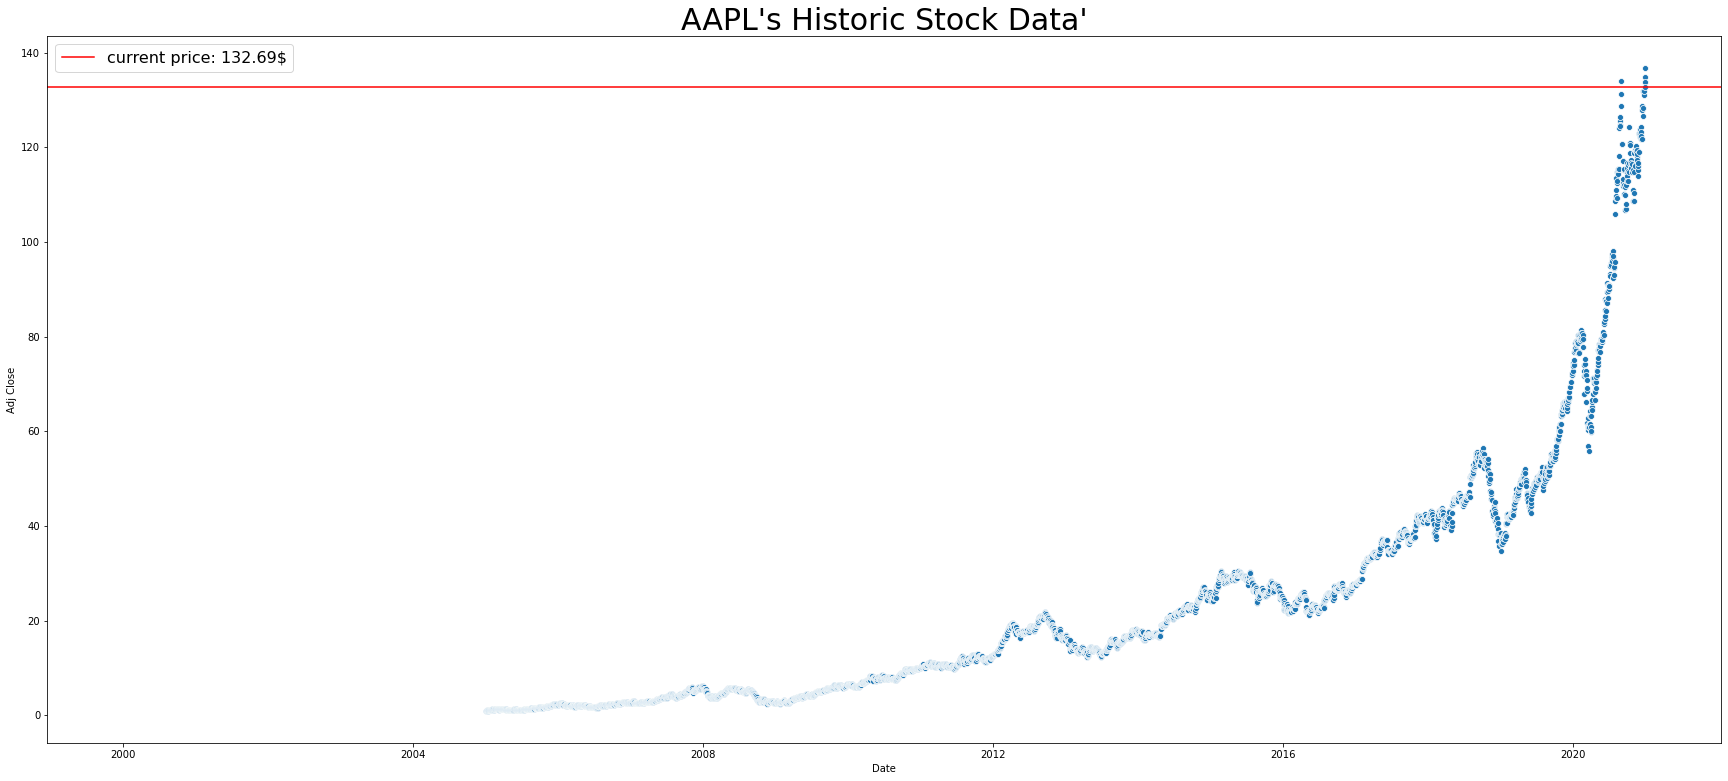

In [360]:
import seaborn as sns
import matplotlib.pyplot as plt
current_price = stock_data['Adj Close'][-1]
plt.figure(figsize = (30, 13))
sns.scatterplot(x = stock_data.index, y = stock_data['Adj Close'] , 
                   data=stock_data, palette=['green','orange','brown','dodgerblue','red'], legend='full')
plt.axhline(y=current_price, color = 'red', label = "current price: {}$".format(round(current_price, 2)))
plt.legend(prop= {'size': 16})
plt.title("{}'s Historic Stock Data'".format(get_stock_info), size = 30)
plt.show()

The factors used in our model are chosen by industry experts in their models from hundreds of indicators and to the best of the author's knowledge are most relevant in deciding the fundamental value of a company. If we are able to accurately evaluate the value of a company(presnt and future) and compare it to the expert's predictions (comparing to yahoo finance and google finance), while also using a sliding window to make past predictions into their future and analyzing margin of error, we can optimize our method to closely value a company and thus decide wether it is undervalued, overvalued, or fairly valued.
under valued is defined as being 3% or more lower than the price that we predict it should have and over valued is defined as having a price 3% and over the predicted price. Three percent is a commonly used tolerance margin for considering a price breakthrough by experts in th field, but can be set to any value the investor is comfortable with(the higher the margin the lower the risk of mistakes with the caveat that you might lose many trades if it is too high)


In [183]:
type(data_IncomeStatement.columns)

pandas.core.indexes.numeric.Int64Index

In [185]:
#run once decorator function
def run_once(f):
    def wrapper(*args, **kwargs):
        if not wrapper.has_run():
            return f(*args, **kwargs)
    wrapper.has_run = False
    return wrapper



In [186]:
# Autofit columns
#==================================================
#Just place whatever excel file that
#is needed in the same directory as main
#and those files will automatically be autofitted
# *this is not necessary so will only uncomment if 
# needed
#==================================================
#@run_once  #call run_once decorator
def auto_fill(file, worksheet_num):

    excel = Dispatch('Excel.Application')
    wb = excel.Workbooks.Open('{}\\{}'.format(os.getcwd(), file))
    excel.Worksheets(worksheet_num).Activate()
    excel.ActiveSheet.Columns.AutoFit()

#save the file
    wb.Save()
    wb.Close(True)
#already_fitted_files = []
#list name of all xlsx files in current directory
xlsx_file_names = []
for arr in os.listdir('.'):
    if arr.endswith('.xlsx'):
        xlsx_file_names.append(arr)
    else:
        pass
    
print(xlsx_file_names)
# with open('already_fitted.xlsx', 'w') as af:
#     print(af)
#     for file_name in xlsx_file_names:
#         print(file_name)
#         if file_name not in af:
#             file_name.to_excel('already_fitted.xlsx')
            
#    [file_name.to_excel('already_fitted.xlsx') for file_name in xlsx_file_names if file_name not in af]
        

# [auto_fill('{}'.format(element), 1) for element in xlsx_file_names]
print('✓ All excel files have been autofitted')

['asreported.xlsx', 'asreported_full.xlsx', 'Balancesheet.xlsx', 'BalanceSheet_quarters.xlsx', 'IncomeStatement_full.xlsx', 'IncomeStatement_quarters.xlsx', 'middle_list.xlsx', 'Valuation_Ranges.xlsx', '~$Valuation_Ranges.xlsx']
✓All excel files have been autofitted


In [187]:
#open file and autofit function
def open_file(file, worksheet_num):

    excel = Dispatch('Excel.Application')
    wb = excel.Workbooks.Open('{}\\{}'.format(os.getcwd(), file))
    excel.Worksheets(worksheet_num).Activate()
#     excel.ActiveSheet.Columns.AutoFit()
    
    return wb

In [191]:
#define rows that we need for our valuation model
Important_titles = [4, 6, 7, 10, 11, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 
                   30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 44, 45, 47, 48, 49, 50, 51, 52, 54,
                    55, 56, 59, 60, 61]
important_titles = [elem + 1 for elem in Important_titles]


In [192]:
#lines that are important to us in a list format --> so we can build our dataframe based on them
print(important_titles)

[5, 7, 8, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 26, 27, 28, 29, 31, 32, 33, 34, 37, 38, 39, 40, 41, 42, 45, 46, 48, 49, 50, 51, 52, 53, 55, 56, 57, 60, 61, 62]


In [193]:
#figure out earliest date data is availible for filings
dates = pd.DataFrame(pd.to_datetime(df_Inc.iloc[10]))
start_date = min(dates[10].dt.year)
start_date


2005

In [194]:
# gather data to fill into val_mod DataFrame
# THIS IS WHERE THE MAIN CODE STARTS
import pandas_datareader as pdr
from datetime import datetime
get_stock_info = 'AAPL'
 

# get_stock_info = input('Please enter the name of the stock: ')
stock_data = pdr.get_data_yahoo(symbols=get_stock_info, start=start_date, 
                                end=datetime.today())
stock_data.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2005-01-03,1.162679,1.117857,1.156786,1.130179,6.919920e+08,0.974949
2005-01-04,1.169107,1.124464,1.139107,1.141786,1.096810e+09,0.984962
2005-01-05,1.165179,1.143750,1.151071,1.151786,6.804336e+08,0.993589
2005-01-06,1.159107,1.130893,1.154821,1.152679,7.055552e+08,0.994359
2005-01-07,1.243393,1.156250,1.160714,1.236607,2.227450e+09,1.066760
2005-01-10,1.262500,1.212143,1.246964,1.231429,1.725310e+09,1.062293
2005-01-11,1.234821,1.145357,1.218750,1.152857,2.611627e+09,0.994513
2005-01-12,1.176786,1.130357,1.168750,1.168929,1.919702e+09,1.008377
2005-01-13,1.328929,1.245179,1.316250,1.246429,3.164717e+09,1.075233


In [195]:
stock_data.index

DatetimeIndex(['2005-01-03', '2005-01-04', '2005-01-05', '2005-01-06',
               '2005-01-07', '2005-01-10', '2005-01-11', '2005-01-12',
               '2005-01-13', '2005-01-14',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=4028, freq=None)

In [196]:
# stock_data.head(50)
df11 = stock_data.copy()
df11.reset_index(inplace = True)
df11.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2005-01-03,1.162679,1.117857,1.156786,1.130179,6.919920e+08,0.974949
1,2005-01-04,1.169107,1.124464,1.139107,1.141786,1.096810e+09,0.984962
2,2005-01-05,1.165179,1.143750,1.151071,1.151786,6.804336e+08,0.993589
3,2005-01-06,1.159107,1.130893,1.154821,1.152679,7.055552e+08,0.994359
4,2005-01-07,1.243393,1.156250,1.160714,1.236607,2.227450e+09,1.066760


In [197]:
df11['Date'] = pd.to_datetime(df11['Date'])

In [198]:
# Getting year and month from Date column
df12 = df11.copy()
# Define years and month and insert into main DataFrame
years = pd.DatetimeIndex(df11['Date']).year
month = pd.DatetimeIndex(df11['Date']).month
quarters = df12['Date'].dt.quarter

df12.insert(1, "Year", years)
df12.insert(2, "Month", month)
df12.insert(3, "Quarter", quarters)

df12.head(15)
# pd.merge(pd.DataFrame(df11['Date'], df11_year), pd.DataFrame(df11['Date'], df11_month), on = 'Date', how = 'outer')

,Date,Year,Month,Quarter,High,Low,Open,Close,Volume,Adj Close
0,2005-01-03,2005,1,1,1.162679,1.117857,1.156786,1.130179,6.919920e+08,0.974949
1,2005-01-04,2005,1,1,1.169107,1.124464,1.139107,1.141786,1.096810e+09,0.984962
2,2005-01-05,2005,1,1,1.165179,1.143750,1.151071,1.151786,6.804336e+08,0.993589
3,2005-01-06,2005,1,1,1.159107,1.130893,1.154821,1.152679,7.055552e+08,0.994359
4,2005-01-07,2005,1,1,1.243393,1.156250,1.160714,1.236607,2.227450e+09,1.066760
5,2005-01-10,2005,1,1,1.262500,1.212143,1.246964,1.231429,1.725310e+09,1.062293
6,2005-01-11,2005,1,1,1.234821,1.145357,1.218750,1.152857,2.611627e+09,0.994513
7,2005-01-12,2005,1,1,1.176786,1.130357,1.168750,1.168929,1.919702e+09,1.008377
8,2005-01-13,2005,1,1,1.328929,1.245179,1.316250,1.246429,3.164717e+09,1.075233
9,2005-01-14,2005,1,1,1.280714,1.235536,1.254464,1.253571,1.770742e+09,1.081395


In [199]:
dec_df = df12

In [200]:
display(dec_df.head())

,Date,Year,Month,Quarter,High,Low,Open,Close,Volume,Adj Close
0,2005-01-03,2005,1,1,1.162679,1.117857,1.156786,1.130179,6.919920e+08,0.974949
1,2005-01-04,2005,1,1,1.169107,1.124464,1.139107,1.141786,1.096810e+09,0.984962
2,2005-01-05,2005,1,1,1.165179,1.143750,1.151071,1.151786,6.804336e+08,0.993589
3,2005-01-06,2005,1,1,1.159107,1.130893,1.154821,1.152679,7.055552e+08,0.994359
4,2005-01-07,2005,1,1,1.243393,1.156250,1.160714,1.236607,2.227450e+09,1.066760


In [201]:
# Getting price based on quarters (Now we need to devide DataFrame into Years and Quarters for further processing)
dec_df13 = dec_df.pivot_table(index=['Year', 'Quarter'], values=['Close', 'High', 'Low'], aggfunc='mean')
dec_df13.head()

Close      High       Low
Year Quarter                              
2005 1        1.411996  1.433908  1.390404
     2        1.352740  1.375603  1.332132
     3        1.632829  1.650273  1.608292
     4        2.267874  2.295085  2.232783
2006 1        2.505685  2.559983  2.467074

In [202]:
IncomeStatement_Quarterly = pd.read_excel('IncomeStatement_quarters.xlsx')
IncomeStatement_Quarterly

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Powered by Clearbit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apple Inc (NMS: AAPL),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Exchange rate used is that of the Year End rep...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [203]:
#getting unique years - whats the point?
print(set(stock_data.index.year))

{2016, 2017, 2018, 2019, 2020, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015}


In [204]:
IncomeStatement_Quarterly.iloc[[10, 17]]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89
10,NaN,3rd Quarter,NaN,2nd Quarter,NaN,1st Quarter,NaN,3rd Quarter,NaN,2nd Quarter,NaN,1st Quarter,NaN,3rd Quarter,NaN,2nd Quarter,NaN,1st Quarter,NaN,3rd Quarter,NaN,2nd Quarter,NaN,1st Quarter,NaN,3rd Quarter,NaN,2nd Quarter,NaN,1st Quarter,NaN,3rd Quarter,NaN,2nd Quarter,NaN,1st Quarter,NaN,3rd Quarter,NaN,2nd Quarter,NaN,1st Quarter,NaN,3rd Quarter,NaN,2nd Quarter,NaN,1st Quarter,NaN,3rd Quarter,NaN,2nd Quarter,NaN,1st Quarter,NaN,3rd Quarter,NaN,2nd Quarter,NaN,1st Quarter,NaN,3rd Quarter,NaN,2nd Quarter,NaN,1st Quarter,NaN,3rd Quarter,NaN,2nd Quarter,NaN,1st Quarter,NaN,3rd Quarter,NaN,2nd Quarter,NaN,1st Quarter,NaN,3rd Quarter,NaN,2nd Quarter,NaN,1st Quarter,NaN,3rd Quarter,NaN,2nd Quarter,NaN,1st Quarter
17,Total net sales,59685000,NaN,58313000,NaN,91819000,NaN,53809000,NaN,58015000,NaN,84310000,NaN,53265000,NaN,61137000,NaN,88293000,NaN,45408000,NaN,52896000,NaN,78351000,NaN,42358000,NaN,50557000,NaN,75872000,NaN,49605000,NaN,58010000,NaN,74599000,NaN,37432000,NaN,45646000,NaN,57594000,NaN,35323000,NaN,43603000,NaN,54512000,NaN,35023000,NaN,39186000,NaN,46333000,NaN,28571000,NaN,24667000,NaN,26741000,NaN,15700000,NaN,13499000,NaN,15683000,NaN,8337000,NaN,8163000,NaN,10167000,NaN,7464000,NaN,7512000,NaN,9608000,NaN,5410000,NaN,5264000,NaN,7115000,NaN,4370000,NaN,4359000,NaN,5749000


In [205]:
def net_rev():
    net_rev = IncomeStatement_Quarterly.iloc[[9, 17]]
    net_rev = net_rev.T
    net_rev.reset_index(inplace = True)
    net_rev.drop('index', axis = 1, inplace = True)
    net_rev = net_rev[~(net_rev.index % 2 == 0)]
    net_rev = net_rev.rename(columns={9: "Date", 17: "Total Revenue"})
    return net_rev
net_rev = net_rev()
net_rev.head(8)


,Date,Total Revenue
1,06/27/2020,59685000
3,03/28/2020,58313000
5,12/28/2019,91819000
7,06/29/2019,53809000
9,03/30/2019,58015000
11,12/29/2018,84310000
13,06/30/2018,53265000
15,03/31/2018,61137000


In [206]:
net_rev.index

Int64Index([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
            35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
            69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89],
           dtype='int64')

In [207]:
# Define years and month and insert into main DataFrame
net_rev['Date'] = pd.to_datetime(net_rev['Date'])
net_rev_quarters = net_rev['Date'].dt.quarter
# net_rev.insert(1, "Year", years)
net_rev.head()

,Date,Total Revenue
1,2020-06-27,59685000
3,2020-03-28,58313000
5,2019-12-28,91819000
7,2019-06-29,53809000
9,2019-03-30,58015000


In [208]:
net_rev.insert(1, "Quarter", net_rev_quarters)

#change dates to datetime format
net_rev['Date'] = pd.to_datetime(net_rev['Date'])
net_rev.reset_index(inplace = True)
net_rev.head()

,index,Date,Quarter,Total Revenue
0,1,2020-06-27,2,59685000
1,3,2020-03-28,1,58313000
2,5,2019-12-28,4,91819000
3,7,2019-06-29,2,53809000
4,9,2019-03-30,1,58015000


In [209]:
# net_rev['Date'].dt.quarter
net_rev.head()

,index,Date,Quarter,Total Revenue
0,1,2020-06-27,2,59685000
1,3,2020-03-28,1,58313000
2,5,2019-12-28,4,91819000
3,7,2019-06-29,2,53809000
4,9,2019-03-30,1,58015000


In [210]:
net_rev.drop('index', axis = 1, inplace = True)

In [211]:
display(dec_df13.head(), net_rev.head())

Close      High       Low
Year Quarter                              
2005 1        1.411996  1.433908  1.390404
     2        1.352740  1.375603  1.332132
     3        1.632829  1.650273  1.608292
     4        2.267874  2.295085  2.232783
2006 1        2.505685  2.559983  2.467074

,Date,Quarter,Total Revenue
0,2020-06-27,2,59685000
1,2020-03-28,1,58313000
2,2019-12-28,4,91819000
3,2019-06-29,2,53809000
4,2019-03-30,1,58015000


In [213]:
net_rev['Date'] = net_rev['Date'].dt.year
net_rev = net_rev.rename(columns = {'Date' : 'Year'})


In [214]:
net_rev

,Year,Quarter,Total Revenue
0,2020,2,59685000
1,2020,1,58313000
2,2019,4,91819000
3,2019,2,53809000
4,2019,1,58015000
5,2018,4,84310000
6,2018,2,53265000
7,2018,1,61137000
8,2017,4,88293000
9,2017,3,45408000


In [215]:
try:
    filter = net_rev['Total Revenue']=="-"
# printing only filtered columns 
    net_rev['Total Revenue'][filter] = net_rev['Total Revenue'].iloc[15]
# net_rev.where(filter).fillna(method = "bfill") 
# net_rev['Total Revenue'].str.replace('-', NaN)
    net_rev['Total Revenue'].iloc[16]
# net_rev['Total Revenue'][filter]
except:
    print(" no - found in data")
    

<ipython-input-215-de6973b6c4ef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  net_rev['Total Revenue'][filter] = net_rev['Total Revenue'].iloc[15]


In [216]:
net_rev

,Year,Quarter,Total Revenue
0,2020,2,59685000
1,2020,1,58313000
2,2019,4,91819000
3,2019,2,53809000
4,2019,1,58015000
5,2018,4,84310000
6,2018,2,53265000
7,2018,1,61137000
8,2017,4,88293000
9,2017,3,45408000


In [217]:
net_rev['Total Revenue'] = net_rev['Total Revenue'].astype('int')

In [218]:
net_rev.head()

,Year,Quarter,Total Revenue
0,2020,2,59685000
1,2020,1,58313000
2,2019,4,91819000
3,2019,2,53809000
4,2019,1,58015000


In [219]:
# Getting price based on quarters 
net_rev1 = pd.pivot_table(net_rev, index=['Year', 'Quarter'], values=['Total Revenue'])
net_rev1



Total Revenue
Year Quarter               
2005 4              5749000
2006 2              4359000
     3              4370000
     4              7115000
2007 1              5264000
     2              5410000
     4              9608000
2008 1              7512000
     2              7464000
     4             10167000
2009 1              8163000
     2              8337000
     4             15683000
2010 1             13499000
     2             15700000
     4             26741000
2011 1             24667000
     2             28571000
     4             46333000
2012 1             39186000
     2             35023000
     4             54512000
2013 1             43603000
     2             35323000
     4             57594000
2014 1             45646000
     2             37432000
     4             74599000
2015 1             58010000
     2             49605000
     4             75872000
2016 1             50557000
     2             42358000
     4             78351000
2017 2             52896000
     3             45408000
     4             88293000
2018 1             61137000
     2             53265000
     4             84310000
2019 1             58015000
     2             53809000
     4             91819000
2020 1             58313000
     2             59685000

In [220]:
net_rev1.head(10)

Total Revenue
Year Quarter               
2005 4              5749000
2006 2              4359000
     3              4370000
     4              7115000
2007 1              5264000
     2              5410000
     4              9608000
2008 1              7512000
     2              7464000
     4             10167000

In [222]:
net_rev = net_rev1

In [223]:
display(net_rev.head(), dec_df13.head())

Total Revenue
Year Quarter               
2005 4              5749000
2006 2              4359000
     3              4370000
     4              7115000
2007 1              5264000

Close      High       Low
Year Quarter                              
2005 1        1.411996  1.433908  1.390404
     2        1.352740  1.375603  1.332132
     3        1.632829  1.650273  1.608292
     4        2.267874  2.295085  2.232783
2006 1        2.505685  2.559983  2.467074

In [224]:
#merging net_revenue into main dataframe (dec_df)
dec_df = pd.merge(dec_df13, net_rev, left_index = True,right_index = True,  how = 'outer')
dec_df.head()

Close      High       Low  Total Revenue
Year Quarter                                             
2005 1        1.411996  1.433908  1.390404            NaN
     2        1.352740  1.375603  1.332132            NaN
     3        1.632829  1.650273  1.608292            NaN
     4        2.267874  2.295085  2.232783      5749000.0
2006 1        2.505685  2.559983  2.467074            NaN

In [226]:
dec_df.head()

Close      High       Low  Total Revenue
Year Quarter                                             
2005 1        1.411996  1.433908  1.390404            NaN
     2        1.352740  1.375603  1.332132            NaN
     3        1.632829  1.650273  1.608292            NaN
     4        2.267874  2.295085  2.232783      5749000.0
2006 1        2.505685  2.559983  2.467074            NaN

In [227]:
dec_df['Total Revenue'] = dec_df['Total Revenue'].bfill()
dec_df

Close        High         Low  Total Revenue
Year Quarter                                                   
2005 1          1.411996    1.433908    1.390404      5749000.0
     2          1.352740    1.375603    1.332132      5749000.0
     3          1.632829    1.650273    1.608292      5749000.0
     4          2.267874    2.295085    2.232783      5749000.0
2006 1          2.505685    2.559983    2.467074      4359000.0
     2          2.286786    2.328282    2.255096      4359000.0
     3          2.364666    2.395510    2.328226      4370000.0
     4          2.958299    2.993095    2.922098      7115000.0
2007 1          3.161434    3.198688    3.124374      5264000.0
     2          3.868152    3.911213    3.819632      5410000.0
     3          4.843560    4.917976    4.756417      9608000.0
     4          6.378103    6.478594    6.254314      9608000.0
2008 1          4.969239    5.091739    4.861475      7512000.0
     2          6.198811    6.287919    6.089431      7464000.0
     3          5.719330    5.841925    5.604046     10167000.0
     4          3.390580    3.504258    3.277282     10167000.0
2009 1          3.341932    3.404854    3.276996      8163000.0
     2          4.621905    4.674467    4.550397      8337000.0
     3          5.865184    5.913728    5.804018     15683000.0
     4          7.045586    7.121797    6.978984     15683000.0
2010 1          7.530539    7.605164    7.447541     13499000.0
     2          9.097817    9.215408    8.952097     15700000.0
     3          9.282327    9.375893    9.172846     26741000.0
     4         11.124810   11.199632   11.035692     26741000.0
2011 1         12.345830   12.433525   12.223433     24667000.0
     2         12.057585   12.168316   11.964943     28571000.0
     3         13.589654   13.743108   13.414397     46333000.0
     4         13.987806   14.123345   13.849422     46333000.0
2012 1         17.988566   18.112079   17.793992     39186000.0
     2         20.753220   21.005403   20.527902     35023000.0
     3         22.876553   23.032630   22.669093     54512000.0
     4         20.634424   20.927817   20.386187     54512000.0
2013 1         16.649083   16.863107   16.481637     43603000.0
     2         15.383677   15.582623   15.222015     35323000.0
     3         16.580195   16.742271   16.435720     57594000.0
     4         18.891892   19.033917   18.737980     57594000.0
2014 1         19.021592   19.174455   18.879549     45646000.0
     2         21.279382   21.413271   21.106015     37432000.0
     3         24.540859   24.739531   24.327422     74599000.0
     4         27.205313   27.465469   26.948008     74599000.0
2015 1         30.194262   30.514057   29.889016     58010000.0
     2         31.984524   32.242222   31.759048     49605000.0
     3         29.325859   29.688789   28.963242     75872000.0
     4         28.574844   28.839141   28.291836     75872000.0
2016 1         24.913770   25.169385   24.618688     50557000.0
     2         24.850313   25.066563   24.645742     42358000.0
     3         26.466523   26.629531   26.276172     78351000.0
     4         28.349762   28.540159   28.122936     78351000.0
2017 1         32.928145   33.041290   32.713387     52896000.0
     2         36.968849   37.205000   36.719960     52896000.0
     3         38.792262   39.065119   38.494127     45408000.0
     4         41.787064   42.018294   41.486230     88293000.0
2018 1         43.047828   43.524303   42.654017     61137000.0
     2         45.349141   45.678125   44.980117     53265000.0
     3         52.075000   52.473532   51.630238     84310000.0
     4         48.478016   49.216905   47.816468     84310000.0
2019 1         42.415943   42.764181   41.969795     58015000.0
     2         48.723175   49.139563   48.247698     53809000.0
     3         52.280195   52.753438   51.826523     91819000.0
     4         64.332187   64.668281   63.725820     91819000.0
2020 1         73.540927   74.693105   72.257581   

In [228]:
mask = data_IncomeStatement_full[0].str.contains('share', case=False, na=False)
# mask = data_IncomeStatement_full[0].fillna(1)
mask.isnull().sum()

0

In [229]:
data_IncomeStatement_full[mask]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
38,Weighted average shares outstanding - basic,17250292,NaN,17440404,NaN,17660160,NaN,18282532,NaN,18696284,NaN,18943280,NaN,19528668,NaN,20099508,NaN,20451508,NaN,20780352,NaN,20903164,NaN,21194644,NaN,21772232,NaN,22057524,NaN,22235720,NaN,22919544,NaN,23175196,NaN,23372328,NaN,24050540,NaN,24493196,NaN,25090016,NaN,25721304,NaN,26309612,NaN,26289648,NaN,26224688,NaN,26140296,NaN,26069148,NaN,25931024,NaN,25849488,NaN,25740232,NaN,25541516,NaN,25411344,NaN,25299176,NaN,25023936,NaN,24953040,NaN,24895976,NaN,24744664,NaN,24627288,NaN,24524080,NaN,24270568,NaN,24164084,NaN,24015348,NaN,23838500,NaN,23545480,NaN,23261868
39,Weighted average shares outstanding - diluted,17419152,NaN,17618764,NaN,17818416,NaN,18405520,NaN,18802584,NaN,19093008,NaN,19706436,NaN,20273972,NaN,20631148,NaN,20933996,NaN,21046752,NaN,21311980,NaN,21891124,NaN,22163544,NaN,22376508,NaN,23092396,NaN,23339432,NaN,23527212,NaN,24206844,NaN,24626784,NaN,25240656,NaN,25879420,NaN,26488980,NaN,26522076,NaN,26517652,NaN,26457004,NaN,26364016,NaN,26258680,NaN,26206432,NaN,26128312,NaN,25966108,NaN,25840584,NaN,25753924,NaN,25456480,NaN,25283804,NaN,25241832,NaN,25288676,NaN,25181212,NaN,25201512,NaN,24938788,NaN,24826284,NaN,24732316,NaN,24538304,NaN,24599036,NaN,24477796
40,Year end shares outstanding,17135756,NaN,17295948,NaN,17539836,NaN,18125580,NaN,18429136,NaN,18919212,NaN,19371668,NaN,19773128,NaN,20326604,NaN,20679128,NaN,20823260,NaN,21021692,NaN,21572660,NaN,21913784,NaN,22177948,NaN,22821600,NaN,23049112,NaN,23305676,NaN,23956684,NaN,24128860,NaN,24988516,NaN,25436376,NaN,26322632,NaN,26291244,NaN,26243448,NaN,26179496,NaN,26101992,NaN,2.59533e+07,NaN,2.58909e+07,NaN,2.5789e+07,NaN,2.55775e+07,NaN,2.54698e+07,NaN,2.53759e+07,NaN,2.50806e+07,NaN,2.49735e+07,NaN,2.49316e+07,NaN,2.48009e+07,NaN,2.46801e+07,NaN,2.46016e+07,NaN,2.43365e+07,NaN,2.42114e+07,NaN,2.40862e+07,NaN,2.38837e+07,NaN,2.37773e+07,NaN,2.36773e+07
41,Net earnings (loss) per share - basic,0.653,NaN,0.645,NaN,1.26,NaN,0.55,NaN,0.618,NaN,1.055,NaN,0.59,NaN,0.688,NaN,0.98,NaN,0.42,NaN,0.528,NaN,0.845,NaN,0.358,NaN,0.478,NaN,0.825,NaN,0.465,NaN,0.585,NaN,0.77,NaN,0.323,NaN,0.418,NaN,0.521,NaN,0.268,NaN,0.363,NaN,0.498,NaN,0.336,NaN,0.445,NaN,0.501,NaN,0.282,NaN,0.232,NaN,0.233,NaN,0.128,NaN,0.121,NaN,0.134,NaN,0.049,NaN,0.048,NaN,0.065,NaN,0.043,NaN,0.043,NaN,0.065,NaN,0.034,NaN,0.032,NaN,0.042,NaN,0.02,NaN,0.018,NaN,0.024
42,Net earnings (loss) per share - diluted,0.645,NaN,0.638,NaN,1.248,NaN,0.545,NaN,0.615,NaN,1.045,NaN,0.585,NaN,0.683,NaN,0.973,NaN,0.418,NaN,0.525,NaN,0.84,NaN,0.355,NaN,0.475,NaN,0.82,NaN,0.463,NaN,0.583,NaN,0.765,NaN,0.32,NaN,0.415,NaN,0.518,NaN,0.267,NaN,0.36,NaN,0.493,NaN,0.333,NaN,0.439,NaN,0.495,NaN,0.278,NaN,0.229,NaN,0.23,NaN,0.125,NaN,0.119,NaN,0.131,NaN,0.048,NaN,0.048,NaN,0.064,NaN,0.043,NaN,0.041,NaN,0.063,NaN,0.033,NaN,0.031,NaN,0.041,NaN,0.019,NaN,0.017,NaN,0.023
43,Cash dividends declared per share,0.205,NaN,0.193,NaN,0.193,NaN,0.193,NaN,0.183,NaN,0.183,NaN,0.183,NaN,0.158,NaN,0.158,NaN,0.158,NaN,0.143,NaN,0.143,NaN,0.143,NaN,0.13,NaN,0.13,NaN,0.13,NaN,0.118,NaN,0.118,NaN,0.118,NaN,0.109,NaN,0.109,NaN,0.109,NaN,0.095,NaN,0.095,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-


In [230]:
avg_shares1 = data_IncomeStatement.iloc[[10, 39]]
avg_shares1 = avg_shares1.T
avg_shares1.head()

,10,39
1,06/27/2020,17419152
3,03/28/2020,17618764
5,12/28/2019,17818416
7,06/29/2019,18405520
9,03/30/2019,18802584


In [231]:
#adding quarters and merging with dec_df
avg_shares1.rename(columns = {10 : "Date", 39 : "Avg_Shares"}, inplace = True)

avg_shares1['Date'] = pd.to_datetime(avg_shares1['Date'])
avg_shares_quarters = avg_shares1['Date'].dt.quarter
avg_shares_years = avg_shares1['Date'].dt.year

# # #change dates to datetime format
avg_shares1['Date'] = pd.to_datetime(avg_shares1['Date'])

#sort years from low to high in order to fit with dec_df
avg_shares1.sort_values(by=['Date'], inplace=True)
# avg_shares1.reset_index(inplace = True)
# avg_shares1.drop(['index', 'level_0'], axis = 1, inplace = True)
# avg_shares1.drop('index', axis = 1, inplace = True)
avg_shares1.insert(1, "Year", avg_shares_years)
avg_shares1.insert(2, "Quarter", avg_shares_quarters)

avg_shares1

,Date,Year,Quarter,Avg_Shares
89,2005-12-31,2005,4,24477796
87,2006-04-01,2006,2,24599036
85,2006-07-01,2006,3,24538304
83,2006-12-30,2006,4,24732316
81,2007-03-31,2007,1,24826284
79,2007-06-30,2007,2,24938788
77,2007-12-29,2007,4,25201512
75,2008-03-29,2008,1,25181212
73,2008-06-28,2008,2,25288676
71,2008-12-27,2008,4,25241832


In [232]:
avg_shares1['Avg_Shares'] = avg_shares1['Avg_Shares'].astype('int64')
avg_shares1.dtypes

Date          datetime64[ns]
Year                   int64
Quarter                int64
Avg_Shares             int64
dtype: object

In [233]:
# Getting price based on quarters 
avg_shares1 = pd.pivot_table(avg_shares1, index=['Year', 'Quarter'], values=['Avg_Shares'])
avg_shares1

Avg_Shares
Year Quarter            
2005 4          24477796
2006 2          24599036
     3          24538304
     4          24732316
2007 1          24826284
     2          24938788
     4          25201512
2008 1          25181212
     2          25288676
     4          25241832
2009 1          25283804
     2          25456480
     4          25753924
2010 1          25840584
     2          25966108
     4          26128312
2011 1          26206432
     2          26258680
     4          26364016
2012 1          26457004
     2          26517652
     4          26522076
2013 1          26488980
     2          25879420
     4          25240656
2014 1          24626784
     2          24206844
     4          23527212
2015 1          23339432
     2          23092396
     4          22376508
2016 1          22163544
     2          21891124
     4          21311980
2017 2          21046752
     3          20933996
     4          20631148
2018 1          20273972
     2          19706436
     4          19093008
2019 1          18802584
     2          18405520
     4          17818416
2020 1          17618764
     2          17419152

In [234]:
#merging net_revenue into main dataframe (dec_df)
dec_df = pd.merge(dec_df, avg_shares1, left_index = True,right_index = True,  how = 'outer')
dec_df.head()

Close      High       Low  Total Revenue  Avg_Shares
Year Quarter                                                         
2005 1        1.411996  1.433908  1.390404      5749000.0         NaN
     2        1.352740  1.375603  1.332132      5749000.0         NaN
     3        1.632829  1.650273  1.608292      5749000.0         NaN
     4        2.267874  2.295085  2.232783      5749000.0  24477796.0
2006 1        2.505685  2.559983  2.467074      4359000.0         NaN

In [235]:
test = IncomeStatement_Quarterly.iloc[[9, 39]]
test.iloc[1][0]

'Year end shares outstanding'

In [236]:
import os
os.getcwd()

'C:\\Users\\emanu\\github\\Guided-Capstone'

In [237]:
IncomeStatement_Quarterly.iloc[[9, 36]]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89
9,Report Date,06/27/2020,NaN,03/28/2020,NaN,12/28/2019,NaN,06/29/2019,NaN,03/30/2019,NaN,12/29/2018,NaN,06/30/2018,NaN,03/31/2018,NaN,12/30/2017,NaN,07/01/2017,NaN,04/01/2017,NaN,12/31/2016,NaN,06/25/2016,NaN,03/26/2016,NaN,12/26/2015,NaN,06/27/2015,NaN,03/28/2015,NaN,12/27/2014,NaN,06/28/2014,NaN,03/29/2014,NaN,12/28/2013,NaN,06/29/2013,NaN,03/30/2013,NaN,12/29/2012,NaN,06/30/2012,NaN,03/31/2012,NaN,12/31/2011,NaN,06/25/2011,NaN,03/26/2011,NaN,12/25/2010,NaN,06/26/2010,NaN,03/27/2010,NaN,12/26/2009,NaN,06/27/2009,NaN,03/28/2009,NaN,12/27/2008,NaN,06/28/2008,NaN,03/29/2008,NaN,12/29/2007,NaN,06/30/2007,NaN,03/31/2007,NaN,12/30/2006,NaN,07/01/2006,NaN,04/01/2006,NaN,12/31/2005
36,Net income (loss),11253000,NaN,11249000,NaN,22236000,NaN,10044000,NaN,11561000,NaN,19965000,NaN,11519000,NaN,13822000,NaN,20065000,NaN,8717000,NaN,11029000,NaN,17891000,NaN,7796000,NaN,10516000,NaN,18361000,NaN,10677000,NaN,13569000,NaN,18024000,NaN,7748000,NaN,10223000,NaN,13072000,NaN,6900000,NaN,9547000,NaN,13078000,NaN,8824000,NaN,11622000,NaN,13064000,NaN,7308000,NaN,5987000,NaN,6004000,NaN,3253000,NaN,3074000,NaN,3378000,NaN,1229000,NaN,1205000,NaN,1605000,NaN,1072000,NaN,1045000,NaN,1581000,NaN,818000,NaN,770000,NaN,1004000,NaN,472000,NaN,410000,NaN,565000


In [238]:
global dec_df_copy
dec_df_copy = dec_df.copy()

def data_cleaning(df, row, dec_df_copy, integer_type = 'int64'):
    
#     dec_df_copy = dec_df.copy()
    #getting net income per share and merging with main dec_df
    param = df.iloc[[9, row]]
    param_name = param.iloc[1][0].title()
    print(param_name)  
    param.drop('Unnamed: 0', axis = 1, inplace = True)
#     param.columns = param.iloc[0]
#     
#     param.reset_index(inplace = True)
    #adding quarters and merging with dec_df
    param = param.T
    param.rename(columns = {9 : "Date", row : "{}".format(param_name)}, inplace = True)
    param.reset_index(inplace = True)
    param.drop('index', axis = 1, inplace = True)
    param = param[~(param.index % 2 == 1)]
    param['Date'] = pd.to_datetime(param['Date'])
    param_quarters = param['Date'].dt.quarter
    param_years = param['Date'].dt.year

    # # #change dates to datetime format
    param['Date'] = pd.to_datetime(param['Date'])

    #sort years from low to high in order to fit with dec_df
    param.sort_values(by=['Date'], inplace=True)
    # avg_shares1.reset_index(inplace = True)
    # avg_shares1.drop(['index', 'level_0'], axis = 1, inplace = True)
    # avg_shares1.drop('index', axis = 1, inplace = True)
    param.insert(1, "Year", param_years)
    param.insert(2, "Quarter", param_quarters)
    param[param_name] = param[param_name].astype(integer_type)
    param = param.pivot_table(index=['Year', 'Quarter'], values=param_name, aggfunc='mean')
#     dec_df_copy 
    
#     display(dec_df_copy)
    global dec_df_final
    dec_df_final = pd.merge(dec_df_copy, param, left_index = True,right_index = True,  how = 'outer')
#     display(dec_df_final)
    dec_df_final[param_name] = dec_df_final[param_name].bfill()
#     global dec_df_copy
#     dec_df_copy = dec_df_final
#     dec_df_copy = dec_df_final
    return dec_df_final


In [239]:
# global dec_df_copy
dec_df_copy = data_cleaning(IncomeStatement_Quarterly, 39, dec_df_copy)
dec_df_copy = data_cleaning(IncomeStatement_Quarterly, 36, dec_df_copy )
# dec_df_copy = data_cleaning(IncomeStatement_Quarterly, 36 )
dec_df_copy

Year End Shares Outstanding
Net Income (Loss)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Close        High         Low  Total Revenue  Avg_Shares  \
Year Quarter                                                                  
2005 1          1.411996    1.433908    1.390404      5749000.0         NaN   
     2          1.352740    1.375603    1.332132      5749000.0         NaN   
     3          1.632829    1.650273    1.608292      5749000.0         NaN   
     4          2.267874    2.295085    2.232783      5749000.0  24477796.0   
2006 1          2.505685    2.559983    2.467074      4359000.0         NaN   
     2          2.286786    2.328282    2.255096      4359000.0  24599036.0   
     3          2.364666    2.395510    2.328226      4370000.0  24538304.0   
     4          2.958299    2.993095    2.922098      7115000.0  24732316.0   
2007 1          3.161434    3.198688    3.124374      5264000.0  24826284.0   
     2          3.868152    3.911213    3.819632      5410000.0  24938788.0   
     3          4.843560    4.917976    4.756417      9608000.0         NaN   
     4          6.378103    6.478594    6.254314      9608000.0  25201512.0   
2008 1          4.969239    5.091739    4.861475      7512000.0  25181212.0   
     2          6.198811    6.287919    6.089431      7464000.0  25288676.0   
     3          5.719330    5.841925    5.604046     10167000.0         NaN   
     4          3.390580    3.504258    3.277282     10167000.0  25241832.0   
2009 1          3.341932    3.404854    3.276996      8163000.0  25283804.0   
     2          4.621905    4.674467    4.550397      8337000.0  25456480.0   
     3          5.865184    5.913728    5.804018     15683000.0         NaN   
     4          7.045586    7.121797    6.978984     15683000.0  25753924.0   
2010 1          7.530539    7.605164    7.447541     13499000.0  25840584.0   
     2          9.097817    9.215408    8.952097     15700000.0  25966108.0   
     3          9.282327    9.375893    9.172846     26741000.0         NaN   
     4         11.124810   11.199632   11.035692     26741000.0  26128312.0   
2011 1         12.345830   12.433525   12.223433     24667000.0  26206432.0   
     2         12.057585   12.168316   11.964943     28571000.0  26258680.0   
     3         13.589654   13.743108   13.414397     46333000.0         NaN   
     4         13.987806   14.123345   13.849422     46333000.0  26364016.0   
2012 1         17.988566   18.112079   17.793992     39186000.0  26457004.0   
     2         20.753220   21.005403   20.527902     35023000.0  26517652.0   
     3         22.876553   23.032630   22.669093     54512000.0         NaN   
     4         20.634424   20.927817   20.386187     54512000.0  26522076.0   
2013 1         16.649083   16.863107   16.481637     43603000.0  26488980.0   
     2         15.383677   15.582623   15.222015     35323000.0  25879420.0   
     3         16.580195   16.742271   16.435720     57594000.0         NaN   
     4         18.891892   19.033917   18.737980     57594000.0  25240656.0   
2014 1         19.021592   19.174455   18.879549     45646000.0  24626784.0   
     2         21.279382   21.413271   21.106015     37432000.0  24206844.0   
     3         24.540859   24.739531   24.327422     74599000.0         NaN   
     4         27.205313   27.465469   26.948008     74599000.0  23527212.0   
2015 1         30.194262   30.514057   29.889016     58010000.0  23339432.0   
     2         31.984524   32.242222   31.759048     49605000.0  23092396.0   
     3         29.325859   29.688789   28.963242     75872000.0         NaN   
     4         28.574844   28.839141   28.291836     75872000.0  22376508.0   
2016 1         24.913770   25.169385   24.618688     50557000.0  22163544.0   
     2         24.850313   25.066563   24.645742     42358000.0  21891124.0   
     3         26.466523   26.629531   26.276172     78351000.0         NaN   
     4         28.349762   28.540159   28.122936     78351000.0  21311980.0   
2017 1         32.928145   33.041290   32.713387     52896000.0      

In [240]:
# finding specific elements in income statement
mask = IncomeStatement_Quarterly['Unnamed: 0'].str.contains('revenue', case=False, na=False)
IncomeStatement_Quarterly[mask]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89


In [241]:
dec_df_copy.head()

Close      High       Low  Total Revenue  Avg_Shares  \
Year Quarter                                                            
2005 1        1.411996  1.433908  1.390404      5749000.0         NaN   
     2        1.352740  1.375603  1.332132      5749000.0         NaN   
     3        1.632829  1.650273  1.608292      5749000.0         NaN   
     4        2.267874  2.295085  2.232783      5749000.0  24477796.0   
2006 1        2.505685  2.559983  2.467074      4359000.0         NaN   

              Year End Shares Outstanding  Net Income (Loss)  
Year Quarter                                                  
2005 1                         23677280.0           565000.0  
     2                         23677280.0           565000.0  
     3                         23677280.0           565000.0  
     4                         23677280.0           565000.0  
2006 1                         23777268.0           410000.0

In [242]:
dec_df_copy['Net Income Per Share'] = dec_df_copy['Net Income (Loss)']/dec_df_copy['Year End Shares Outstanding']
display(dec_df_copy.head(), dec_df_copy.tail())

Close      High       Low  Total Revenue  Avg_Shares  \
Year Quarter                                                            
2005 1        1.411996  1.433908  1.390404      5749000.0         NaN   
     2        1.352740  1.375603  1.332132      5749000.0         NaN   
     3        1.632829  1.650273  1.608292      5749000.0         NaN   
     4        2.267874  2.295085  2.232783      5749000.0  24477796.0   
2006 1        2.505685  2.559983  2.467074      4359000.0         NaN   

              Year End Shares Outstanding  Net Income (Loss)  \
Year Quarter                                                   
2005 1                         23677280.0           565000.0   
     2                         23677280.0           565000.0   
     3                         23677280.0           565000.0   
     4                         23677280.0           565000.0   
2006 1                         23777268.0           410000.0   

              Net Income Per Share  
Year Quarter                        
2005 1                    0.023863  
     2                    0.023863  
     3                    0.023863  
     4                    0.023863  
2006 1                    0.017243

Close        High         Low  Total Revenue  Avg_Shares  \
Year Quarter                                                                  
2019 4         64.332187   64.668281   63.725820     91819000.0  17818416.0   
2020 1         73.540927   74.693105   72.257581     58313000.0  17618764.0   
     2         77.490317   78.341389   76.394960     59685000.0  17419152.0   
     3        109.115351  110.836680  107.262734            NaN         NaN   
     4        120.281250  121.803125  118.785468            NaN         NaN   

              Year End Shares Outstanding  Net Income (Loss)  \
Year Quarter                                                   
2019 4                         17539836.0         22236000.0   
2020 1                         17295948.0         11249000.0   
     2                         17135756.0         11253000.0   
     3                                NaN                NaN   
     4                                NaN                NaN   

              Net Income Per Share  
Year Quarter                        
2019 4                    1.267743  
2020 1                    0.650384  
     2                    0.656697  
     3                         NaN  
     4                         NaN

In [243]:
dec_df_copy = data_cleaning(IncomeStatement_Quarterly, 17, dec_df_copy)
dec_df_copy

Total Net Sales


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Close        High         Low  Total Revenue  Avg_Shares  \
Year Quarter                                                                  
2005 1          1.411996    1.433908    1.390404      5749000.0         NaN   
     2          1.352740    1.375603    1.332132      5749000.0         NaN   
     3          1.632829    1.650273    1.608292      5749000.0         NaN   
     4          2.267874    2.295085    2.232783      5749000.0  24477796.0   
2006 1          2.505685    2.559983    2.467074      4359000.0         NaN   
     2          2.286786    2.328282    2.255096      4359000.0  24599036.0   
     3          2.364666    2.395510    2.328226      4370000.0  24538304.0   
     4          2.958299    2.993095    2.922098      7115000.0  24732316.0   
2007 1          3.161434    3.198688    3.124374      5264000.0  24826284.0   
     2          3.868152    3.911213    3.819632      5410000.0  24938788.0   
     3          4.843560    4.917976    4.756417      9608000.0         NaN   
     4          6.378103    6.478594    6.254314      9608000.0  25201512.0   
2008 1          4.969239    5.091739    4.861475      7512000.0  25181212.0   
     2          6.198811    6.287919    6.089431      7464000.0  25288676.0   
     3          5.719330    5.841925    5.604046     10167000.0         NaN   
     4          3.390580    3.504258    3.277282     10167000.0  25241832.0   
2009 1          3.341932    3.404854    3.276996      8163000.0  25283804.0   
     2          4.621905    4.674467    4.550397      8337000.0  25456480.0   
     3          5.865184    5.913728    5.804018     15683000.0         NaN   
     4          7.045586    7.121797    6.978984     15683000.0  25753924.0   
2010 1          7.530539    7.605164    7.447541     13499000.0  25840584.0   
     2          9.097817    9.215408    8.952097     15700000.0  25966108.0   
     3          9.282327    9.375893    9.172846     26741000.0         NaN   
     4         11.124810   11.199632   11.035692     26741000.0  26128312.0   
2011 1         12.345830   12.433525   12.223433     24667000.0  26206432.0   
     2         12.057585   12.168316   11.964943     28571000.0  26258680.0   
     3         13.589654   13.743108   13.414397     46333000.0         NaN   
     4         13.987806   14.123345   13.849422     46333000.0  26364016.0   
2012 1         17.988566   18.112079   17.793992     39186000.0  26457004.0   
     2         20.753220   21.005403   20.527902     35023000.0  26517652.0   
     3         22.876553   23.032630   22.669093     54512000.0         NaN   
     4         20.634424   20.927817   20.386187     54512000.0  26522076.0   
2013 1         16.649083   16.863107   16.481637     43603000.0  26488980.0   
     2         15.383677   15.582623   15.222015     35323000.0  25879420.0   
     3         16.580195   16.742271   16.435720     57594000.0         NaN   
     4         18.891892   19.033917   18.737980     57594000.0  25240656.0   
2014 1         19.021592   19.174455   18.879549     45646000.0  24626784.0   
     2         21.279382   21.413271   21.106015     37432000.0  24206844.0   
     3         24.540859   24.739531   24.327422     74599000.0         NaN   
     4         27.205313   27.465469   26.948008     74599000.0  23527212.0   
2015 1         30.194262   30.514057   29.889016     58010000.0  23339432.0   
     2         31.984524   32.242222   31.759048     49605000.0  23092396.0   
     3         29.325859   29.688789   28.963242     75872000.0         NaN   
     4         28.574844   28.839141   28.291836     75872000.0  22376508.0   
2016 1         24.913770   25.169385   24.618688     50557000.0  22163544.0   
     2         24.850313   25.066563   24.645742     42358000.0  21891124.0   
     3         26.466523   26.629531   26.276172     78351000.0         NaN   
     4         28.349762   28.540159   28.122936     78351000.0  21311980.0   
2017 1         32.928145   33.041290   32.713387     52896000.0      

In [244]:
dec_df_copy.insert(4, '%Rev Growth', (dec_df_copy['Total Revenue'].pct_change())*100)
dec_df_copy.head()

Close      High       Low  Total Revenue  %Rev Growth  \
Year Quarter                                                             
2005 1        1.411996  1.433908  1.390404      5749000.0          NaN   
     2        1.352740  1.375603  1.332132      5749000.0     0.000000   
     3        1.632829  1.650273  1.608292      5749000.0     0.000000   
     4        2.267874  2.295085  2.232783      5749000.0     0.000000   
2006 1        2.505685  2.559983  2.467074      4359000.0   -24.178118   

              Avg_Shares  Year End Shares Outstanding  Net Income (Loss)  \
Year Quarter                                                               
2005 1               NaN                   23677280.0           565000.0   
     2               NaN                   23677280.0           565000.0   
     3               NaN                   23677280.0           565000.0   
     4        24477796.0                   23677280.0           565000.0   
2006 1               NaN                   23777268.0           410000.0   

              Net Income Per Share  Total Net Sales  
Year Quarter                                         
2005 1                    0.023863        5749000.0  
     2                    0.023863        5749000.0  
     3                    0.023863        5749000.0  
     4                    0.023863        5749000.0  
2006 1                    0.017243        4359000.0

In [245]:
dec_df_copy['Sales Per Share'] = dec_df_copy['Total Net Sales']/dec_df_copy['Year End Shares Outstanding']
dec_df_copy.head(15)

Close      High       Low  Total Revenue  %Rev Growth  \
Year Quarter                                                             
2005 1        1.411996  1.433908  1.390404      5749000.0          NaN   
     2        1.352740  1.375603  1.332132      5749000.0     0.000000   
     3        1.632829  1.650273  1.608292      5749000.0     0.000000   
     4        2.267874  2.295085  2.232783      5749000.0     0.000000   
2006 1        2.505685  2.559983  2.467074      4359000.0   -24.178118   
     2        2.286786  2.328282  2.255096      4359000.0     0.000000   
     3        2.364666  2.395510  2.328226      4370000.0     0.252351   
     4        2.958299  2.993095  2.922098      7115000.0    62.814645   
2007 1        3.161434  3.198688  3.124374      5264000.0   -26.015460   
     2        3.868152  3.911213  3.819632      5410000.0     2.773556   
     3        4.843560  4.917976  4.756417      9608000.0    77.597043   
     4        6.378103  6.478594  6.254314      9608000.0     0.000000   
2008 1        4.969239  5.091739  4.861475      7512000.0   -21.815154   
     2        6.198811  6.287919  6.089431      7464000.0    -0.638978   
     3        5.719330  5.841925  5.604046     10167000.0    36.213826   

              Avg_Shares  Year End Shares Outstanding  Net Income (Loss)  \
Year Quarter                                                               
2005 1               NaN                   23677280.0           565000.0   
     2               NaN                   23677280.0           565000.0   
     3               NaN                   23677280.0           565000.0   
     4        24477796.0                   23677280.0           565000.0   
2006 1               NaN                   23777268.0           410000.0   
     2        24599036.0                   23777268.0           410000.0   
     3        24538304.0                   23883653.0           472000.0   
     4        24732316.0                   24086156.0          1004000.0   
2007 1        24826284.0                   24211406.0           770000.0   
     2        24938788.0                   24336530.0           818000.0   
     3               NaN                   24601608.0          1581000.0   
     4        25201512.0                   24601608.0          1581000.0   
2008 1        25181212.0                   24680068.0          1045000.0   
     2        25288676.0                   24800906.0          1072000.0   
     3               NaN                   24931617.0          1605000.0   

              Net Income Per Share  Total Net Sales  Sales Per Share  
Year Quarter                                                          
2005 1                    0.023863        5749000.0         0.242807  
     2                    0.023863        5749000.0         0.242807  
     3                    0.023863        5749000.0         0.242807  
     4                    0.023863        5749000.0         0.242807  
2006 1                    0.017243        4359000.0         0.183326  
     2                    0.017243        4359000.0         0.183326  
     3                    0.019762        4370000.0         0.182970  
     4                    0.041684        7115000.0         0.295398  
2007 1                    0.031803        5264000.0         0.217418  
     2                    0.033612        5410000.0         0.222300  
     3                    0.064264        9608000.0         0.390544  
     4                    0.064264        9608000.0         0.390544  
2008 1                    0.042342        7512000.0         0.304375  
     2                    0.043224        7464000.0         0.300957  
     3                    0.064376       10167000.0         0.407795

In [246]:
dec_df_copy.insert(10, '%Annual Sales Growth', (dec_df_copy['Sales Per Share'].pct_change())*100)
dec_df_copy

Close        High         Low  Total Revenue  %Rev Growth  \
Year Quarter                                                                   
2005 1          1.411996    1.433908    1.390404      5749000.0          NaN   
     2          1.352740    1.375603    1.332132      5749000.0     0.000000   
     3          1.632829    1.650273    1.608292      5749000.0     0.000000   
     4          2.267874    2.295085    2.232783      5749000.0     0.000000   
2006 1          2.505685    2.559983    2.467074      4359000.0   -24.178118   
     2          2.286786    2.328282    2.255096      4359000.0     0.000000   
     3          2.364666    2.395510    2.328226      4370000.0     0.252351   
     4          2.958299    2.993095    2.922098      7115000.0    62.814645   
2007 1          3.161434    3.198688    3.124374      5264000.0   -26.015460   
     2          3.868152    3.911213    3.819632      5410000.0     2.773556   
     3          4.843560    4.917976    4.756417      9608000.0    77.597043   
     4          6.378103    6.478594    6.254314      9608000.0     0.000000   
2008 1          4.969239    5.091739    4.861475      7512000.0   -21.815154   
     2          6.198811    6.287919    6.089431      7464000.0    -0.638978   
     3          5.719330    5.841925    5.604046     10167000.0    36.213826   
     4          3.390580    3.504258    3.277282     10167000.0     0.000000   
2009 1          3.341932    3.404854    3.276996      8163000.0   -19.710829   
     2          4.621905    4.674467    4.550397      8337000.0     2.131569   
     3          5.865184    5.913728    5.804018     15683000.0    88.113230   
     4          7.045586    7.121797    6.978984     15683000.0     0.000000   
2010 1          7.530539    7.605164    7.447541     13499000.0   -13.925907   
     2          9.097817    9.215408    8.952097     15700000.0    16.304911   
     3          9.282327    9.375893    9.172846     26741000.0    70.324841   
     4         11.124810   11.199632   11.035692     26741000.0     0.000000   
2011 1         12.345830   12.433525   12.223433     24667000.0    -7.755880   
     2         12.057585   12.168316   11.964943     28571000.0    15.826813   
     3         13.589654   13.743108   13.414397     46333000.0    62.167933   
     4         13.987806   14.123345   13.849422     46333000.0     0.000000   
2012 1         17.988566   18.112079   17.793992     39186000.0   -15.425291   
     2         20.753220   21.005403   20.527902     35023000.0   -10.623692   
     3         22.876553   23.032630   22.669093     54512000.0    55.646290   
     4         20.634424   20.927817   20.386187     54512000.0     0.000000   
2013 1         16.649083   16.863107   16.481637     43603000.0   -20.012107   
     2         15.383677   15.582623   15.222015     35323000.0   -18.989519   
     3         16.580195   16.742271   16.435720     57594000.0    63.049571   
     4         18.891892   19.033917   18.737980     57594000.0     0.000000   
2014 1         19.021592   19.174455   18.879549     45646000.0   -20.745217   
     2         21.279382   21.413271   21.106015     37432000.0   -17.995005   
     3         24.540859   24.739531   24.327422     74599000.0    99.292050   
     4         27.205313   27.465469   26.948008     74599000.0     0.000000   
2015 1         30.194262   30.514057   29.889016     58010000.0   -22.237564   
     2         31.984524   32.242222   31.759048     49605000.0   -14.488881   
     3         29.325859   29.688789   28.963242     75872000.0    52.952323   
     4         28.574844   28.839141   28.291836     75872000.0     0.000000   
2016 1         24.913770   25.169385   24.618688     50557000.0   -33.365405   
     2         24.850313   25.066563   24.645742     42358000.0   -16.217339   
     3         26.466523   26.629531   26.276172     78351000.0    84.973323   
     4         28.349762   28.540159   28.122936     78351000.0     0.000000   
2017 1         32.9

In [247]:
dec_df_copy.index.name = "Symbol: "+ get_stock_info
dec_df_copy.head()

Close      High       Low  Total Revenue  %Rev Growth  \
Year Quarter                                                             
2005 1        1.411996  1.433908  1.390404      5749000.0          NaN   
     2        1.352740  1.375603  1.332132      5749000.0     0.000000   
     3        1.632829  1.650273  1.608292      5749000.0     0.000000   
     4        2.267874  2.295085  2.232783      5749000.0     0.000000   
2006 1        2.505685  2.559983  2.467074      4359000.0   -24.178118   

              Avg_Shares  Year End Shares Outstanding  Net Income (Loss)  \
Year Quarter                                                               
2005 1               NaN                   23677280.0           565000.0   
     2               NaN                   23677280.0           565000.0   
     3               NaN                   23677280.0           565000.0   
     4        24477796.0                   23677280.0           565000.0   
2006 1               NaN                   23777268.0           410000.0   

              Net Income Per Share  Total Net Sales  %Annual Sales Growth  \
Year Quarter                                                                
2005 1                    0.023863        5749000.0                   NaN   
     2                    0.023863        5749000.0              0.000000   
     3                    0.023863        5749000.0              0.000000   
     4                    0.023863        5749000.0              0.000000   
2006 1                    0.017243        4359000.0            -24.496964   

              Sales Per Share  
Year Quarter                   
2005 1               0.242807  
     2               0.242807  
     3               0.242807  
     4               0.242807  
2006 1               0.183326

In [248]:
len_hist_data = len(dec_df_copy.index)/4
start_year = int((dt.now().year - len_hist_data) + 1)
start_year

2006

In [250]:
#Adding high and low range for price per Annual Sales
dec_df_copy['High Price/Share'] = dec_df_copy["Sales Per Share"]/dec_df_copy["High"]
dec_df_copy['Low Price/Share'] = dec_df_copy["Sales Per Share"]/dec_df_copy["Low"]
dec_df_copy.head()

Close      High       Low  Total Revenue  %Rev Growth  \
Year Quarter                                                             
2005 1        1.411996  1.433908  1.390404      5749000.0          NaN   
     2        1.352740  1.375603  1.332132      5749000.0     0.000000   
     3        1.632829  1.650273  1.608292      5749000.0     0.000000   
     4        2.267874  2.295085  2.232783      5749000.0     0.000000   
2006 1        2.505685  2.559983  2.467074      4359000.0   -24.178118   

              Avg_Shares  Year End Shares Outstanding  Net Income (Loss)  \
Year Quarter                                                               
2005 1               NaN                   23677280.0           565000.0   
     2               NaN                   23677280.0           565000.0   
     3               NaN                   23677280.0           565000.0   
     4        24477796.0                   23677280.0           565000.0   
2006 1               NaN                   23777268.0           410000.0   

              Net Income Per Share  Total Net Sales  %Annual Sales Growth  \
Year Quarter                                                                
2005 1                    0.023863        5749000.0                   NaN   
     2                    0.023863        5749000.0              0.000000   
     3                    0.023863        5749000.0              0.000000   
     4                    0.023863        5749000.0              0.000000   
2006 1                    0.017243        4359000.0            -24.496964   

              Sales Per Share  High Price/Share  Low Price/Share  
Year Quarter                                                      
2005 1               0.242807          0.169332         0.174630  
     2               0.242807          0.176509         0.182269  
     3               0.242807          0.147131         0.150972  
     4               0.242807          0.105794         0.108746  
2006 1               0.183326          0.071612         0.074309

In [251]:
#key historic metrics from FinancialModelingPrep & Yahoo Finance (good source)
import FundamentalAnalysis as fa

# Variables
ticker = "AAPL"
api_key = '71b43c3b9db8001d692abeb097117fd9'


# get enterprise value
enterprise_value = fa.enterprise(ticker, api_key, period="quarter")
enterprise_value


,2020-09,2020-06,2020-03,2019-12,2019-09,2019-06,2019-03,2018-12,2018-09,2018-06,2018-03,2017-12,2017-09,2017-07,2017-04,2016-12,2016-09,2016-06,2016-03,2015-12,2015-09,2015-06,2015-03,2014-12,2014-09,2014-06,2014-03,2013-12,2013-09,2013-06,2013-03,2012-12,2012-09,2012-06,2012-03,2011-12,2011-09,2011-06,2011-03,2010-12,2010-09,2010-06,2010-03,2009-12,2009-09,2009-06,2009-03,2008-12,2008-09,2008-06,2008-03,2007-12,2007-09,2007-06,2007-03,2006-12,2006-09,2006-07,2006-04,2005-12,2005-09,2005-06,2005-03,2004-12,2004-09,2004-06,2004-03,2003-12,2003-09,2003-06,2003-03,2002-12,2002-09,2002-06,2002-03,2001-12,2001-09,2001-06,2001-03,2000-12,2000-09,2000-07,2000-04,2000-01,1999-09,1999-06,1999-03,1998-12,1998-09,1998-06,1998-03,1997-12,1997-09,1997-06,1997-03,1996-12,1996-09,1996-06,1996-03,1995-12,1995-09,1995-06,1995-03,1994-12,1994-09,1994-07,1994-04,1993-12,1993-09,1993-06,1993-03,1992-12,1992-09,1992-06,1992-03,1991-12,1991-09,1991-06,1991-03,1990-12,1990-09,1990-06,1990-03,1989-12,1989-09,1988-09,1987-09,1986-09,1985-09
symbol,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
stockPrice,112.28,88.4075,61.935,72.45,54.705,49.48,47.4875,39.0575,56.435,46.2775,41.67,42.3075,38.53,36.005,35.915,28.955,28.1775,23.35,26.2975,26.705,28.6775,31.6875,30.8125,28.4975,25.1875,22.995,19.1736,20.0032,17.2411,14.1618,15.3182,18.1996,23.825,20.8571,21.4125,14.4643,14.4393,11.6554,12.555,11.5957,10.44,9.525,8.24643,7.5575,6.51321,5.08714,3.81607,3.06464,4.58,6.07464,5.1075,7.13679,5.48107,4.35857,3.31821,3.03,2.74929,2.04536,2.24,2.5675,1.9,1.34857,1.51893,1.12786,0.665893,0.601786,0.482857,0.371071,0.369464,0.334464,0.260179,0.251071,0.262857,0.316429,0.436786,0.400536,0.276964,0.415179,0.394107,0.265625,0.459821,0.935268,1.21261,0.917969,0.579799,0.376674,0.296875,0.364955,0.345982,0.251674,0.240513,0.118862,0.19029,0.131138,0.166295,0.206473,0.199219,0.1875,0.219308,0.284598,0.332589,0.414621,0.314732,0.348214,0.300781,0.229911,0.296875,0.261161,0.208705,0.352679,0.459821,0.533482,0.402902,0.428571,0.520089,0.503348,0.4375,0.370536,0.607143,0.383929,0.258929,0.399554,0.359375,0.314732,0.397321,0.386161,0.504464,0.149554,0.070313
numberOfShares,17057622000,17250292000,17440404000,17660160000,17963248000,18282532000,18696284000,18943280000,19206356000,19528668000,20099508000,20451508000,20597712000,20780352000,20903164000,21194644000,21467648000,21772232000,22057524000,22235720000,22587664000,22919544000,23175196000,23372328000,23735380000,24050540000,24493196000,25090016000,25316564000,25721304000,26309612000,26289648000,26273604000,26224688000,26140296000,26069148000,25991840000,25931024000,25849488000,25740232000,25541516000,25541516000,25411344000,25299176000,25144896000,25023936000,24953040000,24895976000,24744664000,24744664000,24627288000,24524080000,24524080000,24270568000,24164084000,24015348000,23838500000,23838500000,23545480000,23261868000,22822576000,22822576000,22628816000,22092896000,21001288000,21001288000,20459432000,20297200000,20204408000,20204408000,20187440000,20107192000,19956720000,19956720000,19794880000,19674480000,19530840000,19530840000,19380480000,18881520000,18202240000,18202240000,18163264000,18036368000,16134048000,16134048000,15273552000,15150240000,15150240000,14903616000,14780528000,14334768000,14334768000,14168000000,14068208000,13947584000,13858320000,13858320000,13849808000,13775328000,13798736000,13798736000,13736128000,136

In [253]:
key_mtrcs = fa.key_metrics(ticker, api_key, period="quarter")
key_mtrcs.head()

,2020-09,2020-06,2020-03,2019-12,2019-09,2019-06,2019-03,2018-12,2018-09,2018-06,2018-03,2017-12,2017-09,2017-07,2017-04,2016-12,2016-09,2016-06,2016-03,2015-12,2015-09,2015-06,2015-03,2014-12,2014-09,2014-06,2014-03,2013-12,2013-09,2013-06,2013-03,2012-12,2012-09,2012-06,2012-03,2011-12,2011-09,2011-06,2011-03,2010-12,2010-09,2010-06,2010-03,2009-12,2009-09,2009-06,2009-03,2008-12,2008-09,2008-06,2008-03,2007-12,2007-09,2007-06,2007-03,2006-12,2006-09,2006-07,2006-04,2005-12,2005-09,2005-06,2005-03,2004-12,2004-09,2004-06,2004-03,2003-12,2003-09,2003-06,2003-03,2002-12,2002-09,2002-06,2002-03,2001-12,2001-09,2001-06,2001-03,2000-12,2000-09,2000-07,2000-04,2000-01,1999-09,1999-06,1999-03,1998-12,1998-09,1998-06,1998-03,1997-12,1997-09,1997-06,1997-03,1996-12,1996-09,1996-06,1996-03,1995-12,1995-09,1995-06,1995-03,1994-12,1994-09,1994-07,1994-04,1993-12,1993-09,1993-06,1993-03,1992-12,1992-09,1992-06,1992-03,1991-12,1991-09,1991-06,1991-03,1990-12,1990-09,1990-06,1990-03,1989-12,1989-09
revenuePerShare,3.792909,3.459941,3.343558,5.199217,3.565057,2.943192,3.103023,4.450655,3.274958,2.727529,3.041716,4.317188,2.552662,2.185141,2.530526,3.696736,2.182447,1.945506,2.292052,3.412167,2.280050,2.164310,2.503107,3.191766,1.774692,1.556389,1.863620,2.295495,1.480138,1.373297,1.657303,2.073516,1.368902,1.335497,1.499065,1.777312,1.087649,1.101808,0.954255,1.038880,0.796468,0.614686,0.531219,0.619902,0.392525,0.333161,0.327134,0.408379,0.319059,0.301641,0.305027,0.391778,0.253506,0.222904,0.217844,0.296269,0.202907,0.183317,0.185131,0.247143,0.161156,0.154233,0.143313,0.157969,0.111898,0.095899,0.093307,0.098831,0.084882,0.076468,0.073065,0.073208,0.072306,0.071605,0.075525,0.069887,0.074242,0.075522,0.073837,0.053333,0.102735,0.100262,0.107084,0.129904,0.082806,0.096566,0.100173,0.112869,0.102705,0.094071,0.095057,0.110082,0.112593,0.122600,0.113803,0.152643,0.167481,0.157234,0.157764,0.228525,0.217629,0.186611,0.193068,0.207941,0.187292,0.161498,0.155911,0.188475,0.160929,0.143717,0.145790,0.147406,0.130615,0.126380,0.123524,0.136184,0.110972,0.113934,0.116813,0.126893,0.098832,0.097920,0.094655,0.102937,0.095133
netIncomePerShare,0.742952,0.652337,0.644997,1.259105,0.761889,0.549377,0.618358,1.053936,0.735434,0.589851,0.687679,0.981101,0.520155,0.419483,0.527623,0.844128,0.419888,0.358071,0.476753,0.825743,0.492481,0.465847,0.585497,0.771168,0.356725,0.322155,0.417381,0.521004,0.296723,0.268260,0.362871,0.497458,0.312976,0.336477,0.444601,0.501129,0.254811,0.281825,0.231610,0.233254,0.168667,0.127361,0.120970,0.133522,0.066216,0.049113,0.048291,0.064468,0.045909,0.043322,0.042433,0.064467,0.036862,0.033703,0.031865,0.041807,0.022736,0.019800,0.017413,0.024289,0.018841,0.014021,0.012816,0.013353,0.005047,0.002905,0.002248,0.003104,0.002178,0.000940,0.000694,-0.000398,-0.002255,0.001603,0.002021,0.001931,0.003379,0.003123,0.002219,-0.010328,0.009340,0.010988,0.012828,0.010146,0.006880,0.012582,0.008839,0.010033,0.006997,0.006777,0.003721,0.003279,-0.011231,-0.003953,-0.050326,-0.008604,0.001804,-0.002309,-0.053430,-0.005009,0.004348,0.007464,0.005314,0.013804,0.008613,0.010374,0.001276,0.003055,0.000225,-0.014511,0.008198,0.011866,0.007240,0.009587,0.009718,0.012135,0.005965,-0.003949,0.009576,0.011432,0.007153,0.008608,0.009283,0.008618,0.011067
operatingCashFlowPerShare,1.206264,0.943230,0.763228,1.727957,1.108374,0.636455,0.596643,1.408943,1.016486,0.741884,0.752755,1.383419,0.760084,0.391620,0.601344,1.276549,0.751177,0.488420,0.525943,1.235085,0.596565,0.653940,0.823337,1.442817,0.558238,0.426394,0.552725,0.903547,0.391364,0.304339,0.475264,0.891073,0.347725,0.388527,0.534692,0.673363,0.401241,0.428367,0.240585,0.379678,0.222500,0.187968,0.091691,0.228505,0.123683,0.090713,0.033703,0.158178,0.173573,0.053385,0.048442,0.113643,0.069157,0.050555,0.030376,0.075493,0.044256,0.042243,-0.005309,0.012166,0.032950,0.020681,0.023687,0.035079,0.021094,0.010047,0.002982,0.010790,0.003613,0.000396,0.004855,0.005471,0.004159,-0.001854,0.000101,

In [254]:
key_metrics = key_mtrcs.T
key_mtrcs.index.get_loc('peRatio')
key_metrics = key_metrics.reset_index().rename(columns={'index': "Date"})
key_metrics.T.sort_index()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124
Date,2020-09,2020-06,2020-03,2019-12,2019-09,2019-06,2019-03,2018-12,2018-09,2018-06,2018-03,2017-12,2017-09,2017-07,2017-04,2016-12,2016-09,2016-06,2016-03,2015-12,2015-09,2015-06,2015-03,2014-12,2014-09,2014-06,2014-03,2013-12,2013-09,2013-06,2013-03,2012-12,2012-09,2012-06,2012-03,2011-12,2011-09,2011-06,2011-03,2010-12,2010-09,2010-06,2010-03,2009-12,2009-09,2009-06,2009-03,2008-12,2008-09,2008-06,2008-03,2007-12,2007-09,2007-06,2007-03,2006-12,2006-09,2006-07,2006-04,2005-12,2005-09,2005-06,2005-03,2004-12,2004-09,2004-06,2004-03,2003-12,2003-09,2003-06,2003-03,2002-12,2002-09,2002-06,2002-03,2001-12,2001-09,2001-06,2001-03,2000-12,2000-09,2000-07,2000-04,2000-01,1999-09,1999-06,1999-03,1998-12,1998-09,1998-06,1998-03,1997-12,1997-09,1997-06,1997-03,1996-12,1996-09,1996-06,1996-03,1995-12,1995-09,1995-06,1995-03,1994-12,1994-09,1994-07,1994-04,1993-12,1993-09,1993-06,1993-03,1992-12,1992-09,1992-06,1992-03,1991-12,1991-09,1991-06,1991-03,1990-12,1990-09,1990-06,1990-03,1989-12,1989-09
averageInventory,4.0195e+09,3.978e+09,3.656e+09,4.0375e+09,4.042e+09,3.6665e+09,4.431e+09,4.483e+09,3.967e+09,4.957e+09,5.82e+09,4.1995e+09,4.4165e+09,3.562e+09,3.444e+09,3.345e+09,3.055e+09,2.9045e+09,3.1295e+09,3.2145e+09,3.1635e+09,3.01e+09,3.187e+09,3.1305e+09,3.0445e+09,2.786e+09,2.9035e+09,3.05e+09,2.871e+09,2.8375e+09,2.6115e+09,2.7165e+09,2.3845e+09,2.55e+09,2.54e+09,2.607e+09,2.377e+09,2.4335e+09,2.454e+09,2.4315e+09,2.5145e+09,2.46e+09,2.308e+09,2.277e+09,2.2165e+09,2.179e+09,2.145e+09,2.187e+09,2.2435e+09,2.2615e+09,2.171e+09,2.2185e+09,2.162e+09,2.1145e+09,2.093e+09,2.1405e+09,2.124e+09,2.0955e+09,2.091e+09,2.111e+09,2.0715e+09,2.0855e+09,2.071e+09,2.067e+09,2.0395e+09,2.025e+09,2.0205e+09,2.0335e+09,2.017e+09,2.008e+09,2.0095e+09,2.011e+09,2.0115e+09,2.006e+09,2.002e+09,2.0005e+09,1.9945e+09,1.9985e+09,1.994e+09,1.9995e+09,2.0055e+09,1.9915e+09,1.994e+09,1.9965e+09,1.999e+09,1.9925e+09,1.998e+09,2.0015e+09,2.028e+09,2.0535e+09,2.1175e+09,2.191e+09,2.2075e+09,2.256e+09,2.2435e+09,2.233e+09,2.32e+09,2.5195e+09,2.722e+09,2.9625e+09,2.8765e+09,2.6725e+09,2.481e+09,2.531e+09,2.53322e+09,2.5875e+09,2.6325e+09,2.65832e+09,2.7425e+09,2.6085e+09,2.4275e+09,2.2875e+09,2.279e+09,2.257e+09,2.2605e+09,2.3105e+09,2.325e+09,2.3555e+09,2.2995e+09,2.1935e+09,2.1665e+09,2.135e+09,2.145e+09,2.2025e+09,2.2265e+09
averagePayables,3.88105e+10,3.5325e+10,3.3873e+10,4.0218e+10,4.07805e+10,3.222e+10,3.2884e+10,3.9809e+10,4.56065e+10,3.6907e+10,3.4818e+10,4.9155e+10,4.2187e+10,3.362e+10,3.1949e+10,3.69175e+10,3.63095e+10,3.08215e+10,3.02115e+10,3.43185e+10,3.54075e+10,3.08995e+10,2.9242e+10,3.6663e+10,3.27605e+10,2.793e+10,2.71195e+10,3.24565e+10,2.8846e+10,2.54205e+10,2.51185e+10,3.08615e+10,2.825e+10,2.60665e+10,2.6168e+10,2.6773e+10,2.49785e+10,2.52975e+10,2.45195e+10,2.4813e+10,2.367e+10,2.1897e+10,2.04955e+10,2.0918e+10,2.0463e+10,2.00895e+10,1.96505e+10,2.002e+10,2.04225e+10,1.9504e+10,1.97395e+10,2.03455e+10,2.01475e+10,1.94925e+10,1.8864e+10,1.9605e+10,1.93575e+10,1.8919e+10,1.87165e+10,1.91105e+10,1.8552e+10,1.84275e+10,1.8549e+10,1.8531e+10,1.8388e+10,1.8193e+10,1.8158e+10,1.8205e+10,1.82395e+10,1.81025e+10,1.8123e+10,1.8071e+10,1.8118e+10,1.81145e+10,1.8156e+10,1.80775e+10,1.8063e+10,1.8086e+10,1.8143e+10,1.7981e+10,1.8241e+10,1.81825e+10,1.8218e+10,1.82495e+10,1.80685e+10,1.80585e+10,1.8058e+10,1.799e+10,1.8022e+10,1.7949e+10,1.7924e+10,1.799e+10,1.8005e+10,1.80685e+10,1.80825e+10,1.80725e+10,1.8058e+10,1.80435e+10,1.8071e+10,1.8378e+10,1.8245e+10,1.81865e+10,1.80895e+10,1.81405e+10,1.81034e+10,1.80105e+10,1.80435e+10,1.80323e+10,1.8034e+10,1.79925e+10,1.7969

In [255]:
key_mtrcs_with_datetime = key_mtrcs.copy().T
key_mtrcs_with_datetime.reset_index(inplace = True)
key_mtrcs_with_datetime = key_mtrcs_with_datetime.rename(columns = {'index' : "Date"})
key_mtrcs_with_datetime['Date'] = pd.to_datetime(key_mtrcs_with_datetime['Date'])
key_mtrcs_with_datetime.head()

,Date,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
0,2020-09-01,3.792909,0.742952,1.206264,1.101678,2.228681,3.830487,18.987875,3.830487,6.335819,1.915230e+12,1.984654e+12,151.126788,29.602612,93.080763,101.917294,29.312199,29.312199,30.675659,108.825672,96.454791,105.611632,0.006617,0.009812,3.957039,0.798267,3.806766,1.363604,23.503155,1.623609,0.001833,0.277046,0.0,0.076942,0.0,-11.533632,-36.265695,-1.514574,0.026647,8.002003,0.068198,0.039128,-8.998060,3.832100e+10,NaN,-1.148360e+11,NaN,2.409750e+10,3.881050e+10,4.019500e+09,22.424186,95.144592,9.135195,4.013524,0.945929,9.852007,0.193958,-0.104587
1,2020-06-01,3.459941,0.652337,0.943230,0.852507,1.935214,4.190190,18.396442,4.190190,6.176185,1.525055e+12,1.597516e+12,135.524323,25.551733,93.728425,103.702924,21.098686,21.098686,26.765791,96.317147,98.181809,108.630233,0.007379,0.009643,3.390360,0.772228,4.368805,1.469450,18.847920,1.445926,0.002397,0.324891,0.0,0.079719,0.0,-10.396805,-38.137380,-1.758466,0.028449,7.842311,0.059169,0.035460,-7.303746,4.474700e+10,NaN,-1.049970e+11,NaN,3.207500e+10,3.532500e+10,3.978000e+09,48.366424,85.914066,9.674909,1.860795,1.047558,9.302413,0.155682,-0.090723
2,2020-03-01,3.343558,0.644997,0.763228,0.656980,2.303502,4.496742,18.371134,4.496742,5.762539,1.080171e+12,1.139741e+12,96.023774,18.523681,81.148782,94.272250,13.773305,13.773305,19.545238,68.338016,85.624028,99.471237,0.010414,0.010608,3.085432,0.755228,3.571771,1.495962,17.351387,1.183305,0.003125,0.300027,0.0,0.078284,0.0,-7.183486,-31.469509,-1.503508,0.029102,8.078281,0.058558,0.035109,-7.066880,4.765900e+10,NaN,-9.822200e+10,NaN,3.137600e+10,3.387300e+10,3.656000e+09,47.346732,81.181037,8.348218,1.900870,1.108633,10.780744,0.143436,-0.106248
3,2019-12-01,5.199217,1.259105,1.727957,1.608649,2.252018,5.069660,19.287368,5.069660,5.633018,1.279479e+12,1.338403e+12,57.540859,13.934791,41.928121,45.037789,14.290900,14.290900,14.576531,45.340375,43.859042,47.111920,0.017379,0.022204,2.804470,0.737151,1.996138,1.597782,33.016561,1.372369,0.002766,0.159156,0.0,0.048476,0.0,-14.483151,-43.578073,-1.336497,0.018624,11.984272,0.108690,0.065281,-6.337259,6.107000e+10,NaN,-8.785600e+10,NaN,3.601050e+10,4.021800e+10,4.037500e+09,39.154641,71.728738,6.514434,2.298578,1.254727,13.815475,0.248361,-0.119308
4,2019-09-01,3.565057,0.761889,1.108374,0.953781,2.719107,5.037396,18.844922,5.037396,5.488818,9.826795e+11,1.031623e+12,71.801806,15.344777,49.356078,57.355952,10.859777,10.859777,16.109034,51.283681,51.814290,60.212602,0.013927,0.017435,2.741004,0.732692,2.433038,1.540126,19.909877,1.454771,0.003540,0.254201,0.0,0.064179,0.0,-7.169607,-23.060857,-1.144761,0.023407,9.292662,0.069275,0.040429,-6.182902,5.710100e+10,NaN,-8.520900e+10,NaN,3.893950e+10,4.078050e+10,4.042000e+09,64.371643,104.745891,9.301986,1.398131,0.859222,9.675353,0.151247,-0.154593


In [258]:
key_mtrcs_with_datetime = key_mtrcs_with_datetime.sort_values(by='Date', ascending = True)
key_mtrcs_with_datetime.reset_index(inplace = True)
key_mtrcs_with_datetime.drop('index', axis = 1, inplace = True)
display(key_mtrcs_with_datetime.head())

,Date,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
0,1989-09-01,0.095133,0.011067,0.005362,0.001237,0.030107,0.102145,0.188617,0.102145,0.003918,5.780226e+09,5.399226e+09,35.902024,4.176464,74.105460,321.123662,3.889789,3.889789,3.901175,17.760612,69.220845,299.956995,0.027854,0.003114,0.846568,0.458455,-1.253289,2.563128,NaN,0.484472,0.002249,0.080745,0.0,0.081647,0.0,-1.300000,-23.066667,-0.666667,0.0,0.159481,0.142780,0.058673,0.026344,1.399000e+09,NaN,1.036000e+09,NaN,1.643400e+10,1.782950e+10,2.226500e+09,51.567919,44.401773,63.146233,1.745271,2.026946,1.425263,0.108345,-0.004124
1,1989-12-01,0.102937,0.008618,0.017995,0.013651,0.028337,0.105074,0.193946,0.105074,0.004688,4.564873e+09,4.221873e+09,36.518983,3.057517,17.489935,23.054914,2.995323,2.995323,2.827778,16.687245,16.175758,21.322591,0.027383,0.043375,0.846457,0.458585,-1.355731,2.604703,NaN,2.088000,0.003067,0.112000,0.0,0.070998,0.0,-4.142857,-23.698413,-0.761905,0.0,0.142742,0.106771,0.044437,0.027113,1.433000e+09,NaN,1.036000e+09,NaN,1.641200e+10,1.779200e+10,2.202500e+09,45.150703,32.555866,53.673184,1.993324,2.764479,1.676815,0.082021,-0.004344
2,1990-03-01,0.094655,0.009283,0.021308,0.018284,0.045429,0.109072,0.195218,0.109072,0.001406,5.110312e+09,4.484312e+09,38.714489,3.796666,16.865718,19.655048,3.294850,3.294850,3.331584,17.247356,14.799711,17.247356,0.025830,0.050878,0.789813,0.441282,-2.407692,2.932817,NaN,2.295455,0.002544,0.098485,0.0,0.085438,0.0,-7.046512,-31.302326,-1.023256,0.0,0.150933,0.107892,0.047550,0.029624,1.496000e+09,NaN,1.045000e+09,NaN,1.636700e+10,1.778050e+10,2.145000e+09,44.063893,34.819672,46.032787,2.042489,2.584746,1.955128,0.085106,-0.003024
3,1990-06-01,0.097920,0.008608,0.021664,0.018077,0.047704,0.108106,0.207317,0.108106,0.001793,5.569783e+09,4.929783e+09,46.414856,4.080427,18.442989,22.102313,3.695941,3.695941,3.611562,19.958635,16.323784,19.562630,0.021545,0.045244,0.917717,0.478547,-2.591093,2.636979,NaN,2.516667,0.002514,0.116667,0.0,0.090842,0.0,-6.040000,-27.300000,-1.000000,0.0,0.144702,0.097853,0.041522,0.024139,1.452000e+09,NaN,9.560000e+08,NaN,1.639050e+10,1.780200e+10,2.135000e+09,46.549451,39.984076,41.847134,1.933428,2.250896,2.150685,0.079628,-0.003587
4,1990-09-01,0.098832,0.007153,0.007153,0.002190,0.027372,0.105620,0.217226,0.105620,0.008978,3.547327e+09,3.295327e+09,36.197217,2.619887,36.197217,118.244243,2.451505,2.451505,2.433772,14.843817,33.625789,109.844243,0.027626,0.008457,1.056669,0.513777,-1.135135,2.339825,NaN,1.000000,0.003665,0.132653,0.0,0.097489,0.0,-1.441176,-19.911765,-0.897059,0.0,0.130382,0.082606,0.032930,0.015839,1.376000e+09,NaN,8.740000e+08,NaN,1.641850e+10,1.783300e+10,2.166500e+09,50.649926,47.070552,49.003067,1.776903,1.912023,1.836620,0.067726,-0.004964


In [259]:
start_date_index = min(key_mtrcs_with_datetime[key_mtrcs_with_datetime['Date'].dt.year==start_date].index.values)

In [260]:
key_mtrcs_with_datetime['Date'].iloc[start_date_index]

Timestamp('2005-03-01 00:00:00')

In [262]:
key_mtrcs.index

Index(['revenuePerShare', 'netIncomePerShare', 'operatingCashFlowPerShare',
       'freeCashFlowPerShare', 'cashPerShare', 'bookValuePerShare',
       'tangibleBookValuePerShare', 'shareholdersEquityPerShare',
       'interestDebtPerShare', 'marketCap', 'enterpriseValue', 'peRatio',
       'priceToSalesRatio', 'pocfratio', 'pfcfRatio', 'pbRatio', 'ptbRatio',
       'evToSales', 'enterpriseValueOverEBITDA', 'evToOperatingCashFlow',
       'evToFreeCashFlow', 'earningsYield', 'freeCashFlowYield',
       'debtToEquity', 'debtToAssets', 'netDebtToEBITDA', 'currentRatio',
       'interestCoverage', 'incomeQuality', 'dividendYield', 'payoutRatio',
       'salesGeneralAndAdministrativeToRevenue',
       'researchAndDdevelopementToRevenue', 'intangiblesToTotalAssets',
       'capexToOperatingCashFlow', 'capexToRevenue', 'capexToDepreciation',
       'stockBasedCompensationToRevenue', 'grahamNumber', 'roic',
       'returnOnTangibleAssets', 'grahamNetNet', 'workingCapital',
       'tangibleAsse

In [263]:
start_date, start_date_index

(2005, 62)

In [264]:
#getting data from key_metrics DataFrame to fill missing data
key_mtrcs_stock = key_mtrcs_with_datetime.iloc[start_date_index:]
key_mtrcs_stock.head()

,Date,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
62,2005-03-01,0.143313,0.012816,0.023687,0.021786,0.099608,0.282207,0.441826,0.282207,0.0000,3.437156e+10,3.211756e+10,118.522637,10.598694,64.126054,69.719198,5.382331,5.382331,9.903659,72.500146,59.920830,65.147190,0.008437,0.014343,0.583307,0.368411,-5.088036,2.687053,NaN,1.848276,NaN,0.0,0.0,0.036694,0.011176,-12.465116,-75.418605,-0.953488,0.003084,0.285261,0.064359,0.029006,0.180301,5.655000e+09,6.273000e+09,5.282000e+09,NaN,1.648150e+10,1.854900e+10,2.071000e+09,24.643848,70.140659,6.487912,3.652027,1.283136,13.871951,0.045412,-0.001900
63,2005-06-01,0.154233,0.014021,0.020681,0.017921,0.135568,0.298871,0.454769,0.298871,0.0000,3.077786e+10,2.768386e+10,96.180825,8.743711,65.207339,75.251502,4.512222,4.512222,7.864734,58.528254,58.652255,67.686709,0.010397,0.013289,0.537604,0.349638,-6.541226,3.002241,NaN,1.475000,NaN,0.0,0.0,0.041193,0.010393,-7.492063,-55.873016,-0.730159,0.003125,0.307062,0.064223,0.030831,0.200492,6.253000e+09,6.712000e+09,5.709000e+09,NaN,1.645100e+10,1.842750e+10,2.085500e+09,21.144886,55.613893,7.015347,4.256348,1.618301,12.829016,0.046914,-0.002760
64,2005-09-01,0.161156,0.018841,0.032950,0.028743,0.152963,0.325467,0.500382,0.325467,0.0000,4.336289e+10,3.987189e+10,100.843940,11.789803,57.663423,66.101973,5.837762,5.837762,10.840646,85.014700,53.021136,60.780327,0.009916,0.015128,0.550350,0.354984,-7.443497,2.953829,NaN,1.748837,NaN,0.0,0.0,0.039967,0.008336,-7.833333,-38.312500,-0.531250,0.002991,0.371447,0.059534,0.037653,0.215872,6.813000e+09,7.332000e+09,6.212000e+09,NaN,1.648500e+10,1.855200e+10,2.071500e+09,21.900489,60.578888,5.618615,4.109497,1.485666,16.018182,0.057889,-0.004206
65,2005-12-01,0.247143,0.024289,0.012166,0.008641,0.178404,0.360246,0.605626,0.360246,0.1959,5.972485e+10,6.013185e+10,105.707692,10.388736,211.041859,297.138538,7.127070,7.127070,10.459531,74.977364,212.480022,299.163413,0.009460,0.003365,0.692243,0.409068,0.507481,2.403557,NaN,0.500885,NaN,0.0,0.0,0.031658,0.006558,-3.451220,-70.109756,-0.634146,0.007654,0.443704,0.091108,0.040105,0.207969,7.102000e+09,8.287000e+09,6.361000e+09,NaN,1.724400e+10,1.911050e+10,2.111000e+09,37.775265,62.279570,5.247312,2.382511,1.445097,17.151639,0.067422,-0.003525
66,2006-04-01,0.185131,0.017413,-0.005309,-0.013506,0.269521,0.368733,0.586142,0.368733,0.0000,5.274188e+10,4.639588e+10,128.638720,12.099535,-421.935002,-165.854953,6.074853,6.074853,10.643697,80.131045,-371.167002,-145.898979,0.007774,-0.006029,0.602281,0.375890,-10.960276,2.532765,NaN,-0.304878,NaN,0.0,0.0,0.040376,0.007907,0.647668,-22.585492,-0.259067,0.009635,0.380089,0.063987,0.029708,0.159043,6.830000e+09,8.572000e+09,6.057000e+09,NaN,1.646800e+10,1.871650e+10,2.091000e+09,17.777013,61.959504,5.996081,5.062718,1.452562,15.009804,0.047224,-0.008197


In [265]:
dec_df_copy.head()

Close      High       Low  Total Revenue  %Rev Growth  \
Year Quarter                                                             
2005 1        1.411996  1.433908  1.390404      5749000.0          NaN   
     2        1.352740  1.375603  1.332132      5749000.0     0.000000   
     3        1.632829  1.650273  1.608292      5749000.0     0.000000   
     4        2.267874  2.295085  2.232783      5749000.0     0.000000   
2006 1        2.505685  2.559983  2.467074      4359000.0   -24.178118   

              Avg_Shares  Year End Shares Outstanding  Net Income (Loss)  \
Year Quarter                                                               
2005 1               NaN                   23677280.0           565000.0   
     2               NaN                   23677280.0           565000.0   
     3               NaN                   23677280.0           565000.0   
     4        24477796.0                   23677280.0           565000.0   
2006 1               NaN                   23777268.0           410000.0   

              Net Income Per Share  Total Net Sales  %Annual Sales Growth  \
Year Quarter                                                                
2005 1                    0.023863        5749000.0                   NaN   
     2                    0.023863        5749000.0              0.000000   
     3                    0.023863        5749000.0              0.000000   
     4                    0.023863        5749000.0              0.000000   
2006 1                    0.017243        4359000.0            -24.496964   

              Sales Per Share  High Price/Share  Low Price/Share  
Year Quarter                                                      
2005 1               0.242807          0.169332         0.174630  
     2               0.242807          0.176509         0.182269  
     3               0.242807          0.147131         0.150972  
     4               0.242807          0.105794         0.108746  
2006 1               0.183326          0.071612         0.074309

In [266]:
# global dec_df_copy
# dec_df_copy = dec_df_copy.copy()
def key_mtrcs_cleaning(df, name, col_name, dec_df_copy):
    #define param
    param_name = name
    param = df[['Date', col_name]]
    #ensure the date is in datetime format
    param['Date'] = pd.to_datetime(param['Date'])
    #reseting index and dropping the extra column
    param.reset_index(inplace=True)
    param.drop('index', axis = 1, inplace = True)
    #change dates to datetime format and define quarterly and yearly data
    param_quarters = param['Date'].dt.quarter
    param_years = param['Date'].dt.year
    param.insert(1, "Year", param_years)
    param.insert(2, "Quarter", param_quarters)
#     param[param_name] = param[param_name].values.astype('int64')
    #pivot the data based on Year and Quarters
#     display(param)
    param = param.pivot_table(index=['Year', 'Quarter'], values=col_name, aggfunc='mean')
    param_name = param.copy()
    display(param)
    #merge with main dataframe
    global dec_df_final
    dec_df_final = pd.merge(dec_df_copy, param, left_index = True,right_index = True,  how = 'outer')
    dec_df_final[col_name] = dec_df_final[col_name].bfill()
    dec_df_copy = dec_df_copy.rename(columns={'{}'.format(col_name): "{}".format(name)})
    return dec_df_final

In [267]:
dec_df_copy = key_mtrcs_cleaning(key_mtrcs_stock, 'cash_per_share', 'freeCashFlowPerShare', dec_df_copy)
dec_df_copy.head()

<ipython-input-266-ac50d86ae3e0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  param['Date'] = pd.to_datetime(param['Date'])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


freeCashFlowPerShare
Year Quarter                      
2005 1                    0.021786
     2                    0.017921
     3                    0.028743
     4                    0.008641
2006 2                   -0.013506
     3                    0.035237
     4                    0.064792
2007 1                    0.021851
     2                    0.038648
     3                    0.059615
     4                    0.104183
2008 1                    0.039712
     2                    0.040049
     3                    0.156519
     4                    0.143999
2009 1                    0.029055
     2                    0.079844
     3                    0.104912
     4                    0.213446
2010 1                    0.079846
     2                    0.163459
     3                    0.190670
     4                    0.330611
2011 1                    0.215207
     2                    0.391269
     3                    0.225378
     4                    0.618547
2012 1                    0.476965
     2                    0.275542
     3                    0.214474
     4                    0.797690
2013 1                    0.387881
     2                    0.225961
     3                    0.300278
     4                    0.822080
2014 1                    0.492055
     2                    0.325315
     3                    0.395949
     4                    1.303122
2015 1                    0.716499
     2                    0.562795
     3                    0.434618
     4                    1.054924
2016 1                    0.408115
     2                    0.354993
     3                    0.563080
     4                    1.115187
2017 2                    0.463136
     3                    0.418938
     4                    1.238491
2018 1                    0.551705
     2                    0.574591
     3                    0.858153
     4                    1.231835
2019 1                    0.470254
     2                    0.527060
     3                    0.953781
     4                    1.608649
2020 1                    0.656980
     2                    0.852507
     3                    1.101678

Close      High       Low  Total Revenue  %Rev Growth  \
Year Quarter                                                             
2005 1        1.411996  1.433908  1.390404      5749000.0          NaN   
     2        1.352740  1.375603  1.332132      5749000.0     0.000000   
     3        1.632829  1.650273  1.608292      5749000.0     0.000000   
     4        2.267874  2.295085  2.232783      5749000.0     0.000000   
2006 1        2.505685  2.559983  2.467074      4359000.0   -24.178118   

              Avg_Shares  Year End Shares Outstanding  Net Income (Loss)  \
Year Quarter                                                               
2005 1               NaN                   23677280.0           565000.0   
     2               NaN                   23677280.0           565000.0   
     3               NaN                   23677280.0           565000.0   
     4        24477796.0                   23677280.0           565000.0   
2006 1               NaN                   23777268.0           410000.0   

              Net Income Per Share  Total Net Sales  %Annual Sales Growth  \
Year Quarter                                                                
2005 1                    0.023863        5749000.0                   NaN   
     2                    0.023863        5749000.0              0.000000   
     3                    0.023863        5749000.0              0.000000   
     4                    0.023863        5749000.0              0.000000   
2006 1                    0.017243        4359000.0            -24.496964   

              Sales Per Share  High Price/Share  Low Price/Share  \
Year Quarter                                                       
2005 1               0.242807          0.169332         0.174630   
     2               0.242807          0.176509         0.182269   
     3               0.242807          0.147131         0.150972   
     4               0.242807          0.105794         0.108746   
2006 1               0.183326          0.071612         0.074309   

              freeCashFlowPerShare  
Year Quarter                        
2005 1                    0.021786  
     2                    0.017921  
     3                    0.028743  
     4                    0.008641  
2006 1                   -0.013506

In [268]:
dec_df_copy = key_mtrcs_cleaning(key_mtrcs_stock, 'PE Ratio', 'peRatio', dec_df_copy)
dec_df_copy.head()

<ipython-input-266-ac50d86ae3e0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  param['Date'] = pd.to_datetime(param['Date'])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


peRatio
Year Quarter            
2005 1        118.522637
     2         96.180825
     3        100.843940
     4        105.707692
2006 2        128.638720
     3        112.110879
     4         72.476598
2007 1        104.131950
     2        129.321538
     3        148.692725
     4        110.704055
2008 1        120.367343
     2        140.219216
     3         99.762818
     4         47.537245
2009 1         79.022902
     2        103.580424
     3         98.362816
     4         56.601102
2010 1         68.169427
     2         74.787255
     3         61.897267
     4         49.712924
2011 1         54.207503
     2         41.356779
     3         56.666705
     4         28.863412
2012 1         48.161167
     2         61.986862
     3         76.124120
     4         36.585272
2013 1         42.213917
     2         52.791247
     3         58.104992
     4         38.393586
2014 1         45.937791
     2         71.378703
     3         70.607640
     4         36.953667
2015 1         52.626260
     2         68.021265
     3         58.230649
     4         32.340553
2016 1         55.159544
     2         65.210572
     3         67.107239
     4         34.301655
2017 2         68.069377
     3         79.952992
     4         43.122460
2018 1         60.595171
     2         78.456284
     3         76.737042
     4         37.058710
2019 1         76.796105
     2         90.065679
     3         71.801806
     4         57.540859
2020 1         96.023774
     2        135.524323
     3        151.126788

Close      High       Low  Total Revenue  %Rev Growth  \
Year Quarter                                                             
2005 1        1.411996  1.433908  1.390404      5749000.0          NaN   
     2        1.352740  1.375603  1.332132      5749000.0     0.000000   
     3        1.632829  1.650273  1.608292      5749000.0     0.000000   
     4        2.267874  2.295085  2.232783      5749000.0     0.000000   
2006 1        2.505685  2.559983  2.467074      4359000.0   -24.178118   

              Avg_Shares  Year End Shares Outstanding  Net Income (Loss)  \
Year Quarter                                                               
2005 1               NaN                   23677280.0           565000.0   
     2               NaN                   23677280.0           565000.0   
     3               NaN                   23677280.0           565000.0   
     4        24477796.0                   23677280.0           565000.0   
2006 1               NaN                   23777268.0           410000.0   

              Net Income Per Share  Total Net Sales  %Annual Sales Growth  \
Year Quarter                                                                
2005 1                    0.023863        5749000.0                   NaN   
     2                    0.023863        5749000.0              0.000000   
     3                    0.023863        5749000.0              0.000000   
     4                    0.023863        5749000.0              0.000000   
2006 1                    0.017243        4359000.0            -24.496964   

              Sales Per Share  High Price/Share  Low Price/Share  \
Year Quarter                                                       
2005 1               0.242807          0.169332         0.174630   
     2               0.242807          0.176509         0.182269   
     3               0.242807          0.147131         0.150972   
     4               0.242807          0.105794         0.108746   
2006 1               0.183326          0.071612         0.074309   

              freeCashFlowPerShare     peRatio  
Year Quarter                                    
2005 1                    0.021786  118.522637  
     2                    0.017921   96.180825  
     3                    0.028743  100.843940  
     4                    0.008641  105.707692  
2006 1                   -0.013506  128.638720

In [269]:
#fixing column names for better visual appeal
dec_df_copy = dec_df_copy.rename(columns={'peRatio': "P/E ratio"})
dec_df_copy.head()

Close      High       Low  Total Revenue  %Rev Growth  \
Year Quarter                                                             
2005 1        1.411996  1.433908  1.390404      5749000.0          NaN   
     2        1.352740  1.375603  1.332132      5749000.0     0.000000   
     3        1.632829  1.650273  1.608292      5749000.0     0.000000   
     4        2.267874  2.295085  2.232783      5749000.0     0.000000   
2006 1        2.505685  2.559983  2.467074      4359000.0   -24.178118   

              Avg_Shares  Year End Shares Outstanding  Net Income (Loss)  \
Year Quarter                                                               
2005 1               NaN                   23677280.0           565000.0   
     2               NaN                   23677280.0           565000.0   
     3               NaN                   23677280.0           565000.0   
     4        24477796.0                   23677280.0           565000.0   
2006 1               NaN                   23777268.0           410000.0   

              Net Income Per Share  Total Net Sales  %Annual Sales Growth  \
Year Quarter                                                                
2005 1                    0.023863        5749000.0                   NaN   
     2                    0.023863        5749000.0              0.000000   
     3                    0.023863        5749000.0              0.000000   
     4                    0.023863        5749000.0              0.000000   
2006 1                    0.017243        4359000.0            -24.496964   

              Sales Per Share  High Price/Share  Low Price/Share  \
Year Quarter                                                       
2005 1               0.242807          0.169332         0.174630   
     2               0.242807          0.176509         0.182269   
     3               0.242807          0.147131         0.150972   
     4               0.242807          0.105794         0.108746   
2006 1               0.183326          0.071612         0.074309   

              freeCashFlowPerShare   P/E ratio  
Year Quarter                                    
2005 1                    0.021786  118.522637  
     2                    0.017921   96.180825  
     3                    0.028743  100.843940  
     4                    0.008641  105.707692  
2006 1                   -0.013506  128.638720

In [270]:
# finding specific elements in income statement
mask = IncomeStatement_Quarterly['Unnamed: 0'].str.contains('net income', case=False, na=False)
IncomeStatement_Quarterly[mask]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89
36,Net income (loss),11253000,NaN,11249000,NaN,22236000,NaN,10044000,NaN,11561000,NaN,19965000,NaN,11519000,NaN,13822000,NaN,20065000,NaN,8717000,NaN,11029000,NaN,17891000,NaN,7796000,NaN,10516000,NaN,18361000,NaN,10677000,NaN,13569000,NaN,18024000,NaN,7748000,NaN,10223000,NaN,13072000,NaN,6900000,NaN,9547000,NaN,13078000,NaN,8824000,NaN,11622000,NaN,13064000,NaN,7308000,NaN,5987000,NaN,6004000,NaN,3253000,NaN,3074000,NaN,3378000,NaN,1229000,NaN,1205000,NaN,1605000,NaN,1072000,NaN,1045000,NaN,1581000,NaN,818000,NaN,770000,NaN,1004000,NaN,472000,NaN,410000,NaN,565000


In [271]:
dec_df_copy.head()

Close      High       Low  Total Revenue  %Rev Growth  \
Year Quarter                                                             
2005 1        1.411996  1.433908  1.390404      5749000.0          NaN   
     2        1.352740  1.375603  1.332132      5749000.0     0.000000   
     3        1.632829  1.650273  1.608292      5749000.0     0.000000   
     4        2.267874  2.295085  2.232783      5749000.0     0.000000   
2006 1        2.505685  2.559983  2.467074      4359000.0   -24.178118   

              Avg_Shares  Year End Shares Outstanding  Net Income (Loss)  \
Year Quarter                                                               
2005 1               NaN                   23677280.0           565000.0   
     2               NaN                   23677280.0           565000.0   
     3               NaN                   23677280.0           565000.0   
     4        24477796.0                   23677280.0           565000.0   
2006 1               NaN                   23777268.0           410000.0   

              Net Income Per Share  Total Net Sales  %Annual Sales Growth  \
Year Quarter                                                                
2005 1                    0.023863        5749000.0                   NaN   
     2                    0.023863        5749000.0              0.000000   
     3                    0.023863        5749000.0              0.000000   
     4                    0.023863        5749000.0              0.000000   
2006 1                    0.017243        4359000.0            -24.496964   

              Sales Per Share  High Price/Share  Low Price/Share  \
Year Quarter                                                       
2005 1               0.242807          0.169332         0.174630   
     2               0.242807          0.176509         0.182269   
     3               0.242807          0.147131         0.150972   
     4               0.242807          0.105794         0.108746   
2006 1               0.183326          0.071612         0.074309   

              freeCashFlowPerShare   P/E ratio  
Year Quarter                                    
2005 1                    0.021786  118.522637  
     2                    0.017921   96.180825  
     3                    0.028743  100.843940  
     4                    0.008641  105.707692  
2006 1                   -0.013506  128.638720

In [272]:
dec_df_copy.head()

Close      High       Low  Total Revenue  %Rev Growth  \
Year Quarter                                                             
2005 1        1.411996  1.433908  1.390404      5749000.0          NaN   
     2        1.352740  1.375603  1.332132      5749000.0     0.000000   
     3        1.632829  1.650273  1.608292      5749000.0     0.000000   
     4        2.267874  2.295085  2.232783      5749000.0     0.000000   
2006 1        2.505685  2.559983  2.467074      4359000.0   -24.178118   

              Avg_Shares  Year End Shares Outstanding  Net Income (Loss)  \
Year Quarter                                                               
2005 1               NaN                   23677280.0           565000.0   
     2               NaN                   23677280.0           565000.0   
     3               NaN                   23677280.0           565000.0   
     4        24477796.0                   23677280.0           565000.0   
2006 1               NaN                   23777268.0           410000.0   

              Net Income Per Share  Total Net Sales  %Annual Sales Growth  \
Year Quarter                                                                
2005 1                    0.023863        5749000.0                   NaN   
     2                    0.023863        5749000.0              0.000000   
     3                    0.023863        5749000.0              0.000000   
     4                    0.023863        5749000.0              0.000000   
2006 1                    0.017243        4359000.0            -24.496964   

              Sales Per Share  High Price/Share  Low Price/Share  \
Year Quarter                                                       
2005 1               0.242807          0.169332         0.174630   
     2               0.242807          0.176509         0.182269   
     3               0.242807          0.147131         0.150972   
     4               0.242807          0.105794         0.108746   
2006 1               0.183326          0.071612         0.074309   

              freeCashFlowPerShare   P/E ratio  
Year Quarter                                    
2005 1                    0.021786  118.522637  
     2                    0.017921   96.180825  
     3                    0.028743  100.843940  
     4                    0.008641  105.707692  
2006 1                   -0.013506  128.638720

In [273]:
#cashflow, High & Low PCF and earnings per share
# dec_df['freeCashFlowPerShare'] = key_mtrcs['freeCashFlowPerShare']
dec_df_copy['Cash flow to net earnings ratio'] = (dec_df_copy['freeCashFlowPerShare']/dec_df_copy['Net Income Per Share']) * 100
High_PCF = dec_df_copy['High PCF'] = (dec_df_copy['freeCashFlowPerShare']/dec_df_copy['High']) * 100
Low_PCF = dec_df_copy['Low PCF'] = (dec_df_copy['freeCashFlowPerShare']/dec_df_copy['Low']) * 100
dec_df_copy['Earnings Per Share'] = ((dec_df_copy['High']+dec_df_copy['Low'])/2)/dec_df_copy['P/E ratio']



In [274]:
dec_df_copy.head()

Close      High       Low  Total Revenue  %Rev Growth  \
Year Quarter                                                             
2005 1        1.411996  1.433908  1.390404      5749000.0          NaN   
     2        1.352740  1.375603  1.332132      5749000.0     0.000000   
     3        1.632829  1.650273  1.608292      5749000.0     0.000000   
     4        2.267874  2.295085  2.232783      5749000.0     0.000000   
2006 1        2.505685  2.559983  2.467074      4359000.0   -24.178118   

              Avg_Shares  Year End Shares Outstanding  Net Income (Loss)  \
Year Quarter                                                               
2005 1               NaN                   23677280.0           565000.0   
     2               NaN                   23677280.0           565000.0   
     3               NaN                   23677280.0           565000.0   
     4        24477796.0                   23677280.0           565000.0   
2006 1               NaN                   23777268.0           410000.0   

              Net Income Per Share  Total Net Sales  %Annual Sales Growth  \
Year Quarter                                                                
2005 1                    0.023863        5749000.0                   NaN   
     2                    0.023863        5749000.0              0.000000   
     3                    0.023863        5749000.0              0.000000   
     4                    0.023863        5749000.0              0.000000   
2006 1                    0.017243        4359000.0            -24.496964   

              Sales Per Share  High Price/Share  Low Price/Share  \
Year Quarter                                                       
2005 1               0.242807          0.169332         0.174630   
     2               0.242807          0.176509         0.182269   
     3               0.242807          0.147131         0.150972   
     4               0.242807          0.105794         0.108746   
2006 1               0.183326          0.071612         0.074309   

              freeCashFlowPerShare   P/E ratio  \
Year Quarter                                     
2005 1                    0.021786  118.522637   
     2                    0.017921   96.180825   
     3                    0.028743  100.843940   
     4                    0.008641  105.707692   
2006 1                   -0.013506  128.638720   

              Cash flow to net earnings ratio  High PCF   Low PCF  \
Year Quarter                                                        
2005 1                              91.299511  1.519371  1.566910   
     2                              75.100358  1.302764  1.345276   
     3                             120.454364  1.741740  1.787204   
     4                              36.210526  0.376489  0.386995   
2006 1                             -78.324507 -0.527573 -0.547441   

              Earnings Per Share  
Year Quarter                      
2005 1                  0.011915  
     2                  0.014076  
     3                  0.016156  
     4                  0.021417  
2006 1                  0.019539

In [277]:
# finding specific elements in income statement
mask = IncomeStatement_Quarterly['Unnamed: 0'].str.contains('dividend', case=False, na=False)
IncomeStatement_Quarterly[mask]



,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89
26,Interest & dividend income,901000,NaN,1049000,NaN,1045000,NaN,1190000,NaN,1358000,NaN,1307000,NaN,1418000,NaN,1505000,NaN,1452000,NaN,1327000,NaN,1282000,NaN,1224000,NaN,1036000,NaN,986000,NaN,941000,NaN,766000,NaN,675000,NaN,654000,NaN,439000,NaN,410000,NaN,427000,NaN,-,NaN,420000,NaN,421000,NaN,-,NaN,254000,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-
42,Cash dividends declared per share,0.205,NaN,0.193,NaN,0.193,NaN,0.193,NaN,0.183,NaN,0.183,NaN,0.183,NaN,0.158,NaN,0.158,NaN,0.158,NaN,0.143,NaN,0.143,NaN,0.143,NaN,0.13,NaN,0.13,NaN,0.13,NaN,0.118,NaN,0.118,NaN,0.118,NaN,0.109,NaN,0.109,NaN,0.109,NaN,0.095,NaN,0.095,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-


In [278]:
IncomeStatement_Quarterly.iloc[42].T
IncomeStatement_Quarterly.iloc[42] = IncomeStatement_Quarterly.iloc[42].replace('-', 0)
IncomeStatement_Quarterly

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Powered by Clearbit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apple Inc (NMS: AAPL),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Exchange rate used is that of the Year End rep...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [280]:
dec_df_copy = data_cleaning(IncomeStatement_Quarterly,42 , dec_df_copy, integer_type = 'float64' )
dec_df_copy

Cash Dividends Declared Per Share


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Close        High         Low  Total Revenue  %Rev Growth  \
Year Quarter                                                                   
2005 1          1.411996    1.433908    1.390404      5749000.0          NaN   
     2          1.352740    1.375603    1.332132      5749000.0     0.000000   
     3          1.632829    1.650273    1.608292      5749000.0     0.000000   
     4          2.267874    2.295085    2.232783      5749000.0     0.000000   
2006 1          2.505685    2.559983    2.467074      4359000.0   -24.178118   
     2          2.286786    2.328282    2.255096      4359000.0     0.000000   
     3          2.364666    2.395510    2.328226      4370000.0     0.252351   
     4          2.958299    2.993095    2.922098      7115000.0    62.814645   
2007 1          3.161434    3.198688    3.124374      5264000.0   -26.015460   
     2          3.868152    3.911213    3.819632      5410000.0     2.773556   
     3          4.843560    4.917976    4.756417      9608000.0    77.597043   
     4          6.378103    6.478594    6.254314      9608000.0     0.000000   
2008 1          4.969239    5.091739    4.861475      7512000.0   -21.815154   
     2          6.198811    6.287919    6.089431      7464000.0    -0.638978   
     3          5.719330    5.841925    5.604046     10167000.0    36.213826   
     4          3.390580    3.504258    3.277282     10167000.0     0.000000   
2009 1          3.341932    3.404854    3.276996      8163000.0   -19.710829   
     2          4.621905    4.674467    4.550397      8337000.0     2.131569   
     3          5.865184    5.913728    5.804018     15683000.0    88.113230   
     4          7.045586    7.121797    6.978984     15683000.0     0.000000   
2010 1          7.530539    7.605164    7.447541     13499000.0   -13.925907   
     2          9.097817    9.215408    8.952097     15700000.0    16.304911   
     3          9.282327    9.375893    9.172846     26741000.0    70.324841   
     4         11.124810   11.199632   11.035692     26741000.0     0.000000   
2011 1         12.345830   12.433525   12.223433     24667000.0    -7.755880   
     2         12.057585   12.168316   11.964943     28571000.0    15.826813   
     3         13.589654   13.743108   13.414397     46333000.0    62.167933   
     4         13.987806   14.123345   13.849422     46333000.0     0.000000   
2012 1         17.988566   18.112079   17.793992     39186000.0   -15.425291   
     2         20.753220   21.005403   20.527902     35023000.0   -10.623692   
     3         22.876553   23.032630   22.669093     54512000.0    55.646290   
     4         20.634424   20.927817   20.386187     54512000.0     0.000000   
2013 1         16.649083   16.863107   16.481637     43603000.0   -20.012107   
     2         15.383677   15.582623   15.222015     35323000.0   -18.989519   
     3         16.580195   16.742271   16.435720     57594000.0    63.049571   
     4         18.891892   19.033917   18.737980     57594000.0     0.000000   
2014 1         19.021592   19.174455   18.879549     45646000.0   -20.745217   
     2         21.279382   21.413271   21.106015     37432000.0   -17.995005   
     3         24.540859   24.739531   24.327422     74599000.0    99.292050   
     4         27.205313   27.465469   26.948008     74599000.0     0.000000   
2015 1         30.194262   30.514057   29.889016     58010000.0   -22.237564   
     2         31.984524   32.242222   31.759048     49605000.0   -14.488881   
     3         29.325859   29.688789   28.963242     75872000.0    52.952323   
     4         28.574844   28.839141   28.291836     75872000.0     0.000000   
2016 1         24.913770   25.169385   24.618688     50557000.0   -33.365405   
     2         24.850313   25.066563   24.645742     42358000.0   -16.217339   
     3         26.466523   26.629531   26.276172     78351000.0    84.973323   
     4         28.349762   28.540159   28.122936     78351000.0     0.000000   
2017 1         32.9

In [282]:
dec_df_copy

Close        High         Low  Total Revenue  %Rev Growth  \
Year Quarter                                                                   
2005 1          1.411996    1.433908    1.390404      5749000.0          NaN   
     2          1.352740    1.375603    1.332132      5749000.0     0.000000   
     3          1.632829    1.650273    1.608292      5749000.0     0.000000   
     4          2.267874    2.295085    2.232783      5749000.0     0.000000   
2006 1          2.505685    2.559983    2.467074      4359000.0   -24.178118   
     2          2.286786    2.328282    2.255096      4359000.0     0.000000   
     3          2.364666    2.395510    2.328226      4370000.0     0.252351   
     4          2.958299    2.993095    2.922098      7115000.0    62.814645   
2007 1          3.161434    3.198688    3.124374      5264000.0   -26.015460   
     2          3.868152    3.911213    3.819632      5410000.0     2.773556   
     3          4.843560    4.917976    4.756417      9608000.0    77.597043   
     4          6.378103    6.478594    6.254314      9608000.0     0.000000   
2008 1          4.969239    5.091739    4.861475      7512000.0   -21.815154   
     2          6.198811    6.287919    6.089431      7464000.0    -0.638978   
     3          5.719330    5.841925    5.604046     10167000.0    36.213826   
     4          3.390580    3.504258    3.277282     10167000.0     0.000000   
2009 1          3.341932    3.404854    3.276996      8163000.0   -19.710829   
     2          4.621905    4.674467    4.550397      8337000.0     2.131569   
     3          5.865184    5.913728    5.804018     15683000.0    88.113230   
     4          7.045586    7.121797    6.978984     15683000.0     0.000000   
2010 1          7.530539    7.605164    7.447541     13499000.0   -13.925907   
     2          9.097817    9.215408    8.952097     15700000.0    16.304911   
     3          9.282327    9.375893    9.172846     26741000.0    70.324841   
     4         11.124810   11.199632   11.035692     26741000.0     0.000000   
2011 1         12.345830   12.433525   12.223433     24667000.0    -7.755880   
     2         12.057585   12.168316   11.964943     28571000.0    15.826813   
     3         13.589654   13.743108   13.414397     46333000.0    62.167933   
     4         13.987806   14.123345   13.849422     46333000.0     0.000000   
2012 1         17.988566   18.112079   17.793992     39186000.0   -15.425291   
     2         20.753220   21.005403   20.527902     35023000.0   -10.623692   
     3         22.876553   23.032630   22.669093     54512000.0    55.646290   
     4         20.634424   20.927817   20.386187     54512000.0     0.000000   
2013 1         16.649083   16.863107   16.481637     43603000.0   -20.012107   
     2         15.383677   15.582623   15.222015     35323000.0   -18.989519   
     3         16.580195   16.742271   16.435720     57594000.0    63.049571   
     4         18.891892   19.033917   18.737980     57594000.0     0.000000   
2014 1         19.021592   19.174455   18.879549     45646000.0   -20.745217   
     2         21.279382   21.413271   21.106015     37432000.0   -17.995005   
     3         24.540859   24.739531   24.327422     74599000.0    99.292050   
     4         27.205313   27.465469   26.948008     74599000.0     0.000000   
2015 1         30.194262   30.514057   29.889016     58010000.0   -22.237564   
     2         31.984524   32.242222   31.759048     49605000.0   -14.488881   
     3         29.325859   29.688789   28.963242     75872000.0    52.952323   
     4         28.574844   28.839141   28.291836     75872000.0     0.000000   
2016 1         24.913770   25.169385   24.618688     50557000.0   -33.365405   
     2         24.850313   25.066563   24.645742     42358000.0   -16.217339   
     3         26.466523   26.629531   26.276172     78351000.0    84.973323   
     4         28.349762   28.540159   28.122936     78351000.0     0.000000   
2017 1         32.9

In [283]:
# Third position would be at index 2, because of zero-indexing.
dec_df_copy['EPS % change'] = dec_df_copy['Earnings Per Share'].pct_change()*100
# dec_df_copy.insert(11, 'High PE', (dec_df_copy['High']/dec_df_copy['Earnings Per Share']))
# dec_df_copy.insert(12, 'Low PE', (dec_df_copy['Low']/dec_df_copy['Earnings Per Share']))


In [284]:
dec_df_copy.columns[dec_df_copy.columns.str.contains('High PE', na = False)]
dec_df_copy.columns

Index(['Close', 'High', 'Low', 'Total Revenue', '%Rev Growth', 'Avg_Shares',
       'Year End Shares Outstanding', 'Net Income (Loss)',
       'Net Income Per Share', 'Total Net Sales', '%Annual Sales Growth',
       'Sales Per Share', 'High Price/Share', 'Low Price/Share',
       'freeCashFlowPerShare', 'P/E ratio', 'Cash flow to net earnings ratio',
       'High PCF', 'Low PCF', 'Earnings Per Share',
       'Cash Dividends Declared Per Share', 'EPS % change'],
      dtype='object')

In [285]:
key_fin_ratios = fa.financial_ratios(ticker, api_key, period="quarter")

In [286]:
key_fin_ratios.head()

,2020-09,2020-06,2020-03,2019-12,2019-09,2019-06,2019-03,2018-12,2018-09,2018-06,2018-03,2017-12,2017-09,2017-07,2017-04,2016-12,2016-09,2016-06,2016-03,2015-12,2015-09,2015-06,2015-03,2014-12,2014-09,2014-06,2014-03,2013-12,2013-09,2013-06,2013-03,2012-12,2012-09,2012-06,2012-03,2011-12,2011-09,2011-06,2011-03,2010-12,2010-09,2010-06,2010-03,2009-12,2009-09,2009-06,2009-03,2008-12,2008-09,2008-06,2008-03,2007-12,2007-09,2007-06,2007-03,2006-12,2006-09,2006-07,2006-04,2005-12,2005-09,2005-06,2005-03,2004-12,2004-09,2004-06,2004-03,2003-12,2003-09,2003-06,2003-03,2002-12,2002-09,2002-06,2002-03,2001-12,2001-09,2001-06,2001-03,2000-12,2000-09,2000-07,2000-04,2000-01,1999-09,1999-06,1999-03,1998-12,1998-09,1998-06,1998-03,1997-12,1997-09,1997-06,1997-03,1996-12,1996-09,1996-06,1996-03,1995-12,1995-09,1995-06,1995-03,1994-12,1994-09,1994-07,1994-04,1993-12,1993-09,1993-06,1993-03,1992-12,1992-09,1992-06,1992-03,1991-12,1991-09,1991-06,1991-03,1990-12,1990-09,1990-06,1990-03,1989-12,1989-09
currentRatio,1.363604,1.469450,1.495962,1.597782,1.540126,1.504649,1.315382,1.300555,1.132926,1.307325,1.456034,1.242011,1.276063,1.388342,1.390608,1.228242,1.352669,1.311599,1.283117,1.001669,1.108771,1.086819,1.156005,1.133024,1.080113,1.470598,1.632591,1.494300,1.678639,1.878328,1.783739,1.543292,1.495849,1.571174,1.582969,1.582657,1.608438,1.746081,1.931886,1.846060,2.011292,2.308032,2.644206,2.545010,2.742482,2.110918,2.461857,2.382801,2.641141,3.036233,2.775171,2.485904,2.365948,2.680921,2.922334,2.271228,2.242157,2.486761,2.532765,2.403557,2.953829,3.002241,2.687053,2.581266,2.661260,2.916937,2.921212,2.531066,2.497667,2.738765,2.724464,3.375549,3.249698,3.168219,3.167934,3.338822,3.388011,3.251549,2.977716,3.009163,2.807553,2.753337,2.650836,2.498219,2.766301,2.792723,2.650259,2.605795,2.432895,2.429806,2.321532,2.020971,1.883388,1.828796,1.811039,2.161937,2.254119,2.312565,1.881654,2.052126,2.246882,2.383379,2.300936,2.438243,2.302340,2.222222,2.035912,1.807438,1.729665,1.869337,2.486395,2.407672,2.495091,2.520619,2.603517,2.416994,2.353328,2.197358,2.824297,2.373134,2.339825,2.636979,2.932817,2.604703,2.563128
quickRatio,1.015855,1.312449,1.297979,1.439962,1.384447,1.349862,1.134347,1.139680,0.994540,1.099257,1.235423,1.105918,1.089670,1.222491,1.195945,1.051099,1.220844,1.130263,1.100227,0.823937,0.892495,0.836486,0.872823,0.848229,0.824234,1.182686,1.323135,1.225781,1.401507,1.543517,1.477780,1.308774,1.240750,1.268966,1.320608,1.347704,1.346764,1.484270,1.657788,1.590712,1.715278,1.965603,2.271976,2.265939,2.478794,1.704700,2.039779,1.969235,2.360268,2.426448,2.184036,1.935168,1.834375,2.383867,2.596901,1.838626,2.002009,2.043599,2.039273,2.197628,2.625753,2.674672,2.370227,2.268300,2.353074,2.596288,2.615657,2.257347,2.262198,2.524938,2.500249,3.109091,2.956574,2.870780,2.898186,3.081064,3.163373,2.983891,2.663510,2.752596,2.576306,2.558996,2.454938,2.316539,2.522272,2.600390,2.413212,2.352426,2.141447,2.093593,1.900289,1.515279,1.371837,1.275916,1.296867,1.613992,1.618073,1.376428,0.861417,1.125323,1.240000,1.482553,1.613464,1.646512,1.460266,1.307251,1.127532,1.018284,0.906699,1.011922,1.609524,1.719116,1.769285,1.790869,1.765787,1.542880,1.479047,1.287490,1.839357,1.712687,1.712756,1.972943,2.138243,1.855543,1.789944
cashRatio,0.360710,0.350228,0.418070,0.389297,0.462022,0.563297,0.405110,0.413463,0.223525,0.361058,0.504467,0.237425,0.201252,0.228420,0.206662,0.194592,0.259271,0.255113,0.315154,0.219327,0.262002,0.234648,0.246709,0.264607,0.218194,0.280857,0.438553,0.261805,0.326607,0.309700,0.339445,0.344589,0.278813,0.240321,0.315926,0.297917,0.350912,0.450166,0.656801,0.451103,0.543432,0.621637,0.819200,0.580973,0.457414,0.336414,0.324776,0.490344,1.045242,1.016815,0.941457,0.869673,1.007759,1.018021,1.293528,0.975739,0.987792,1.595262,1.424147,0.820158,1.001147,0.990714,0.672434,0.767680,1.119955,1.447796,1.594949,1.563392,1.440815,1.731852,1.699053,1.637618,1.358263,0.725262,0.678174,1.232426,1.521739,1.314126,1.191086,1.06

In [287]:
key_fin_ratios = key_fin_ratios.T
key_fin_ratios.reset_index(inplace = True)
key_fin_ratios.head()

,index,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,netIncomePerEBT,ebtPerEbit,ebitPerRevenue,debtRatio,debtEquityRatio,longTermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,receivablesTurnover,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,shortTermCoverageRatios,capitalExpenditureCoverageRatio,dividendPaidAndCapexCoverageRatio,dividendPayoutRatio,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue
0,2020-09,1.363604,1.015855,0.360710,90.942533,9.135195,31.559381,95.144592,-63.585212,0.381604,0.228369,0.230316,0.195879,0.149520,0.039128,0.193958,0.068198,0.850480,1.0,0.230316,0.798267,3.957039,0.601606,0.621835,23.503155,0.191512,4.957039,4.013524,0.945929,9.852007,1.759724,0.199754,1.206264,1.101678,5.331517,0.277046,0.318031,0.913297,0.191512,2.345378,-11.533632,11.914302,0.277046,29.312199,29.312199,29.602612,151.126788,101.917294,93.080763,93.080763,229.082344,29.602612,0.001833,108.825672,29.312199
1,2020-06,1.469450,1.312449,0.350228,196.152718,9.674909,58.041333,85.914066,-27.872733,0.379995,0.219335,0.220106,0.188540,0.143412,0.035460,0.155682,0.059169,0.856588,1.0,0.220106,0.772228,3.390360,0.567070,0.594209,18.847920,0.153726,4.390360,1.860795,1.047558,9.302413,1.361086,0.188077,0.943230,0.852507,5.392662,0.324891,0.272615,0.903817,0.153726,1.457191,-10.396805,7.781444,0.324891,21.098686,21.098686,25.551733,135.524323,103.702924,93.728425,93.728425,207.752079,25.551733,0.002397,96.317147,21.098686
2,2020-03,1.495962,1.297979,0.418070,192.017303,8.348218,55.694950,81.181037,-25.486086,0.383619,0.220414,0.225250,0.192907,0.143586,0.035109,0.143436,0.058558,0.856414,1.0,0.225250,0.755228,3.085432,0.533573,0.559828,17.351387,0.133452,4.085432,1.900870,1.108633,10.780744,1.325717,0.182001,0.763228,0.656980,5.392708,0.300027,0.228268,0.860792,0.133452,1.327251,-7.183486,8.745729,0.300027,13.773305,13.773305,18.523681,96.023774,94.272250,81.148782,81.148782,148.821952,18.523681,0.003125,68.338016,13.773305
3,2019-12,1.597782,1.439962,0.389297,158.793823,6.514434,45.669075,71.728738,-26.059662,0.383548,0.278472,0.282273,0.242172,0.142063,0.065281,0.248361,0.108690,0.857937,1.0,0.282273,0.737151,2.804470,0.511390,0.524343,33.016561,0.309195,3.804470,2.298578,1.254727,13.815475,2.072991,0.269566,1.727957,1.608649,6.068008,0.159156,0.332350,0.930954,0.309195,6.115431,-14.483151,21.310056,0.159156,14.290900,14.290900,13.934791,57.540859,45.037789,41.928121,41.928121,90.303099,13.934791,0.002766,45.340375,14.290900
4,2019-09,1.540126,1.384447,0.462022,261.062773,9.301986,73.673629,104.745891,-31.072262,0.379653,0.243988,0.251827,0.213710,0.151361,0.040429,0.151247,0.069275,0.848639,1.0,0.251827,0.732692,2.741004,0.503618,0.519384,19.909877,0.203606,3.741004,1.398131,0.859222,9.675353,1.713307,0.189179,1.108374,0.953781,5.597930,0.254201,0.310899,0.860522,0.203606,3.329431,-7.169607,28.361823,0.254201,10.859777,10.859777,15.344777,71.801806,57.355952,49.356078,49.356078,114.617760,15.344777,0.003540,51.283681,10.859777


In [288]:
key_fin_ratios = key_fin_ratios.rename(columns = {'index' : 'Year'})
key_fin_ratios.sort_values('Year', ascending = True, inplace = True)
key_fin_ratios.head()

,Year,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,netIncomePerEBT,ebtPerEbit,ebitPerRevenue,debtRatio,debtEquityRatio,longTermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,receivablesTurnover,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,shortTermCoverageRatios,capitalExpenditureCoverageRatio,dividendPaidAndCapexCoverageRatio,dividendPayoutRatio,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue
124,1989-09,2.563128,1.789944,0.489385,209.136561,63.146233,114.714152,44.401773,70.312380,0.510116,0.124277,0.190751,0.116329,0.390152,0.058673,0.108345,0.142780,0.609848,1.0,0.190751,0.458455,0.846568,NaN,NaN,NaN,NaN,1.846568,1.745271,2.026946,1.425263,4.143713,0.504373,0.005362,0.001237,0.055609,0.080745,0.056358,0.230769,NaN,1.368421,-1.300000,-1.659574,0.080745,3.889789,3.889789,4.176464,35.902024,321.123662,74.105460,74.105460,46.414525,4.176464,0.002249,17.760612,3.889789
123,1989-12,2.604703,1.855543,0.460246,183.111186,53.673184,98.823888,32.555866,66.268022,0.520429,0.127261,0.137307,0.083724,0.390244,0.044437,0.082021,0.106771,0.609756,1.0,0.137307,0.458585,0.846457,NaN,NaN,NaN,NaN,1.845801,1.993324,2.764479,1.676815,4.124309,0.530750,0.017995,0.013651,0.062603,0.112000,0.174816,0.758621,NaN,3.838235,-4.142857,-5.326531,0.112000,2.995323,2.995323,3.057517,36.518983,23.054914,17.489935,17.489935,47.069345,3.057517,0.003067,16.687245,2.995323
122,1990-03,2.932817,2.138243,0.834625,178.703566,46.032787,90.096680,34.819672,55.277008,0.547548,0.147845,0.160475,0.098068,0.388889,0.047550,0.085106,0.107892,0.611111,1.0,0.160475,0.441282,0.789813,NaN,NaN,NaN,NaN,1.789813,2.042489,2.584746,1.955128,3.657609,0.484870,0.021308,0.018284,0.070042,0.098485,0.225111,0.858086,NaN,15.150000,-7.046512,-10.100000,0.098485,3.294850,3.294850,3.796666,38.714489,19.655048,16.865718,16.865718,48.922068,3.796666,0.002544,17.247356,3.294850
121,1990-06,2.636979,1.972943,0.749718,188.783883,41.847134,88.396584,39.984076,48.412508,0.539927,0.133333,0.143590,0.087912,0.392857,0.041522,0.079628,0.097853,0.612245,1.0,0.143590,0.478547,0.917717,NaN,NaN,NaN,NaN,1.917717,1.933428,2.250896,2.150685,3.601583,0.472318,0.021664,0.018077,0.074892,0.116667,0.221245,0.834437,NaN,12.080000,-6.040000,-8.388889,0.116667,3.695941,3.695941,4.080427,46.414856,22.102313,18.442989,18.442989,57.497831,4.080427,0.002514,19.958635,3.695941
120,1990-09,2.339825,1.712756,0.365141,205.413589,49.003067,99.652994,47.070552,52.582441,0.518464,0.104136,0.118907,0.072378,0.391304,0.032930,0.067726,0.082606,0.608696,1.0,0.118907,0.513777,1.056669,NaN,NaN,NaN,NaN,2.056669,1.776903,1.912023,1.836620,3.402010,0.454973,0.007153,0.002190,0.072774,0.132653,0.072378,0.306122,NaN,0.796748,-1.441176,-1.781818,0.132653,2.451505,2.451505,2.619887,36.197217,118.244243,36.197217,36.197217,44.068415,2.619887,0.003665,14.843817,2.451505


In [289]:
key_fin_ratios['Year'] = pd.to_datetime(key_fin_ratios['Year'])
start_date_index1 = min(key_fin_ratios[key_fin_ratios['Year'].dt.year==start_date].index.values)
start_date_index1

59

In [290]:
dec_df_copy.head()

Close      High       Low  Total Revenue  %Rev Growth  \
Year Quarter                                                             
2005 1        1.411996  1.433908  1.390404      5749000.0          NaN   
     2        1.352740  1.375603  1.332132      5749000.0     0.000000   
     3        1.632829  1.650273  1.608292      5749000.0     0.000000   
     4        2.267874  2.295085  2.232783      5749000.0     0.000000   
2006 1        2.505685  2.559983  2.467074      4359000.0   -24.178118   

              Avg_Shares  Year End Shares Outstanding  Net Income (Loss)  \
Year Quarter                                                               
2005 1               NaN                   23677280.0           565000.0   
     2               NaN                   23677280.0           565000.0   
     3               NaN                   23677280.0           565000.0   
     4        24477796.0                   23677280.0           565000.0   
2006 1               NaN                   23777268.0           410000.0   

              Net Income Per Share  Total Net Sales  %Annual Sales Growth  \
Year Quarter                                                                
2005 1                    0.023863        5749000.0                   NaN   
     2                    0.023863        5749000.0              0.000000   
     3                    0.023863        5749000.0              0.000000   
     4                    0.023863        5749000.0              0.000000   
2006 1                    0.017243        4359000.0            -24.496964   

              Sales Per Share  High Price/Share  Low Price/Share  \
Year Quarter                                                       
2005 1               0.242807          0.169332         0.174630   
     2               0.242807          0.176509         0.182269   
     3               0.242807          0.147131         0.150972   
     4               0.242807          0.105794         0.108746   
2006 1               0.183326          0.071612         0.074309   

              freeCashFlowPerShare   P/E ratio  \
Year Quarter                                     
2005 1                    0.021786  118.522637   
     2                    0.017921   96.180825   
     3                    0.028743  100.843940   
     4                    0.008641  105.707692   
2006 1                   -0.013506  128.638720   

              Cash flow to net earnings ratio  High PCF   Low PCF  \
Year Quarter                                                        
2005 1                              91.299511  1.519371  1.566910   
     2                              75.100358  1.302764  1.345276   
     3                             120.454364  1.741740  1.787204   
     4                              36.210526  0.376489  0.386995   
2006 1                             -78.324507 -0.527573 -0.547441   

              Earnings Per Share  Cash Dividends Declared Per Share  \
Year Quarter                                                          
2005 1                  0.011915                                0.0   
     2                  0.014076                                0.0   
     3                  0.016156                                0.0   
     4                  0.021417                                0.0   
2006 1                  0.019539                                0.0   

              EPS % change  
Year Quarter                
2005 1                 NaN  
     2           18.142507  
     3           14.778128  
     4           32.559397  
2006 1           -8.766394

In [292]:
key_fin_ratios.reset_index(inplace = True)

In [293]:
key_fin_ratios.head()

,index,Year,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,netIncomePerEBT,ebtPerEbit,ebitPerRevenue,debtRatio,debtEquityRatio,longTermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,receivablesTurnover,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,shortTermCoverageRatios,capitalExpenditureCoverageRatio,dividendPaidAndCapexCoverageRatio,dividendPayoutRatio,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue
0,124,1989-09-01,2.563128,1.789944,0.489385,209.136561,63.146233,114.714152,44.401773,70.312380,0.510116,0.124277,0.190751,0.116329,0.390152,0.058673,0.108345,0.142780,0.609848,1.0,0.190751,0.458455,0.846568,NaN,NaN,NaN,NaN,1.846568,1.745271,2.026946,1.425263,4.143713,0.504373,0.005362,0.001237,0.055609,0.080745,0.056358,0.230769,NaN,1.368421,-1.300000,-1.659574,0.080745,3.889789,3.889789,4.176464,35.902024,321.123662,74.105460,74.105460,46.414525,4.176464,0.002249,17.760612,3.889789
1,123,1989-12-01,2.604703,1.855543,0.460246,183.111186,53.673184,98.823888,32.555866,66.268022,0.520429,0.127261,0.137307,0.083724,0.390244,0.044437,0.082021,0.106771,0.609756,1.0,0.137307,0.458585,0.846457,NaN,NaN,NaN,NaN,1.845801,1.993324,2.764479,1.676815,4.124309,0.530750,0.017995,0.013651,0.062603,0.112000,0.174816,0.758621,NaN,3.838235,-4.142857,-5.326531,0.112000,2.995323,2.995323,3.057517,36.518983,23.054914,17.489935,17.489935,47.069345,3.057517,0.003067,16.687245,2.995323
2,122,1990-03-01,2.932817,2.138243,0.834625,178.703566,46.032787,90.096680,34.819672,55.277008,0.547548,0.147845,0.160475,0.098068,0.388889,0.047550,0.085106,0.107892,0.611111,1.0,0.160475,0.441282,0.789813,NaN,NaN,NaN,NaN,1.789813,2.042489,2.584746,1.955128,3.657609,0.484870,0.021308,0.018284,0.070042,0.098485,0.225111,0.858086,NaN,15.150000,-7.046512,-10.100000,0.098485,3.294850,3.294850,3.796666,38.714489,19.655048,16.865718,16.865718,48.922068,3.796666,0.002544,17.247356,3.294850
3,121,1990-06-01,2.636979,1.972943,0.749718,188.783883,41.847134,88.396584,39.984076,48.412508,0.539927,0.133333,0.143590,0.087912,0.392857,0.041522,0.079628,0.097853,0.612245,1.0,0.143590,0.478547,0.917717,NaN,NaN,NaN,NaN,1.917717,1.933428,2.250896,2.150685,3.601583,0.472318,0.021664,0.018077,0.074892,0.116667,0.221245,0.834437,NaN,12.080000,-6.040000,-8.388889,0.116667,3.695941,3.695941,4.080427,46.414856,22.102313,18.442989,18.442989,57.497831,4.080427,0.002514,19.958635,3.695941
4,120,1990-09-01,2.339825,1.712756,0.365141,205.413589,49.003067,99.652994,47.070552,52.582441,0.518464,0.104136,0.118907,0.072378,0.391304,0.032930,0.067726,0.082606,0.608696,1.0,0.118907,0.513777,1.056669,NaN,NaN,NaN,NaN,2.056669,1.776903,1.912023,1.836620,3.402010,0.454973,0.007153,0.002190,0.072774,0.132653,0.072378,0.306122,NaN,0.796748,-1.441176,-1.781818,0.132653,2.451505,2.451505,2.619887,36.197217,118.244243,36.197217,36.197217,44.068415,2.619887,0.003665,14.843817,2.451505


In [294]:
key_fin_ratios = key_fin_ratios.drop('index', axis = 1)
key_fin_ratios = key_fin_ratios.sort_values(by= 'Year', ascending =False)
# key_fin_ratios.reset_index(inplace = True)
key_fin_ratios.head()

,Year,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,netIncomePerEBT,ebtPerEbit,ebitPerRevenue,debtRatio,debtEquityRatio,longTermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,receivablesTurnover,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,shortTermCoverageRatios,capitalExpenditureCoverageRatio,dividendPaidAndCapexCoverageRatio,dividendPayoutRatio,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue
124,2020-09-01,1.363604,1.015855,0.360710,90.942533,9.135195,31.559381,95.144592,-63.585212,0.381604,0.228369,0.230316,0.195879,0.149520,0.039128,0.193958,0.068198,0.850480,1.0,0.230316,0.798267,3.957039,0.601606,0.621835,23.503155,0.191512,4.957039,4.013524,0.945929,9.852007,1.759724,0.199754,1.206264,1.101678,5.331517,0.277046,0.318031,0.913297,0.191512,2.345378,-11.533632,11.914302,0.277046,29.312199,29.312199,29.602612,151.126788,101.917294,93.080763,93.080763,229.082344,29.602612,0.001833,108.825672,29.312199
123,2020-06-01,1.469450,1.312449,0.350228,196.152718,9.674909,58.041333,85.914066,-27.872733,0.379995,0.219335,0.220106,0.188540,0.143412,0.035460,0.155682,0.059169,0.856588,1.0,0.220106,0.772228,3.390360,0.567070,0.594209,18.847920,0.153726,4.390360,1.860795,1.047558,9.302413,1.361086,0.188077,0.943230,0.852507,5.392662,0.324891,0.272615,0.903817,0.153726,1.457191,-10.396805,7.781444,0.324891,21.098686,21.098686,25.551733,135.524323,103.702924,93.728425,93.728425,207.752079,25.551733,0.002397,96.317147,21.098686
122,2020-03-01,1.495962,1.297979,0.418070,192.017303,8.348218,55.694950,81.181037,-25.486086,0.383619,0.220414,0.225250,0.192907,0.143586,0.035109,0.143436,0.058558,0.856414,1.0,0.225250,0.755228,3.085432,0.533573,0.559828,17.351387,0.133452,4.085432,1.900870,1.108633,10.780744,1.325717,0.182001,0.763228,0.656980,5.392708,0.300027,0.228268,0.860792,0.133452,1.327251,-7.183486,8.745729,0.300027,13.773305,13.773305,18.523681,96.023774,94.272250,81.148782,81.148782,148.821952,18.523681,0.003125,68.338016,13.773305
121,2019-12-01,1.597782,1.439962,0.389297,158.793823,6.514434,45.669075,71.728738,-26.059662,0.383548,0.278472,0.282273,0.242172,0.142063,0.065281,0.248361,0.108690,0.857937,1.0,0.282273,0.737151,2.804470,0.511390,0.524343,33.016561,0.309195,3.804470,2.298578,1.254727,13.815475,2.072991,0.269566,1.727957,1.608649,6.068008,0.159156,0.332350,0.930954,0.309195,6.115431,-14.483151,21.310056,0.159156,14.290900,14.290900,13.934791,57.540859,45.037789,41.928121,41.928121,90.303099,13.934791,0.002766,45.340375,14.290900
120,2019-09-01,1.540126,1.384447,0.462022,261.062773,9.301986,73.673629,104.745891,-31.072262,0.379653,0.243988,0.251827,0.213710,0.151361,0.040429,0.151247,0.069275,0.848639,1.0,0.251827,0.732692,2.741004,0.503618,0.519384,19.909877,0.203606,3.741004,1.398131,0.859222,9.675353,1.713307,0.189179,1.108374,0.953781,5.597930,0.254201,0.310899,0.860522,0.203606,3.329431,-7.169607,28.361823,0.254201,10.859777,10.859777,15.344777,71.801806,57.355952,49.356078,49.356078,114.617760,15.344777,0.003540,51.283681,10.859777


In [295]:
#fill_method

def key_financial_ratios_cleaning(dec_df_copy, param_name, param, integer_type = 'int64', df = key_fin_ratios):
    param_name = param_name + "_df"
    
    param_name = df[['Year', param]][:start_date_index1 + 4]
    param_name = param_name.sort_values(by= 'Year', ascending =True)
    param_name = param_name.fillna(0)
    # display(param_name.head())
    param_name_quarters = param_name['Year'].dt.quarter
    param_name_Years = param_name['Year'].dt.year
    param_name = param_name.rename(columns = {'Year': 'Date'})
    # #change Years to Yeartime format
    param_name['Date'] = pd.to_datetime(param_name['Date'])
    param_name.insert(1, "Year", param_name_Years)
    param_name.insert(2, "Quarter", param_name_quarters)
#     display(param_name[param])
    param_name[param] = param_name[param].astype('float64')
    # display(dividend_payout_ratio.head())
    param_name = param_name.pivot_table(index=['Year', 'Quarter'], values=param_name, aggfunc='mean')
    param_name.bfill()
    dec_df_final = pd.merge(dec_df_copy, param_name, left_index = True,right_index = True,  how = 'outer')
    return dec_df_final

In [296]:
dec_df_copy = key_financial_ratios_cleaning(dec_df_copy, param_name = 'dividendPayoutRatio', param = 'dividendPayoutRatio', integer_type = 'float64', df = key_fin_ratios)


In [297]:
# Third position would be at index 2, because of zero-indexing.
dec_df_copy['EPS % change'] = dec_df_copy['Earnings Per Share'].pct_change()*100



In [298]:
(dec_df_copy['Earnings Per Share'].fillna(0))[:]

Year  Quarter
2005  1          0.011915
      2          0.014076
      3          0.016156
      4          0.021417
2006  1          0.019539
      2          0.017815
      3          0.021067
      4          0.040808
2007  1          0.030361
      2          0.029890
      3          0.032531
      4          0.057509
2008  1          0.041345
      2          0.044136
      3          0.057366
      4          0.071329
2009  1          0.042278
      2          0.044530
      3          0.059564
      4          0.124563
2010  1          0.110407
      2          0.121461
      3          0.149835
      4          0.223637
2011  1          0.227431
      2          0.291769
      3          0.239625
      4          0.484571
2012  1          0.372770
      2          0.335017
      3          0.300179
      4          0.564626
2013  1          0.394950
      2          0.291759
      3          0.285500
      4          0.491904
2014  1          0.414191
      2          0.29784

In [299]:
key_fin_ratios.head()

,Year,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,netIncomePerEBT,ebtPerEbit,ebitPerRevenue,debtRatio,debtEquityRatio,longTermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,receivablesTurnover,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,shortTermCoverageRatios,capitalExpenditureCoverageRatio,dividendPaidAndCapexCoverageRatio,dividendPayoutRatio,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue
124,2020-09-01,1.363604,1.015855,0.360710,90.942533,9.135195,31.559381,95.144592,-63.585212,0.381604,0.228369,0.230316,0.195879,0.149520,0.039128,0.193958,0.068198,0.850480,1.0,0.230316,0.798267,3.957039,0.601606,0.621835,23.503155,0.191512,4.957039,4.013524,0.945929,9.852007,1.759724,0.199754,1.206264,1.101678,5.331517,0.277046,0.318031,0.913297,0.191512,2.345378,-11.533632,11.914302,0.277046,29.312199,29.312199,29.602612,151.126788,101.917294,93.080763,93.080763,229.082344,29.602612,0.001833,108.825672,29.312199
123,2020-06-01,1.469450,1.312449,0.350228,196.152718,9.674909,58.041333,85.914066,-27.872733,0.379995,0.219335,0.220106,0.188540,0.143412,0.035460,0.155682,0.059169,0.856588,1.0,0.220106,0.772228,3.390360,0.567070,0.594209,18.847920,0.153726,4.390360,1.860795,1.047558,9.302413,1.361086,0.188077,0.943230,0.852507,5.392662,0.324891,0.272615,0.903817,0.153726,1.457191,-10.396805,7.781444,0.324891,21.098686,21.098686,25.551733,135.524323,103.702924,93.728425,93.728425,207.752079,25.551733,0.002397,96.317147,21.098686
122,2020-03-01,1.495962,1.297979,0.418070,192.017303,8.348218,55.694950,81.181037,-25.486086,0.383619,0.220414,0.225250,0.192907,0.143586,0.035109,0.143436,0.058558,0.856414,1.0,0.225250,0.755228,3.085432,0.533573,0.559828,17.351387,0.133452,4.085432,1.900870,1.108633,10.780744,1.325717,0.182001,0.763228,0.656980,5.392708,0.300027,0.228268,0.860792,0.133452,1.327251,-7.183486,8.745729,0.300027,13.773305,13.773305,18.523681,96.023774,94.272250,81.148782,81.148782,148.821952,18.523681,0.003125,68.338016,13.773305
121,2019-12-01,1.597782,1.439962,0.389297,158.793823,6.514434,45.669075,71.728738,-26.059662,0.383548,0.278472,0.282273,0.242172,0.142063,0.065281,0.248361,0.108690,0.857937,1.0,0.282273,0.737151,2.804470,0.511390,0.524343,33.016561,0.309195,3.804470,2.298578,1.254727,13.815475,2.072991,0.269566,1.727957,1.608649,6.068008,0.159156,0.332350,0.930954,0.309195,6.115431,-14.483151,21.310056,0.159156,14.290900,14.290900,13.934791,57.540859,45.037789,41.928121,41.928121,90.303099,13.934791,0.002766,45.340375,14.290900
120,2019-09-01,1.540126,1.384447,0.462022,261.062773,9.301986,73.673629,104.745891,-31.072262,0.379653,0.243988,0.251827,0.213710,0.151361,0.040429,0.151247,0.069275,0.848639,1.0,0.251827,0.732692,2.741004,0.503618,0.519384,19.909877,0.203606,3.741004,1.398131,0.859222,9.675353,1.713307,0.189179,1.108374,0.953781,5.597930,0.254201,0.310899,0.860522,0.203606,3.329431,-7.169607,28.361823,0.254201,10.859777,10.859777,15.344777,71.801806,57.355952,49.356078,49.356078,114.617760,15.344777,0.003540,51.283681,10.859777


In [300]:
len(dec_df_copy['Cash Dividends Declared Per Share'])

64

In [301]:
dec_df_copy = key_financial_ratios_cleaning(dec_df_copy, param_name = 'operatingCashFlowPerShare', param = 'operatingCashFlowPerShare', integer_type = 'float64', df = key_fin_ratios)


In [302]:
dec_df_copy.head()

Close      High       Low  Total Revenue  %Rev Growth  \
Year Quarter                                                             
2005 1        1.411996  1.433908  1.390404      5749000.0          NaN   
     2        1.352740  1.375603  1.332132      5749000.0     0.000000   
     3        1.632829  1.650273  1.608292      5749000.0     0.000000   
     4        2.267874  2.295085  2.232783      5749000.0     0.000000   
2006 1        2.505685  2.559983  2.467074      4359000.0   -24.178118   

              Avg_Shares  Year End Shares Outstanding  Net Income (Loss)  \
Year Quarter                                                               
2005 1               NaN                   23677280.0           565000.0   
     2               NaN                   23677280.0           565000.0   
     3               NaN                   23677280.0           565000.0   
     4        24477796.0                   23677280.0           565000.0   
2006 1               NaN                   23777268.0           410000.0   

              Net Income Per Share  Total Net Sales  %Annual Sales Growth  \
Year Quarter                                                                
2005 1                    0.023863        5749000.0                   NaN   
     2                    0.023863        5749000.0              0.000000   
     3                    0.023863        5749000.0              0.000000   
     4                    0.023863        5749000.0              0.000000   
2006 1                    0.017243        4359000.0            -24.496964   

              Sales Per Share  High Price/Share  Low Price/Share  \
Year Quarter                                                       
2005 1               0.242807          0.169332         0.174630   
     2               0.242807          0.176509         0.182269   
     3               0.242807          0.147131         0.150972   
     4               0.242807          0.105794         0.108746   
2006 1               0.183326          0.071612         0.074309   

              freeCashFlowPerShare   P/E ratio  \
Year Quarter                                     
2005 1                    0.021786  118.522637   
     2                    0.017921   96.180825   
     3                    0.028743  100.843940   
     4                    0.008641  105.707692   
2006 1                   -0.013506  128.638720   

              Cash flow to net earnings ratio  High PCF   Low PCF  \
Year Quarter                                                        
2005 1                              91.299511  1.519371  1.566910   
     2                              75.100358  1.302764  1.345276   
     3                             120.454364  1.741740  1.787204   
     4                              36.210526  0.376489  0.386995   
2006 1                             -78.324507 -0.527573 -0.547441   

              Earnings Per Share  Cash Dividends Declared Per Share  \
Year Quarter                                                          
2005 1                  0.011915                                0.0   
     2                  0.014076                                0.0   
     3                  0.016156                                0.0   
     4                  0.021417                                0.0   
2006 1                  0.019539                                0.0   

              EPS % change  dividendPayoutRatio  operatingCashFlowPerShare  
Year Quarter                                                                
2005 1                 NaN                  0.0                   0.023687  
     2           18.142507                  0.0                   0.020681  
     3           14.778128                  0.0                   0.032950  
     4           32.559397                  0.0                   0.012166  
2006 1           -8.766394                  NaN                        NaN

In [303]:
key_fin_ratios.head()

,Year,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,netIncomePerEBT,ebtPerEbit,ebitPerRevenue,debtRatio,debtEquityRatio,longTermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,receivablesTurnover,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,shortTermCoverageRatios,capitalExpenditureCoverageRatio,dividendPaidAndCapexCoverageRatio,dividendPayoutRatio,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue
124,2020-09-01,1.363604,1.015855,0.360710,90.942533,9.135195,31.559381,95.144592,-63.585212,0.381604,0.228369,0.230316,0.195879,0.149520,0.039128,0.193958,0.068198,0.850480,1.0,0.230316,0.798267,3.957039,0.601606,0.621835,23.503155,0.191512,4.957039,4.013524,0.945929,9.852007,1.759724,0.199754,1.206264,1.101678,5.331517,0.277046,0.318031,0.913297,0.191512,2.345378,-11.533632,11.914302,0.277046,29.312199,29.312199,29.602612,151.126788,101.917294,93.080763,93.080763,229.082344,29.602612,0.001833,108.825672,29.312199
123,2020-06-01,1.469450,1.312449,0.350228,196.152718,9.674909,58.041333,85.914066,-27.872733,0.379995,0.219335,0.220106,0.188540,0.143412,0.035460,0.155682,0.059169,0.856588,1.0,0.220106,0.772228,3.390360,0.567070,0.594209,18.847920,0.153726,4.390360,1.860795,1.047558,9.302413,1.361086,0.188077,0.943230,0.852507,5.392662,0.324891,0.272615,0.903817,0.153726,1.457191,-10.396805,7.781444,0.324891,21.098686,21.098686,25.551733,135.524323,103.702924,93.728425,93.728425,207.752079,25.551733,0.002397,96.317147,21.098686
122,2020-03-01,1.495962,1.297979,0.418070,192.017303,8.348218,55.694950,81.181037,-25.486086,0.383619,0.220414,0.225250,0.192907,0.143586,0.035109,0.143436,0.058558,0.856414,1.0,0.225250,0.755228,3.085432,0.533573,0.559828,17.351387,0.133452,4.085432,1.900870,1.108633,10.780744,1.325717,0.182001,0.763228,0.656980,5.392708,0.300027,0.228268,0.860792,0.133452,1.327251,-7.183486,8.745729,0.300027,13.773305,13.773305,18.523681,96.023774,94.272250,81.148782,81.148782,148.821952,18.523681,0.003125,68.338016,13.773305
121,2019-12-01,1.597782,1.439962,0.389297,158.793823,6.514434,45.669075,71.728738,-26.059662,0.383548,0.278472,0.282273,0.242172,0.142063,0.065281,0.248361,0.108690,0.857937,1.0,0.282273,0.737151,2.804470,0.511390,0.524343,33.016561,0.309195,3.804470,2.298578,1.254727,13.815475,2.072991,0.269566,1.727957,1.608649,6.068008,0.159156,0.332350,0.930954,0.309195,6.115431,-14.483151,21.310056,0.159156,14.290900,14.290900,13.934791,57.540859,45.037789,41.928121,41.928121,90.303099,13.934791,0.002766,45.340375,14.290900
120,2019-09-01,1.540126,1.384447,0.462022,261.062773,9.301986,73.673629,104.745891,-31.072262,0.379653,0.243988,0.251827,0.213710,0.151361,0.040429,0.151247,0.069275,0.848639,1.0,0.251827,0.732692,2.741004,0.503618,0.519384,19.909877,0.203606,3.741004,1.398131,0.859222,9.675353,1.713307,0.189179,1.108374,0.953781,5.597930,0.254201,0.310899,0.860522,0.203606,3.329431,-7.169607,28.361823,0.254201,10.859777,10.859777,15.344777,71.801806,57.355952,49.356078,49.356078,114.617760,15.344777,0.003540,51.283681,10.859777


In [304]:
dec_df_copy = key_mtrcs_cleaning(key_mtrcs_stock, 'capexPerShare', 'capexPerShare', dec_df_copy)
dec_df_copy.head()

<ipython-input-266-ac50d86ae3e0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  param['Date'] = pd.to_datetime(param['Date'])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


capexPerShare
Year Quarter               
2005 1            -0.001900
     2            -0.002760
     3            -0.004206
     4            -0.003525
2006 2            -0.008197
     3            -0.008012
     4            -0.010701
2007 1            -0.008525
     2            -0.011907
     3            -0.009542
     4            -0.009460
2008 1            -0.008730
     2            -0.013336
     3            -0.017054
     4            -0.014179
2009 1            -0.004649
     2            -0.010870
     3            -0.018771
     4            -0.015060
2010 1            -0.011845
     2            -0.024509
     3            -0.031831
     4            -0.049067
2011 1            -0.025378
     2            -0.037098
     3            -0.175863
     4            -0.054816
2012 1            -0.057727
     2            -0.112985
     3            -0.133252
     4            -0.093383
2013 1            -0.087383
     2            -0.078379
     3            -0.091087
     4            -0.081467
2014 1            -0.060670
     2            -0.101079
     3            -0.162289
     4            -0.139695
2015 1            -0.106838
     2            -0.091145
     3            -0.161947
     4            -0.180161
2016 1            -0.117828
     2            -0.133427
     3            -0.188097
     4            -0.161362
2017 2            -0.138209
     3            -0.156914
     4            -0.144928
2018 1            -0.201050
     2            -0.167293
     3            -0.158333
     4            -0.177108
2019 1            -0.126389
     2            -0.109394
     3            -0.154593
     4            -0.119308
2020 1            -0.106248
     2            -0.090723
     3            -0.104587

Close      High       Low  Total Revenue  %Rev Growth  \
Year Quarter                                                             
2005 1        1.411996  1.433908  1.390404      5749000.0          NaN   
     2        1.352740  1.375603  1.332132      5749000.0     0.000000   
     3        1.632829  1.650273  1.608292      5749000.0     0.000000   
     4        2.267874  2.295085  2.232783      5749000.0     0.000000   
2006 1        2.505685  2.559983  2.467074      4359000.0   -24.178118   

              Avg_Shares  Year End Shares Outstanding  Net Income (Loss)  \
Year Quarter                                                               
2005 1               NaN                   23677280.0           565000.0   
     2               NaN                   23677280.0           565000.0   
     3               NaN                   23677280.0           565000.0   
     4        24477796.0                   23677280.0           565000.0   
2006 1               NaN                   23777268.0           410000.0   

              Net Income Per Share  Total Net Sales  %Annual Sales Growth  \
Year Quarter                                                                
2005 1                    0.023863        5749000.0                   NaN   
     2                    0.023863        5749000.0              0.000000   
     3                    0.023863        5749000.0              0.000000   
     4                    0.023863        5749000.0              0.000000   
2006 1                    0.017243        4359000.0            -24.496964   

              Sales Per Share  High Price/Share  Low Price/Share  \
Year Quarter                                                       
2005 1               0.242807          0.169332         0.174630   
     2               0.242807          0.176509         0.182269   
     3               0.242807          0.147131         0.150972   
     4               0.242807          0.105794         0.108746   
2006 1               0.183326          0.071612         0.074309   

              freeCashFlowPerShare   P/E ratio  \
Year Quarter                                     
2005 1                    0.021786  118.522637   
     2                    0.017921   96.180825   
     3                    0.028743  100.843940   
     4                    0.008641  105.707692   
2006 1                   -0.013506  128.638720   

              Cash flow to net earnings ratio  High PCF   Low PCF  \
Year Quarter                                                        
2005 1                              91.299511  1.519371  1.566910   
     2                              75.100358  1.302764  1.345276   
     3                             120.454364  1.741740  1.787204   
     4                              36.210526  0.376489  0.386995   
2006 1                             -78.324507 -0.527573 -0.547441   

              Earnings Per Share  Cash Dividends Declared Per Share  \
Year Quarter                                                          
2005 1                  0.011915                                0.0   
     2                  0.014076                                0.0   
     3                  0.016156                                0.0   
     4                  0.021417                                0.0   
2006 1                  0.019539                                0.0   

              EPS % change  dividendPayoutRatio  operatingCashFlowPerShare  \
Year Quarter                                                                 
2005 1                 NaN                  0.0                   0.023687   
     2           18.142507                  0.0                   0.020681   
     3           14.778128                  0.0                   0.032950   
     4           32.559397                  0.0                   0.012166   
2006 1           -8.766394                  NaN                        NaN   

              capexPerShare  
Year Quarter                 
2005 1  

In [305]:
dec_df_copy['Payout as % of earnings'] = dec_df_copy['Cash Dividends Declared Per Share']/dec_df_copy['Earnings Per Share']
dec_df_copy['Payout as % of Free Cash Flow'] = (dec_df_copy['Cash Dividends Declared Per Share']/dec_df_copy['freeCashFlowPerShare']) * 100
dec_df_copy['Payout as % of cash flow operations'] = (dec_df_copy['Cash Dividends Declared Per Share']/dec_df_copy['operatingCashFlowPerShare']) * 100
dec_df_copy['High Dividend Per Share'] =dec_df_copy['Cash Dividends Declared Per Share']/dec_df_copy['High']
dec_df_copy['Low Dividend Per Share'] = dec_df_copy['Cash Dividends Declared Per Share']/dec_df_copy['Low']
dec_df_copy['Capex as % of Sales'] = (dec_df_copy['capexPerShare'] * dec_df_copy['Sales Per Share']) * -100


In [306]:
dec_df_copy

Close        High         Low  Total Revenue  %Rev Growth  \
Year Quarter                                                                   
2005 1          1.411996    1.433908    1.390404      5749000.0          NaN   
     2          1.352740    1.375603    1.332132      5749000.0     0.000000   
     3          1.632829    1.650273    1.608292      5749000.0     0.000000   
     4          2.267874    2.295085    2.232783      5749000.0     0.000000   
2006 1          2.505685    2.559983    2.467074      4359000.0   -24.178118   
     2          2.286786    2.328282    2.255096      4359000.0     0.000000   
     3          2.364666    2.395510    2.328226      4370000.0     0.252351   
     4          2.958299    2.993095    2.922098      7115000.0    62.814645   
2007 1          3.161434    3.198688    3.124374      5264000.0   -26.015460   
     2          3.868152    3.911213    3.819632      5410000.0     2.773556   
     3          4.843560    4.917976    4.756417      9608000.0    77.597043   
     4          6.378103    6.478594    6.254314      9608000.0     0.000000   
2008 1          4.969239    5.091739    4.861475      7512000.0   -21.815154   
     2          6.198811    6.287919    6.089431      7464000.0    -0.638978   
     3          5.719330    5.841925    5.604046     10167000.0    36.213826   
     4          3.390580    3.504258    3.277282     10167000.0     0.000000   
2009 1          3.341932    3.404854    3.276996      8163000.0   -19.710829   
     2          4.621905    4.674467    4.550397      8337000.0     2.131569   
     3          5.865184    5.913728    5.804018     15683000.0    88.113230   
     4          7.045586    7.121797    6.978984     15683000.0     0.000000   
2010 1          7.530539    7.605164    7.447541     13499000.0   -13.925907   
     2          9.097817    9.215408    8.952097     15700000.0    16.304911   
     3          9.282327    9.375893    9.172846     26741000.0    70.324841   
     4         11.124810   11.199632   11.035692     26741000.0     0.000000   
2011 1         12.345830   12.433525   12.223433     24667000.0    -7.755880   
     2         12.057585   12.168316   11.964943     28571000.0    15.826813   
     3         13.589654   13.743108   13.414397     46333000.0    62.167933   
     4         13.987806   14.123345   13.849422     46333000.0     0.000000   
2012 1         17.988566   18.112079   17.793992     39186000.0   -15.425291   
     2         20.753220   21.005403   20.527902     35023000.0   -10.623692   
     3         22.876553   23.032630   22.669093     54512000.0    55.646290   
     4         20.634424   20.927817   20.386187     54512000.0     0.000000   
2013 1         16.649083   16.863107   16.481637     43603000.0   -20.012107   
     2         15.383677   15.582623   15.222015     35323000.0   -18.989519   
     3         16.580195   16.742271   16.435720     57594000.0    63.049571   
     4         18.891892   19.033917   18.737980     57594000.0     0.000000   
2014 1         19.021592   19.174455   18.879549     45646000.0   -20.745217   
     2         21.279382   21.413271   21.106015     37432000.0   -17.995005   
     3         24.540859   24.739531   24.327422     74599000.0    99.292050   
     4         27.205313   27.465469   26.948008     74599000.0     0.000000   
2015 1         30.194262   30.514057   29.889016     58010000.0   -22.237564   
     2         31.984524   32.242222   31.759048     49605000.0   -14.488881   
     3         29.325859   29.688789   28.963242     75872000.0    52.952323   
     4         28.574844   28.839141   28.291836     75872000.0     0.000000   
2016 1         24.913770   25.169385   24.618688     50557000.0   -33.365405   
     2         24.850313   25.066563   24.645742     42358000.0   -16.217339   
     3         26.466523   26.629531   26.276172     78351000.0    84.973323   
     4         28.349762   28.540159   28.122936     78351000.0     0.000000   
2017 1         32.9

In [307]:
key_mtrcs_stock[['Date', 'tangibleBookValuePerShare']].head()

,Date,tangibleBookValuePerShare
62,2005-03-01,0.441826
63,2005-06-01,0.454769
64,2005-09-01,0.500382
65,2005-12-01,0.605626
66,2006-04-01,0.586142


In [308]:
dec_df_copy = key_mtrcs_cleaning(key_mtrcs_stock, 'tangibleBookValuePerShare', 'tangibleBookValuePerShare', dec_df_copy)
dec_df_copy.head()

<ipython-input-266-ac50d86ae3e0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  param['Date'] = pd.to_datetime(param['Date'])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


tangibleBookValuePerShare
Year Quarter                           
2005 1                         0.441826
     2                         0.454769
     3                         0.500382
     4                         0.605626
2006 2                         0.586142
     3                         0.672588
     4                         0.802695
2007 1                         0.762826
     2                         0.880573
     3                         1.016430
     4                         1.207507
2008 1                         1.220760
     2                         1.265647
     3                         1.439179
     4                         1.695897
2009 1                         1.709772
     2                         1.900700
     3                         1.866860
     4                         2.108330
2010 1                         2.212949
     2                         2.493705
     3                         2.901159
     4                         3.320833
2011 1                         3.623128
     2                         4.043342
     3                         4.306698
     4                         5.152182
2012 1                         5.592477
     2                         6.003313
     3                         6.497205
     4                         7.236499
2013 1                         7.191554
     2                         7.541647
     3                         7.949104
     4                         8.730843
2014 1                         8.165778
     2                         8.996846
     3                         9.398670
     4                        10.820274
2015 1                        10.891904
     2                        11.532865
     3                        12.455294
     4                        12.779348
2016 1                        13.427844
     2                        13.633650
     3                        14.583153
     4                        15.233566
2017 2                        15.616870
     3                        17.026393
     4                        19.497633
2018 1                        18.284129
     2                        17.881250
     3                        19.041873
     4                        19.728315
2019 1                        18.292298
     2                        17.625513
     3                        18.844922
     4                        19.287368
2020 1                        18.371134
     2                        18.396442
     3                        18.987875

Close      High       Low  Total Revenue  %Rev Growth  \
Year Quarter                                                             
2005 1        1.411996  1.433908  1.390404      5749000.0          NaN   
     2        1.352740  1.375603  1.332132      5749000.0     0.000000   
     3        1.632829  1.650273  1.608292      5749000.0     0.000000   
     4        2.267874  2.295085  2.232783      5749000.0     0.000000   
2006 1        2.505685  2.559983  2.467074      4359000.0   -24.178118   

              Avg_Shares  Year End Shares Outstanding  Net Income (Loss)  \
Year Quarter                                                               
2005 1               NaN                   23677280.0           565000.0   
     2               NaN                   23677280.0           565000.0   
     3               NaN                   23677280.0           565000.0   
     4        24477796.0                   23677280.0           565000.0   
2006 1               NaN                   23777268.0           410000.0   

              Net Income Per Share  Total Net Sales  %Annual Sales Growth  \
Year Quarter                                                                
2005 1                    0.023863        5749000.0                   NaN   
     2                    0.023863        5749000.0              0.000000   
     3                    0.023863        5749000.0              0.000000   
     4                    0.023863        5749000.0              0.000000   
2006 1                    0.017243        4359000.0            -24.496964   

              Sales Per Share  High Price/Share  Low Price/Share  \
Year Quarter                                                       
2005 1               0.242807          0.169332         0.174630   
     2               0.242807          0.176509         0.182269   
     3               0.242807          0.147131         0.150972   
     4               0.242807          0.105794         0.108746   
2006 1               0.183326          0.071612         0.074309   

              freeCashFlowPerShare   P/E ratio  \
Year Quarter                                     
2005 1                    0.021786  118.522637   
     2                    0.017921   96.180825   
     3                    0.028743  100.843940   
     4                    0.008641  105.707692   
2006 1                   -0.013506  128.638720   

              Cash flow to net earnings ratio  High PCF   Low PCF  \
Year Quarter                                                        
2005 1                              91.299511  1.519371  1.566910   
     2                              75.100358  1.302764  1.345276   
     3                             120.454364  1.741740  1.787204   
     4                              36.210526  0.376489  0.386995   
2006 1                             -78.324507 -0.527573 -0.547441   

              Earnings Per Share  Cash Dividends Declared Per Share  \
Year Quarter                                                          
2005 1                  0.011915                                0.0   
     2                  0.014076                                0.0   
     3                  0.016156                                0.0   
     4                  0.021417                                0.0   
2006 1                  0.019539                                0.0   

              EPS % change  dividendPayoutRatio  operatingCashFlowPerShare  \
Year Quarter                                                                 
2005 1                 NaN                  0.0                   0.023687   
     2           18.142507                  0.0                   0.020681   
     3           14.778128                  0.0                   0.032950   
     4           32.559397                  0.0                   0.012166   
2006 1           -8.766394                  NaN                        NaN   

              capexPerShare  Payout as % of earnings  \
Year Quarter

In [310]:
dec_df_copy = dec_df_copy.rename(columns = {"tangibleBookValuePerShare" : "Book Value Per Share"})

In [311]:
# dec_df_copy['Book Value Per Share'] = key_mtrcs_stock['tangibleBookValuePerShare']
dec_df_copy['ROE % (earnings divided by book value)'] = (dec_df_copy['Earnings Per Share'] / dec_df_copy['Book Value Per Share'] ) * 100
dec_df_copy['Cash return on equity %'] = (dec_df_copy['freeCashFlowPerShare'] / dec_df_copy['Book Value Per Share']) * 100
dec_df_copy['Annual book value growth'] = (dec_df_copy['Book Value Per Share'].pct_change()) * 100
dec_df_copy['High Book Value Per Share'] = dec_df_copy['High'] / dec_df_copy['Book Value Per Share']
dec_df_copy['Low Book Value Per Share'] = dec_df_copy['Low'] / dec_df_copy['Book Value Per Share']
dec_df_copy['Clean Book Value'] = key_mtrcs_stock['bookValuePerShare']
dec_df_copy['High Price to Book'] = dec_df_copy['High'] / dec_df_copy['Clean Book Value']
dec_df_copy['Low Price to Book'] =dec_df_copy['Low'] / dec_df_copy['Clean Book Value']
dec_df_copy['High FCFE yield'] = dec_df_copy['freeCashFlowPerShare'] / dec_df_copy['High']
dec_df_copy['Low FCFE yield'] = dec_df_copy['freeCashFlowPerShare'] / dec_df_copy['Low']
# # dec_df_copy.insert(1, 'Adj Close', price_mean['Adj Close'])
dec_df_copy.insert(22, 'Dividend Yield Per Share', dec_df_copy['Cash Dividends Declared Per Share']/dec_df_copy['Close'])
dec_df_copy.insert(23, 'High Dividend Yield Per Share', dec_df_copy['Cash Dividends Declared Per Share']/dec_df_copy['High'])
dec_df_copy.insert(24, 'Low Dividend Yield Per Share', dec_df_copy['Cash Dividends Declared Per Share']/dec_df_copy['Low'])    
dec_df_copy

Close        High         Low  Total Revenue  %Rev Growth  \
Year Quarter                                                                   
2005 1          1.411996    1.433908    1.390404      5749000.0          NaN   
     2          1.352740    1.375603    1.332132      5749000.0     0.000000   
     3          1.632829    1.650273    1.608292      5749000.0     0.000000   
     4          2.267874    2.295085    2.232783      5749000.0     0.000000   
2006 1          2.505685    2.559983    2.467074      4359000.0   -24.178118   
     2          2.286786    2.328282    2.255096      4359000.0     0.000000   
     3          2.364666    2.395510    2.328226      4370000.0     0.252351   
     4          2.958299    2.993095    2.922098      7115000.0    62.814645   
2007 1          3.161434    3.198688    3.124374      5264000.0   -26.015460   
     2          3.868152    3.911213    3.819632      5410000.0     2.773556   
     3          4.843560    4.917976    4.756417      9608000.0    77.597043   
     4          6.378103    6.478594    6.254314      9608000.0     0.000000   
2008 1          4.969239    5.091739    4.861475      7512000.0   -21.815154   
     2          6.198811    6.287919    6.089431      7464000.0    -0.638978   
     3          5.719330    5.841925    5.604046     10167000.0    36.213826   
     4          3.390580    3.504258    3.277282     10167000.0     0.000000   
2009 1          3.341932    3.404854    3.276996      8163000.0   -19.710829   
     2          4.621905    4.674467    4.550397      8337000.0     2.131569   
     3          5.865184    5.913728    5.804018     15683000.0    88.113230   
     4          7.045586    7.121797    6.978984     15683000.0     0.000000   
2010 1          7.530539    7.605164    7.447541     13499000.0   -13.925907   
     2          9.097817    9.215408    8.952097     15700000.0    16.304911   
     3          9.282327    9.375893    9.172846     26741000.0    70.324841   
     4         11.124810   11.199632   11.035692     26741000.0     0.000000   
2011 1         12.345830   12.433525   12.223433     24667000.0    -7.755880   
     2         12.057585   12.168316   11.964943     28571000.0    15.826813   
     3         13.589654   13.743108   13.414397     46333000.0    62.167933   
     4         13.987806   14.123345   13.849422     46333000.0     0.000000   
2012 1         17.988566   18.112079   17.793992     39186000.0   -15.425291   
     2         20.753220   21.005403   20.527902     35023000.0   -10.623692   
     3         22.876553   23.032630   22.669093     54512000.0    55.646290   
     4         20.634424   20.927817   20.386187     54512000.0     0.000000   
2013 1         16.649083   16.863107   16.481637     43603000.0   -20.012107   
     2         15.383677   15.582623   15.222015     35323000.0   -18.989519   
     3         16.580195   16.742271   16.435720     57594000.0    63.049571   
     4         18.891892   19.033917   18.737980     57594000.0     0.000000   
2014 1         19.021592   19.174455   18.879549     45646000.0   -20.745217   
     2         21.279382   21.413271   21.106015     37432000.0   -17.995005   
     3         24.540859   24.739531   24.327422     74599000.0    99.292050   
     4         27.205313   27.465469   26.948008     74599000.0     0.000000   
2015 1         30.194262   30.514057   29.889016     58010000.0   -22.237564   
     2         31.984524   32.242222   31.759048     49605000.0   -14.488881   
     3         29.325859   29.688789   28.963242     75872000.0    52.952323   
     4         28.574844   28.839141   28.291836     75872000.0     0.000000   
2016 1         24.913770   25.169385   24.618688     50557000.0   -33.365405   
     2         24.850313   25.066563   24.645742     42358000.0   -16.217339   
     3         26.466523   26.629531   26.276172     78351000.0    84.973323   
     4         28.349762   28.540159   28.122936     78351000.0     0.000000   
2017 1         32.9

In [314]:
dec_df_copy.head()

Close      High       Low  Total Revenue  %Rev Growth  \
Year Quarter                                                             
2005 1        1.411996  1.433908  1.390404      5749000.0          NaN   
     2        1.352740  1.375603  1.332132      5749000.0     0.000000   
     3        1.632829  1.650273  1.608292      5749000.0     0.000000   
     4        2.267874  2.295085  2.232783      5749000.0     0.000000   
2006 1        2.505685  2.559983  2.467074      4359000.0   -24.178118   

              Avg_Shares  Year End Shares Outstanding  Net Income (Loss)  \
Year Quarter                                                               
2005 1               NaN                   23677280.0           565000.0   
     2               NaN                   23677280.0           565000.0   
     3               NaN                   23677280.0           565000.0   
     4        24477796.0                   23677280.0           565000.0   
2006 1               NaN                   23777268.0           410000.0   

              Net Income Per Share  Total Net Sales  %Annual Sales Growth  \
Year Quarter                                                                
2005 1                    0.023863        5749000.0                   NaN   
     2                    0.023863        5749000.0              0.000000   
     3                    0.023863        5749000.0              0.000000   
     4                    0.023863        5749000.0              0.000000   
2006 1                    0.017243        4359000.0            -24.496964   

              Sales Per Share  High Price/Share  Low Price/Share  \
Year Quarter                                                       
2005 1               0.242807          0.169332         0.174630   
     2               0.242807          0.176509         0.182269   
     3               0.242807          0.147131         0.150972   
     4               0.242807          0.105794         0.108746   
2006 1               0.183326          0.071612         0.074309   

              freeCashFlowPerShare   P/E ratio  \
Year Quarter                                     
2005 1                    0.021786  118.522637   
     2                    0.017921   96.180825   
     3                    0.028743  100.843940   
     4                    0.008641  105.707692   
2006 1                   -0.013506  128.638720   

              Cash flow to net earnings ratio  High PCF   Low PCF  \
Year Quarter                                                        
2005 1                              91.299511  1.519371  1.566910   
     2                              75.100358  1.302764  1.345276   
     3                             120.454364  1.741740  1.787204   
     4                              36.210526  0.376489  0.386995   
2006 1                             -78.324507 -0.527573 -0.547441   

              Earnings Per Share  Cash Dividends Declared Per Share  \
Year Quarter                                                          
2005 1                  0.011915                                0.0   
     2                  0.014076                                0.0   
     3                  0.016156                                0.0   
     4                  0.021417                                0.0   
2006 1                  0.019539                                0.0   

              EPS % change  Dividend Yield Per Share  \
Year Quarter                                           
2005 1                 NaN                       0.0   
     2           18.142507                       0.0   
     3           14.778128                       0.0   
     4           32.559397                       0.0   
2006 1           -8.766394                       0.0   

              High Dividend Yield Per Share  Low Dividend Yield Per Share  \
Year Quarter                                                                
2005 1                                  0.0                         

In [315]:
#defining averages to define the short term, mid term and long term trend
#average highs
dec_df_copy['3 Year Average High'] = dec_df_copy['High'].rolling(3, min_periods=1).mean()
dec_df_copy['5 Year Average High'] = dec_df_copy['High'].rolling(5, min_periods=1).mean()
dec_df_copy['10 Year Average High'] = dec_df_copy['High'].rolling(10, min_periods=1).mean()

#average lows
dec_df_copy['3 Year Average Low'] = dec_df_copy['Low'].rolling(3, min_periods=1).mean()
dec_df_copy['5 Year Average Low'] = dec_df_copy['Low'].rolling(5, min_periods=1).mean()
dec_df_copy['10 Year Average Low'] = dec_df_copy['Low'].rolling(10, min_periods=1).mean()

#average sale/share
dec_df_copy['3 Year Sales Per Share'] = dec_df_copy['Sales Per Share'].rolling(3, min_periods=1).mean()
dec_df_copy['5 Year Sales Per Share'] = dec_df_copy['Sales Per Share'].rolling(5, min_periods=1).mean()
dec_df_copy['10 Year Sales Per Share'] = dec_df_copy['Sales Per Share'].rolling(10, min_periods=1).mean()

#average annual sales growth%
dec_df_copy['3 Year %Rev Growth'] = dec_df_copy['%Rev Growth'].rolling(3, min_periods=1).mean()
dec_df_copy['5 Year %Rev Growth'] = dec_df_copy['%Rev Growth'].rolling(5, min_periods=1).mean()
dec_df_copy['10 Year %Rev Growth'] = dec_df_copy['%Rev Growth'].rolling(10, min_periods=1).mean()

#cash flow to net earnings
dec_df_copy['3 Year Cash Flow to Net Earnings'] = dec_df_copy['Cash flow to net earnings ratio'].rolling(3, min_periods=1).mean()
dec_df_copy['5 Year Cash Flow to Net Earnings'] = dec_df_copy['Cash flow to net earnings ratio'].rolling(5, min_periods=1).mean()
dec_df_copy['10 Year Cash Flow to Net Earnings'] = dec_df_copy['Cash flow to net earnings ratio'].rolling(10, min_periods=1).mean()

#high PCF
dec_df_copy['3 Year High PCF'] = dec_df_copy['High PCF'].rolling(3, min_periods=1).mean()
dec_df_copy['5 Year High PCF'] = dec_df_copy['High PCF'].rolling(5, min_periods=1).mean()
dec_df_copy['10 Year High PCF'] = dec_df_copy['High PCF'].rolling(10, min_periods=1).mean()

#low PCF
dec_df_copy['3 Year Low PCF'] = dec_df_copy['High PCF'].rolling(3, min_periods=1).mean()
dec_df_copy['5 Year Low PCF'] = dec_df_copy['High PCF'].rolling(5, min_periods=1).mean()
dec_df_copy['10 Year Low PCF'] = dec_df_copy['High PCF'].rolling(10, min_periods=1).mean()

#earnings per share
dec_df_copy['3 Year EPS'] = dec_df_copy['Earnings Per Share'].rolling(3, min_periods=1).mean()
dec_df_copy['5 Year EPS'] = dec_df_copy['Earnings Per Share'].rolling(5, min_periods=1).mean()
dec_df_copy['10 Year EPS'] = dec_df_copy['Earnings Per Share'].rolling(10, min_periods=1).mean()

#annual earnings growth%
dec_df_copy['3 Year Annual Earnings Growth%'] = dec_df_copy['EPS % change'].rolling(3, min_periods=1).mean()
dec_df_copy['5 Year Annual Earnings Growth%'] = dec_df_copy['EPS % change'].rolling(5, min_periods=1).mean()
dec_df_copy['10 Year Annual Earnings Growth%'] = dec_df_copy['EPS % change'].rolling(10, min_periods=1).mean()

#dividends per share
dec_df_copy['3 Year Annual Dividend Per Share'] = dec_df_copy['dividendPayoutRatio'].rolling(3, min_periods=1).mean()
dec_df_copy['5 Year Annual Dividend Per Share'] = dec_df_copy['dividendPayoutRatio'].rolling(5, min_periods=1).mean()
dec_df_copy['10 Year Annual Dividend Per Share'] = dec_df_copy['dividendPayoutRatio'].rolling(10, min_periods=1).mean()

#payout as %of earnings
dec_df_copy['3 Year Annual Payout As % Of Earnings'] = dec_df_copy['Payout as % of earnings'].rolling(3, min_periods=1).mean()
dec_df_copy['5 Year Annual Payout As % Of Earnings'] = dec_df_copy['Payout as % of earnings'].rolling(5, min_periods=1).mean()
dec_df_copy['10 Year Annual Payout As % Of Earnings'] = dec_df_copy['Payout as % of earnings'].rolling(10, min_periods=1).mean()

#payout as % of cashflow
dec_df_copy['3 Year Annual Payout As % Of Cashflow'] = dec_df_copy['Payout as % of Free Cash Flow'].rolling(3, min_periods=1).mean()
dec_df_copy['5 Year Annual Payout As % Of Cashflow'] = dec_df_copy['Payout as % of Free Cash Flow'].rolling(5, min_periods=1).mean()
dec_df_copy['10 Year Annual Payout As % Of Cashflow'] = dec_df_copy['Payout as % of Free Cash Flow'].rolling(10, min_periods=1).mean()

#Payout As % Of Cashflow Operations
dec_df_copy['3 Year Annual Payout As % Of Cashflow Operations'] = dec_df_copy['Payout as % of cash flow operations'].rolling(3, min_periods=1).mean()
dec_df_copy['5 Year Annual Payout As % Of Cashflow Operations'] = dec_df_copy['Payout as % of cash flow operations'].rolling(5, min_periods=1).mean()
dec_df_copy['10 Year Annual Payout As % Of Cashflow Operations'] = dec_df_copy['Payout as % of cash flow operations'].rolling(10, min_periods=1).mean()

#High Dividend Yield
dec_df_copy['3 Year Annual High Dividend Yield Per Share'] = dec_df_copy['High Dividend Yield Per Share'].rolling(3, min_periods=1).mean()
dec_df_copy['5 Year Annual High Dividend Yield Per Share'] = dec_df_copy['High Dividend Yield Per Share'].rolling(5, min_periods=1).mean()
dec_df_copy['10 Year Annual High Dividend Yield Per Share'] = dec_df_copy['High Dividend Yield Per Share'].rolling(10, min_periods=1).mean()

#Low Dividend Yield
dec_df_copy['3 Year Annual Low Dividend Yield Per Share'] = dec_df_copy['Low Dividend Yield Per Share'].rolling(3, min_periods=1).mean()
dec_df_copy['5 Year Annual Low Dividend Yield Per Share'] = dec_df_copy['Low Dividend Yield Per Share'].rolling(5, min_periods=1).mean()
dec_df_copy['10 Year Annual Low Dividend Yield Per Share'] = dec_df_copy['Low Dividend Yield Per Share'].rolling(10, min_periods=1).mean()

#CAPEX per share
dec_df_copy['3 Year Annual Capex Per Share'] = dec_df_copy['capexPerShare'].rolling(3, min_periods=1).mean()
dec_df_copy['5 Year Annual Capex Per Share'] = dec_df_copy['capexPerShare'].rolling(5, min_periods=1).mean()
dec_df_copy['10 Year Annual Capex Per Share'] = dec_df_copy['capexPerShare'].rolling(10, min_periods=1).mean()

#CAPEX as % of sales
dec_df_copy['3 Year Annual Capex As % Of Sales'] = dec_df_copy['Capex as % of Sales'].rolling(3, min_periods=1).mean()
dec_df_copy['5 Year Annual Capex As % Of Sales'] = dec_df_copy['Capex as % of Sales'].rolling(5, min_periods=1).mean()
dec_df_copy['10 Year Annual Capex As % Of Sales'] = dec_df_copy['Capex as % of Sales'].rolling(10, min_periods=1).mean()

#book value per share
dec_df_copy['3 Year Annual Book Value Per Share'] = dec_df_copy['Book Value Per Share'].rolling(3, min_periods=1).mean()
dec_df_copy['5 Year Annual Book Value Per Share'] = dec_df_copy['Book Value Per Share'].rolling(5, min_periods=1).mean()
dec_df_copy['10 Year Annual Book Value Per Share'] = dec_df_copy['Book Value Per Share'].rolling(10, min_periods=1).mean()

# ROE %
dec_df_copy['3 Year Annual ROE%'] = dec_df_copy['ROE % (earnings divided by book value)'].rolling(3, min_periods=1).mean()
dec_df_copy['5 Year Annual ROE%'] = dec_df_copy['ROE % (earnings divided by book value)'].rolling(5, min_periods=1).mean()
dec_df_copy['10 Year Annual ROE%'] = dec_df_copy['ROE % (earnings divided by book value)'].rolling(10, min_periods=1).mean()

#cash return on equity %
dec_df_copy['3 Year Annual Cash Return On Equity%'] = dec_df_copy['Cash return on equity %'].rolling(3, min_periods=1).mean()
dec_df_copy['5 Year Annual Cash Return On Equity%'] = dec_df_copy['Cash return on equity %'].rolling(5, min_periods=1).mean()
dec_df_copy['10 Year Annual Cash Return On Equity%'] = dec_df_copy['Cash return on equity %'].rolling(10, min_periods=1).mean()

#annual book value growth
dec_df_copy['3 Year Annual Book Value Growth'] = dec_df_copy['Annual book value growth'].rolling(3, min_periods=1).mean()
dec_df_copy['5 Year Annual Book Value Growth'] = dec_df_copy['Annual book value growth'].rolling(5, min_periods=1).mean()
dec_df_copy['10 Year Annual Book Value Growth'] = dec_df_copy['Annual book value growth'].rolling(10, min_periods=1).mean()

#high BVPS
dec_df_copy['3 Year Annual High Book Value Per Share'] = dec_df_copy['High Book Value Per Share'].rolling(3, min_periods=1).mean()
dec_df_copy['5 Year Annual High Book Value Per Share'] = dec_df_copy['High Book Value Per Share'].rolling(5, min_periods=1).mean()
dec_df_copy['10 Year Annual High Book Value Per Share'] = dec_df_copy['High Book Value Per Share'].rolling(10, min_periods=1).mean()

#low BVPS
dec_df_copy['3 Year Annual Low Book Value Per Share'] = dec_df_copy['Low Book Value Per Share'].rolling(3, min_periods=1).mean()
dec_df_copy['5 Year Annual Low Book Value Per Share'] = dec_df_copy['Low Book Value Per Share'].rolling(5, min_periods=1).mean()
dec_df_copy['10 Year Annual Low Book Value Per Share'] = dec_df_copy['Low Book Value Per Share'].rolling(10, min_periods=1).mean()

#clean book value
dec_df_copy['3 Year Annual Clean Book Value'] = dec_df_copy['Clean Book Value'].rolling(3, min_periods=1).mean()
dec_df_copy['5 Year Annual Clean Book Value'] = dec_df_copy['Clean Book Value'].rolling(5, min_periods=1).mean()
dec_df_copy['10 Year Annual Clean Book Value'] = dec_df_copy['Clean Book Value'].rolling(10, min_periods=1).mean()

#clean high price to book per share
dec_df_copy['3 Year Annual High Clean Book Value Per Share'] = dec_df_copy['High Book Value Per Share'].rolling(3, min_periods=1).mean()
dec_df_copy['5 Year Annual High CleanBook Value Per Share'] = dec_df_copy['High Book Value Per Share'].rolling(5, min_periods=1).mean()
dec_df_copy['10 Year Annual High CleanBook Value Per Share'] = dec_df_copy['High Book Value Per Share'].rolling(10, min_periods=1).mean()

#clean low price to book per share
dec_df_copy['3 Year Annual Low Clean Book Value Per Share'] = dec_df_copy['Low Book Value Per Share'].rolling(3, min_periods=1).mean()
dec_df_copy['5 Year Annual Low Clean Book Value Per Share'] = dec_df_copy['Low Book Value Per Share'].rolling(5, min_periods=1).mean()
dec_df_copy['10 Year Annual Low Clean Book Value Per Share'] = dec_df_copy['Low Book Value Per Share'].rolling(10, min_periods=1).mean()

#cash flow per share
dec_df_copy['3 Year Annual FCF Per Share'] = dec_df_copy['freeCashFlowPerShare'].rolling(3, min_periods=1).mean()
dec_df_copy['5 Year Annual FCF Per Share'] = dec_df_copy['freeCashFlowPerShare'].rolling(5, min_periods=1).mean()
dec_df_copy['10 Year Annual FCF Per Share'] = dec_df_copy['freeCashFlowPerShare'].rolling(10, min_periods=1).mean()

#high cash flow per share
dec_df_copy['3 Year Annual High FCF Per Share'] = dec_df_copy['High FCFE yield'].rolling(3, min_periods=1).mean()
dec_df_copy['5 Year Annual High FCF Per Share'] = dec_df_copy['High FCFE yield'].rolling(5, min_periods=1).mean()
dec_df_copy['10 Year Annual High FCF Per Share'] = dec_df_copy['High FCFE yield'].rolling(10, min_periods=1).mean()

#low cash flow per share
dec_df_copy['3 Year Annual Low FCF Per Share'] = dec_df_copy['Low FCFE yield'].rolling(3, min_periods=1).mean()
dec_df_copy['5 Year Annual LowFCF Per Share'] = dec_df_copy['Low FCFE yield'].rolling(5, min_periods=1).mean()
dec_df_copy['10 Year Annual Low FCF Per Share'] = dec_df_copy['Low FCFE yield'].rolling(10, min_periods=1).mean()

print(dec_df_copy.shape)
dec_df_copy.head()

(64, 132)


Close      High       Low  Total Revenue  %Rev Growth  \
Year Quarter                                                             
2005 1        1.411996  1.433908  1.390404      5749000.0          NaN   
     2        1.352740  1.375603  1.332132      5749000.0     0.000000   
     3        1.632829  1.650273  1.608292      5749000.0     0.000000   
     4        2.267874  2.295085  2.232783      5749000.0     0.000000   
2006 1        2.505685  2.559983  2.467074      4359000.0   -24.178118   

              Avg_Shares  Year End Shares Outstanding  Net Income (Loss)  \
Year Quarter                                                               
2005 1               NaN                   23677280.0           565000.0   
     2               NaN                   23677280.0           565000.0   
     3               NaN                   23677280.0           565000.0   
     4        24477796.0                   23677280.0           565000.0   
2006 1               NaN                   23777268.0           410000.0   

              Net Income Per Share  Total Net Sales  %Annual Sales Growth  \
Year Quarter                                                                
2005 1                    0.023863        5749000.0                   NaN   
     2                    0.023863        5749000.0              0.000000   
     3                    0.023863        5749000.0              0.000000   
     4                    0.023863        5749000.0              0.000000   
2006 1                    0.017243        4359000.0            -24.496964   

              Sales Per Share  High Price/Share  Low Price/Share  \
Year Quarter                                                       
2005 1               0.242807          0.169332         0.174630   
     2               0.242807          0.176509         0.182269   
     3               0.242807          0.147131         0.150972   
     4               0.242807          0.105794         0.108746   
2006 1               0.183326          0.071612         0.074309   

              freeCashFlowPerShare   P/E ratio  \
Year Quarter                                     
2005 1                    0.021786  118.522637   
     2                    0.017921   96.180825   
     3                    0.028743  100.843940   
     4                    0.008641  105.707692   
2006 1                   -0.013506  128.638720   

              Cash flow to net earnings ratio  High PCF   Low PCF  \
Year Quarter                                                        
2005 1                              91.299511  1.519371  1.566910   
     2                              75.100358  1.302764  1.345276   
     3                             120.454364  1.741740  1.787204   
     4                              36.210526  0.376489  0.386995   
2006 1                             -78.324507 -0.527573 -0.547441   

              Earnings Per Share  Cash Dividends Declared Per Share  \
Year Quarter                                                          
2005 1                  0.011915                                0.0   
     2                  0.014076                                0.0   
     3                  0.016156                                0.0   
     4                  0.021417                                0.0   
2006 1                  0.019539                                0.0   

              EPS % change  Dividend Yield Per Share  \
Year Quarter                                           
2005 1                 NaN                       0.0   
     2           18.142507                       0.0   
     3           14.778128                       0.0   
     4           32.559397                       0.0   
2006 1           -8.766394                       0.0   

              High Dividend Yield Per Share  Low Dividend Yield Per Share  \
Year Quarter                                                                
2005 1                                  0.0                         

In [316]:
dec_df_copy['Clean Book Value'].rolling(3, min_periods=1).mean()

Year  Quarter
2005  1         NaN
      2         NaN
      3         NaN
      4         NaN
2006  1         NaN
      2         NaN
      3         NaN
      4         NaN
2007  1         NaN
      2         NaN
      3         NaN
      4         NaN
2008  1         NaN
      2         NaN
      3         NaN
      4         NaN
2009  1         NaN
      2         NaN
      3         NaN
      4         NaN
2010  1         NaN
      2         NaN
      3         NaN
      4         NaN
2011  1         NaN
      2         NaN
      3         NaN
      4         NaN
2012  1         NaN
      2         NaN
      3         NaN
      4         NaN
2013  1         NaN
      2         NaN
      3         NaN
      4         NaN
2014  1         NaN
      2         NaN
      3         NaN
      4         NaN
2015  1         NaN
      2         NaN
      3         NaN
      4         NaN
2016  1         NaN
      2         NaN
      3         NaN
      4         NaN
2017  1         NaN
      

In [317]:
dec_df_copy.columns

Index(['Close', 'High', 'Low', 'Total Revenue', '%Rev Growth', 'Avg_Shares',
       'Year End Shares Outstanding', 'Net Income (Loss)',
       'Net Income Per Share', 'Total Net Sales',
       ...
       '10 Year Annual Low Clean Book Value Per Share',
       '3 Year Annual FCF Per Share', '5 Year Annual FCF Per Share',
       '10 Year Annual FCF Per Share', '3 Year Annual High FCF Per Share',
       '5 Year Annual High FCF Per Share', '10 Year Annual High FCF Per Share',
       '3 Year Annual Low FCF Per Share', '5 Year Annual LowFCF Per Share',
       '10 Year Annual Low FCF Per Share'],
      dtype='object', length=132)

In [318]:
data_IncomeStatement1 = pd.read_excel('IncomeStatement_full.xlsx', header=None, parse_dates=True)

In [319]:
key_fin_ratios.head()

,Year,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,netIncomePerEBT,ebtPerEbit,ebitPerRevenue,debtRatio,debtEquityRatio,longTermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,receivablesTurnover,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,shortTermCoverageRatios,capitalExpenditureCoverageRatio,dividendPaidAndCapexCoverageRatio,dividendPayoutRatio,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue
124,2020-09-01,1.363604,1.015855,0.360710,90.942533,9.135195,31.559381,95.144592,-63.585212,0.381604,0.228369,0.230316,0.195879,0.149520,0.039128,0.193958,0.068198,0.850480,1.0,0.230316,0.798267,3.957039,0.601606,0.621835,23.503155,0.191512,4.957039,4.013524,0.945929,9.852007,1.759724,0.199754,1.206264,1.101678,5.331517,0.277046,0.318031,0.913297,0.191512,2.345378,-11.533632,11.914302,0.277046,29.312199,29.312199,29.602612,151.126788,101.917294,93.080763,93.080763,229.082344,29.602612,0.001833,108.825672,29.312199
123,2020-06-01,1.469450,1.312449,0.350228,196.152718,9.674909,58.041333,85.914066,-27.872733,0.379995,0.219335,0.220106,0.188540,0.143412,0.035460,0.155682,0.059169,0.856588,1.0,0.220106,0.772228,3.390360,0.567070,0.594209,18.847920,0.153726,4.390360,1.860795,1.047558,9.302413,1.361086,0.188077,0.943230,0.852507,5.392662,0.324891,0.272615,0.903817,0.153726,1.457191,-10.396805,7.781444,0.324891,21.098686,21.098686,25.551733,135.524323,103.702924,93.728425,93.728425,207.752079,25.551733,0.002397,96.317147,21.098686
122,2020-03-01,1.495962,1.297979,0.418070,192.017303,8.348218,55.694950,81.181037,-25.486086,0.383619,0.220414,0.225250,0.192907,0.143586,0.035109,0.143436,0.058558,0.856414,1.0,0.225250,0.755228,3.085432,0.533573,0.559828,17.351387,0.133452,4.085432,1.900870,1.108633,10.780744,1.325717,0.182001,0.763228,0.656980,5.392708,0.300027,0.228268,0.860792,0.133452,1.327251,-7.183486,8.745729,0.300027,13.773305,13.773305,18.523681,96.023774,94.272250,81.148782,81.148782,148.821952,18.523681,0.003125,68.338016,13.773305
121,2019-12-01,1.597782,1.439962,0.389297,158.793823,6.514434,45.669075,71.728738,-26.059662,0.383548,0.278472,0.282273,0.242172,0.142063,0.065281,0.248361,0.108690,0.857937,1.0,0.282273,0.737151,2.804470,0.511390,0.524343,33.016561,0.309195,3.804470,2.298578,1.254727,13.815475,2.072991,0.269566,1.727957,1.608649,6.068008,0.159156,0.332350,0.930954,0.309195,6.115431,-14.483151,21.310056,0.159156,14.290900,14.290900,13.934791,57.540859,45.037789,41.928121,41.928121,90.303099,13.934791,0.002766,45.340375,14.290900
120,2019-09-01,1.540126,1.384447,0.462022,261.062773,9.301986,73.673629,104.745891,-31.072262,0.379653,0.243988,0.251827,0.213710,0.151361,0.040429,0.151247,0.069275,0.848639,1.0,0.251827,0.732692,2.741004,0.503618,0.519384,19.909877,0.203606,3.741004,1.398131,0.859222,9.675353,1.713307,0.189179,1.108374,0.953781,5.597930,0.254201,0.310899,0.860522,0.203606,3.329431,-7.169607,28.361823,0.254201,10.859777,10.859777,15.344777,71.801806,57.355952,49.356078,49.356078,114.617760,15.344777,0.003540,51.283681,10.859777


In [322]:
data_IncomeStatement1.iloc[63]

0     Cash dividends declared per share
1                                  0.75
2                                   NaN
3                                  0.68
4                                   NaN
5                                   0.6
6                                   NaN
7                                 0.545
8                                   NaN
9                                 0.495
10                                  NaN
11                                0.455
12                                  NaN
13                                0.407
14                                  NaN
15                                0.095
16                                  NaN
17                                    -
18                                  NaN
19                                    -
20                                  NaN
21                                    -
22                                  NaN
23                                    -
24                                  NaN


In [329]:
#testing differnt source to circumvent need for pdf to excel exchange -uselss becuase of limit
import requests 


# demo= '0198f6647a1a1041971cadc17290951e'
demo = '3c0957c453824c72e29b2e5e35c8b34f'
companies = requests.get(f'https://fmpcloud.io/api/v3/stock-screener?sector=technology&marketCapMoreThan=100000000000&limit=5&apikey={demo}')
companies = companies.json()
print(companies)
technological_companies = []

for item in companies:
  technological_companies.append(item['symbol'])

print(technological_companies)
pricetosales = {}
for item in technological_companies:
    try:
      #annual income statement since we need anual sales
      IS = requests.get(f'https://fmpcloud.io/api/v3/income-statement/{item}?apikey={demo}')
      IS = IS.json()
      Revenue = IS[0]['revenue']
      grossprofitratip = IS[0]['grossProfitRatio']
      #most recent market capitliazation
      MarketCapit = requests.get(f'https://fmpcloud.io/api/v3/market-capitalization/{item}?apikey={demo}')
      MarketCapit = MarketCapit.json()
      MarketCapit = MarketCapit[0]['marketCap']

      #Price to sales
      p_to_sales = MarketCapit/Revenue

      pricetosales[item] = {}
      pricetosales[item]['revenue'] = Revenue
      pricetosales[item]['Gross_Profit_ratio'] = grossprofitratip
      pricetosales[item]['price_to_sales'] = p_to_sales
      pricetosales[item]['Market_Capit'] = MarketCapit
    except:
      pass

print(pricetosales)


[{'symbol': 'AAPL', 'companyName': 'Apple Inc', 'marketCap': 2255968800000, 'sector': 'Technology', 'industry': 'Consumer Electronics', 'beta': 1.33758, 'price': 132.69, 'lastAnnualDividend': 0.8075, 'volume': 114679433, 'exchange': 'Nasdaq Global Select', 'exchangeShortName': 'NASDAQ'}, {'symbol': 'MSFT', 'companyName': 'Microsoft Corp', 'marketCap': 1681606440000, 'sector': 'Technology', 'industry': 'Software Infrastructure', 'beta': 0.85519, 'price': 222.42, 'lastAnnualDividend': 2.09, 'volume': 28138244, 'exchange': 'Nasdaq Global Select', 'exchangeShortName': 'NASDAQ'}, {'symbol': 'MSF.BR', 'companyName': 'Microsoft Corporation', 'marketCap': 1681605790000, 'sector': 'Technology', 'industry': 'Software Infrastructure', 'beta': 1.231028, 'price': 222.1, 'lastAnnualDividend': 2.09, 'volume': 163, 'exchange': 'Brussels', 'exchangeShortName': 'EURONEXT'}, {'symbol': 'TSM', 'companyName': 'Taiwan Semiconductor Manufacturing Company Ltd.', 'marketCap': 488129561000, 'sector': 'Technolog

In [330]:
IS[0]

{'date': '2020-01-26',
 'symbol': 'NVDA',
 'reportedCurrency': 'USD',
 'fillingDate': '2020-02-20 00:00:00',
 'acceptedDate': '2020-02-20 16:38:18',
 'period': 'FY',
 'revenue': 10918000000,
 'costOfRevenue': 4150000000,
 'grossProfit': 6768000000,
 'grossProfitRatio': 0.619894,
 'researchAndDevelopmentExpenses': 2829000000,
 'generalAndAdministrativeExpenses': 1093000000,
 'sellingAndMarketingExpenses': 0.0,
 'otherExpenses': 124000000,
 'operatingExpenses': 3922000000,
 'costAndExpenses': 8072000000,
 'interestExpense': 52000000,
 'depreciationAndAmortization': 381000000,
 'ebitda': 3403000000,
 'ebitdaratio': 0.311687,
 'operatingIncome': 2846000000,
 'operatingIncomeRatio': 0.26067,
 'totalOtherIncomeExpensesNet': -2000000.0,
 'incomeBeforeTax': 2970000000,
 'incomeBeforeTaxRatio': 0.272028,
 'incomeTaxExpense': 174000000,
 'netIncome': 2796000000,
 'netIncomeRatio': 0.256091,
 'eps': 4.52427,
 'epsdiluted': 4.52427,
 'weightedAverageShsOut': 618000000,
 'weightedAverageShsOutDil':

In [331]:
# #convert dict to DataFrame
price_to_sales_df = pd.DataFrame.from_dict(pricetosales, orient='index')

In [332]:
price_to_sales_df['ps_average_sector'] = price_to_sales_df['price_to_sales'].mean()
price_to_sales_df['pscompany_vs_averagesector'] = price_to_sales_df['price_to_sales'] - price_to_sales_df['ps_average_sector']
price_to_sales_df['price_as_per_average_industryPS'] = price_to_sales_df['ps_average_sector'] * price_to_sales_df['revenue']
price_to_sales_df['price_difference'] = price_to_sales_df['price_as_per_average_industryPS'] - price_to_sales_df['Market_Capit']

In [333]:
price_to_sales_df

,revenue,Gross_Profit_ratio,price_to_sales,Market_Capit,ps_average_sector,pscompany_vs_averagesector,price_as_per_average_industryPS,price_difference
AAPL,274515000000,0.382332,8.341139,2.289768e+12,12.671998,-4.330859,3.478653e+12,1.188886e+12
MSFT,143015000000,0.677810,11.877226,1.698622e+12,12.671998,-0.794772,1.812286e+12,1.136643e+11
TSM,1069988800000,0.460474,0.528501,5.654897e+11,12.671998,-12.143497,1.355890e+13,1.299341e+13
NVDA,10918000000,0.619894,29.941125,3.268972e+11,12.671998,17.269128,1.383529e+11,-1.885443e+11


In [334]:
dec_df = dec_df_copy
dec_df

Close        High         Low  Total Revenue  %Rev Growth  \
Year Quarter                                                                   
2005 1          1.411996    1.433908    1.390404      5749000.0          NaN   
     2          1.352740    1.375603    1.332132      5749000.0     0.000000   
     3          1.632829    1.650273    1.608292      5749000.0     0.000000   
     4          2.267874    2.295085    2.232783      5749000.0     0.000000   
2006 1          2.505685    2.559983    2.467074      4359000.0   -24.178118   
     2          2.286786    2.328282    2.255096      4359000.0     0.000000   
     3          2.364666    2.395510    2.328226      4370000.0     0.252351   
     4          2.958299    2.993095    2.922098      7115000.0    62.814645   
2007 1          3.161434    3.198688    3.124374      5264000.0   -26.015460   
     2          3.868152    3.911213    3.819632      5410000.0     2.773556   
     3          4.843560    4.917976    4.756417      9608000.0    77.597043   
     4          6.378103    6.478594    6.254314      9608000.0     0.000000   
2008 1          4.969239    5.091739    4.861475      7512000.0   -21.815154   
     2          6.198811    6.287919    6.089431      7464000.0    -0.638978   
     3          5.719330    5.841925    5.604046     10167000.0    36.213826   
     4          3.390580    3.504258    3.277282     10167000.0     0.000000   
2009 1          3.341932    3.404854    3.276996      8163000.0   -19.710829   
     2          4.621905    4.674467    4.550397      8337000.0     2.131569   
     3          5.865184    5.913728    5.804018     15683000.0    88.113230   
     4          7.045586    7.121797    6.978984     15683000.0     0.000000   
2010 1          7.530539    7.605164    7.447541     13499000.0   -13.925907   
     2          9.097817    9.215408    8.952097     15700000.0    16.304911   
     3          9.282327    9.375893    9.172846     26741000.0    70.324841   
     4         11.124810   11.199632   11.035692     26741000.0     0.000000   
2011 1         12.345830   12.433525   12.223433     24667000.0    -7.755880   
     2         12.057585   12.168316   11.964943     28571000.0    15.826813   
     3         13.589654   13.743108   13.414397     46333000.0    62.167933   
     4         13.987806   14.123345   13.849422     46333000.0     0.000000   
2012 1         17.988566   18.112079   17.793992     39186000.0   -15.425291   
     2         20.753220   21.005403   20.527902     35023000.0   -10.623692   
     3         22.876553   23.032630   22.669093     54512000.0    55.646290   
     4         20.634424   20.927817   20.386187     54512000.0     0.000000   
2013 1         16.649083   16.863107   16.481637     43603000.0   -20.012107   
     2         15.383677   15.582623   15.222015     35323000.0   -18.989519   
     3         16.580195   16.742271   16.435720     57594000.0    63.049571   
     4         18.891892   19.033917   18.737980     57594000.0     0.000000   
2014 1         19.021592   19.174455   18.879549     45646000.0   -20.745217   
     2         21.279382   21.413271   21.106015     37432000.0   -17.995005   
     3         24.540859   24.739531   24.327422     74599000.0    99.292050   
     4         27.205313   27.465469   26.948008     74599000.0     0.000000   
2015 1         30.194262   30.514057   29.889016     58010000.0   -22.237564   
     2         31.984524   32.242222   31.759048     49605000.0   -14.488881   
     3         29.325859   29.688789   28.963242     75872000.0    52.952323   
     4         28.574844   28.839141   28.291836     75872000.0     0.000000   
2016 1         24.913770   25.169385   24.618688     50557000.0   -33.365405   
     2         24.850313   25.066563   24.645742     42358000.0   -16.217339   
     3         26.466523   26.629531   26.276172     78351000.0    84.973323   
     4         28.349762   28.540159   28.122936     78351000.0     0.000000   
2017 1         32.9

In order to get our target which is to predict wether the price will go up or down we will add two columns to the decision dataframe(dec_df) comparing the price of each quarter with the previous one to see wether it has gone up(1) or down(0).

In [337]:
#clearing NA and missing values
#TODO: clean book value is totally empty ---> decide
dec_df = dec_df.bfill().ffill()

In [338]:
dec_df.head()

Close      High       Low  Total Revenue  %Rev Growth  \
Year Quarter                                                             
2005 1        1.411996  1.433908  1.390404      5749000.0     0.000000   
     2        1.352740  1.375603  1.332132      5749000.0     0.000000   
     3        1.632829  1.650273  1.608292      5749000.0     0.000000   
     4        2.267874  2.295085  2.232783      5749000.0     0.000000   
2006 1        2.505685  2.559983  2.467074      4359000.0   -24.178118   

              Avg_Shares  Year End Shares Outstanding  Net Income (Loss)  \
Year Quarter                                                               
2005 1        24477796.0                   23677280.0           565000.0   
     2        24477796.0                   23677280.0           565000.0   
     3        24477796.0                   23677280.0           565000.0   
     4        24477796.0                   23677280.0           565000.0   
2006 1        24599036.0                   23777268.0           410000.0   

              Net Income Per Share  Total Net Sales  %Annual Sales Growth  \
Year Quarter                                                                
2005 1                    0.023863        5749000.0              0.000000   
     2                    0.023863        5749000.0              0.000000   
     3                    0.023863        5749000.0              0.000000   
     4                    0.023863        5749000.0              0.000000   
2006 1                    0.017243        4359000.0            -24.496964   

              Sales Per Share  High Price/Share  Low Price/Share  \
Year Quarter                                                       
2005 1               0.242807          0.169332         0.174630   
     2               0.242807          0.176509         0.182269   
     3               0.242807          0.147131         0.150972   
     4               0.242807          0.105794         0.108746   
2006 1               0.183326          0.071612         0.074309   

              freeCashFlowPerShare   P/E ratio  \
Year Quarter                                     
2005 1                    0.021786  118.522637   
     2                    0.017921   96.180825   
     3                    0.028743  100.843940   
     4                    0.008641  105.707692   
2006 1                   -0.013506  128.638720   

              Cash flow to net earnings ratio  High PCF   Low PCF  \
Year Quarter                                                        
2005 1                              91.299511  1.519371  1.566910   
     2                              75.100358  1.302764  1.345276   
     3                             120.454364  1.741740  1.787204   
     4                              36.210526  0.376489  0.386995   
2006 1                             -78.324507 -0.527573 -0.547441   

              Earnings Per Share  Cash Dividends Declared Per Share  \
Year Quarter                                                          
2005 1                  0.011915                                0.0   
     2                  0.014076                                0.0   
     3                  0.016156                                0.0   
     4                  0.021417                                0.0   
2006 1                  0.019539                                0.0   

              EPS % change  Dividend Yield Per Share  \
Year Quarter                                           
2005 1           18.142507                       0.0   
     2           18.142507                       0.0   
     3           14.778128                       0.0   
     4           32.559397                       0.0   
2006 1           -8.766394                       0.0   

              High Dividend Yield Per Share  Low Dividend Yield Per Share  \
Year Quarter                                                                
2005 1                                  0.0                         

In [358]:
# Check if previous element is smaller in List 
# Using loop 
res = [] 
for idx in range(1, len(dec_df['Close'])): 
#     print(idx)
    if dec_df['Close'].iloc[idx - 1] < dec_df['Close'].iloc[idx]: 
        res.append(1) 
    else: 
        res.append(0) 
  
  
print("List after filtering : " + str(res)) 
res.insert(0, 0)
dec_df['Increase-Decrease'] = res
dec_df.head()


List after filtering : [0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1]


Close      High       Low  Total Revenue  %Rev Growth  \
Year Quarter                                                             
2005 1        1.411996  1.433908  1.390404      15.564536     0.000000   
     2        1.352740  1.375603  1.332132      15.564536     0.000000   
     3        1.632829  1.650273  1.608292      15.564536     0.000000   
     4        2.267874  2.295085  2.232783      15.564536     0.000000   
2006 1        2.505685  2.559983  2.467074      15.287753   -24.178118   

              Avg_Shares  Year End Shares Outstanding  Net Income (Loss)  \
Year Quarter                                                               
2005 1         17.013277                    16.980026          13.244581   
     2         17.013277                    16.980026          13.244581   
     3         17.013277                    16.980026          13.244581   
     4         17.013277                    16.980026          13.244581   
2006 1         17.018218                    16.984241          12.923912   

              Net Income Per Share  Total Net Sales  %Annual Sales Growth  \
Year Quarter                                                                
2005 1                    0.023863        15.564536              0.000000   
     2                    0.023863        15.564536              0.000000   
     3                    0.023863        15.564536              0.000000   
     4                    0.023863        15.564536              0.000000   
2006 1                    0.017243        15.287753            -24.496964   

              Sales Per Share  High Price/Share  Low Price/Share  \
Year Quarter                                                       
2005 1               0.242807          0.169332         0.174630   
     2               0.242807          0.176509         0.182269   
     3               0.242807          0.147131         0.150972   
     4               0.242807          0.105794         0.108746   
2006 1               0.183326          0.071612         0.074309   

              freeCashFlowPerShare   P/E ratio  \
Year Quarter                                     
2005 1                    0.021786  118.522637   
     2                    0.017921   96.180825   
     3                    0.028743  100.843940   
     4                    0.008641  105.707692   
2006 1                   -0.013506  128.638720   

              Cash flow to net earnings ratio  High PCF   Low PCF  \
Year Quarter                                                        
2005 1                              91.299511  1.519371  1.566910   
     2                              75.100358  1.302764  1.345276   
     3                             120.454364  1.741740  1.787204   
     4                              36.210526  0.376489  0.386995   
2006 1                             -78.324507 -0.527573 -0.547441   

              Earnings Per Share  Cash Dividends Declared Per Share  \
Year Quarter                                                          
2005 1                  0.011915                                0.0   
     2                  0.014076                                0.0   
     3                  0.016156                                0.0   
     4                  0.021417                                0.0   
2006 1                  0.019539                                0.0   

              EPS % change  Dividend Yield Per Share  \
Year Quarter                                           
2005 1           18.142507                       0.0   
     2           18.142507                       0.0   
     3           14.778128                       0.0   
     4           32.559397                       0.0   
2006 1           -8.766394                       0.0   

              High Dividend Yield Per Share  Low Dividend Yield Per Share  \
Year Quarter                                                                
2005 1                                  0.0                         

In [359]:
#taking log of columns with revenue related numbers to normalize DataFrame
dec_df[['Total Revenue', 'Avg_Shares', 'Year End Shares Outstanding', 'Net Income (Loss)', 'Total Net Sales' ]] = np.log(dec_df[['Total Revenue', 'Avg_Shares', 'Year End Shares Outstanding', 'Net Income (Loss)', 'Total Net Sales' ]])
display(dec_df.head())

Close      High       Low  Total Revenue  %Rev Growth  \
Year Quarter                                                             
2005 1        1.411996  1.433908  1.390404       2.744995     0.000000   
     2        1.352740  1.375603  1.332132       2.744995     0.000000   
     3        1.632829  1.650273  1.608292       2.744995     0.000000   
     4        2.267874  2.295085  2.232783       2.744995     0.000000   
2006 1        2.505685  2.559983  2.467074       2.727052   -24.178118   

              Avg_Shares  Year End Shares Outstanding  Net Income (Loss)  \
Year Quarter                                                               
2005 1          2.833994                     2.832038           2.583588   
     2          2.833994                     2.832038           2.583588   
     3          2.833994                     2.832038           2.583588   
     4          2.833994                     2.832038           2.583588   
2006 1          2.834284                     2.832286           2.559079   

              Net Income Per Share  Total Net Sales  %Annual Sales Growth  \
Year Quarter                                                                
2005 1                    0.023863         2.744995              0.000000   
     2                    0.023863         2.744995              0.000000   
     3                    0.023863         2.744995              0.000000   
     4                    0.023863         2.744995              0.000000   
2006 1                    0.017243         2.727052            -24.496964   

              Sales Per Share  High Price/Share  Low Price/Share  \
Year Quarter                                                       
2005 1               0.242807          0.169332         0.174630   
     2               0.242807          0.176509         0.182269   
     3               0.242807          0.147131         0.150972   
     4               0.242807          0.105794         0.108746   
2006 1               0.183326          0.071612         0.074309   

              freeCashFlowPerShare   P/E ratio  \
Year Quarter                                     
2005 1                    0.021786  118.522637   
     2                    0.017921   96.180825   
     3                    0.028743  100.843940   
     4                    0.008641  105.707692   
2006 1                   -0.013506  128.638720   

              Cash flow to net earnings ratio  High PCF   Low PCF  \
Year Quarter                                                        
2005 1                              91.299511  1.519371  1.566910   
     2                              75.100358  1.302764  1.345276   
     3                             120.454364  1.741740  1.787204   
     4                              36.210526  0.376489  0.386995   
2006 1                             -78.324507 -0.527573 -0.547441   

              Earnings Per Share  Cash Dividends Declared Per Share  \
Year Quarter                                                          
2005 1                  0.011915                                0.0   
     2                  0.014076                                0.0   
     3                  0.016156                                0.0   
     4                  0.021417                                0.0   
2006 1                  0.019539                                0.0   

              EPS % change  Dividend Yield Per Share  \
Year Quarter                                           
2005 1           18.142507                       0.0   
     2           18.142507                       0.0   
     3           14.778128                       0.0   
     4           32.559397                       0.0   
2006 1           -8.766394                       0.0   

              High Dividend Yield Per Share  Low Dividend Yield Per Share  \
Year Quarter                                                                
2005 1                                  0.0                         

Now we have a clean dataset where the larger columns including multi million dollar amounts ('Total Revenue', 'Average_shares' and 'Net_Income') where normalized to be in line with the rest of the data to get better results from our mahcine learning model.
Also missing data like Dividends which were not paid in certain years, were changed to 0 and missing data in columns like Price to Earnings Ratio were backfilled since the change is normally not too dramatic from quarter to quarter. Perhaps as future steps we could get the missing data from various sources and fill them in instead.
We have also added a last column to our decision dataframe(dec_df) which is named Increase-Decrease and it indicates wether the pice has gone up or down compared to the previous quarter. We are going to use this as our target(y) in our prediction model